# Credit Card Fraud Detection Capstone Project

## Step 1: Importing Necessary Libraries

In [1]:
#Install some packages
!pip install imbalanced-learn
!pip install xgboost

In [2]:
#For reading and visualising data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#For surpressing warnings
import warnings
warnings.filterwarnings('ignore')

#For datetime calculation
import datetime

#For Mathematical Calculations
from math import radians, cos, sin, asin, sqrt

#For label encoding
from sklearn import preprocessing

#For train-test split
from sklearn.model_selection import train_test_split

#For checking class imbalance
import collections
from collections import Counter

#SMOTE
from imblearn.over_sampling import SMOTE

#ADASYN
from imblearn.over_sampling import ADASYN

#For key metrices
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, RocCurveDisplay, roc_auc_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score

#For decision Tree
from sklearn.tree import DecisionTreeClassifier

#GridSearchCV
from sklearn.model_selection import GridSearchCV

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Step 2: Reading and Understanding the Data

In [4]:
#Lets read the train dataset
df_train = pd.read_csv('/Users/agosh/Desktop/CSV_files/Capstone/fraudTrain.csv')

In [5]:
#Shape of the date
df_train.shape

(1296675, 23)

In [6]:
#Head of the data
df_train.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [7]:
#Info of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

There are total 1296675 rows and 23 columns in the train dataset, containing both numerical as well as categorical variables. Lets inspect the same.

In [8]:
#summary of the dataset
df_train.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02   
25%   -9.679800e+01  7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01   
50%   -8.747690e+01  2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01   
75%   -8.015800e+01  2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01   
max   -6.795030e+01  2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.296675e+06  
mean   5.788652e-03  
std    7.586269e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

Now let's check for any null values in the dataset.

In [9]:
#check for nulls
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There is no null values in the train dataset

In [10]:
#Lets read the test dataset
df_test = pd.read_csv('/Users/agosh/Desktop/CSV_files/Capstone/fraudTest.csv')

In [11]:
#Shape of the date
df_test.shape

(555719, 23)

In [12]:
#Head of the data
df_test.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             3638 Marsh Union     Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point    Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth    MI  49632   

       lat      long  city_pop                     job         dob  \
0  33.9659  -80.9355    333497     Mechanical engineer  1968-03-19   
1  40.3207 -110.4360       302  Sales professional, IT  1990-01-17   
2  40.6729  -73.5365     34496       Librarian, public  1970-10-21   
3  28.5697  -80.8191     54767            Set designer  1987-07-25   
4  44.2529  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [13]:
#Info of the data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

There are total 555719 rows and 23 columns in the test dataset, containing both numerical as well as categorical variables. Lets inspect the same.

In [14]:
#summary of the dataset
df_test.describe()

Unnamed: 0        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   
mean   277859.000000  4.178387e+17      69.392810   48842.628015   
std    160422.401459  1.309837e+18     156.745941   26855.283328   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    138929.500000  1.800429e+14       9.630000   26292.000000   
50%    277859.000000  3.521417e+15      47.290000   48174.000000   
75%    416788.500000  4.635331e+15      83.010000   72011.000000   
max    555718.000000  4.992346e+18   22768.110000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%        34.668900     -96.798000  7.410000e+02  1.376029e+09   
50%        39.371600     -87.476900  2.408000e+03  1.380762e+09   
75%        41.894800     -80.175200  1.968500e+04  1.385867e+09   
max        65.689900     -67.950300  2.906700e+06  1.388534e+09   

           merch_lat     merch_long       is_fraud  
count  555719.000000  555719.000000  555719.000000  
mean       38.542798     -90.231380       0.003860  
std         5.095829      13.733071       0.062008  
min        19.027422    -166.671575       0.000000  
25%        34.755302     -96.905129       0.000000  
50%        39.376593     -87.445204       0.000000  
75%        41.954163     -80.264637       0.000000  
max        66.679297     -66.952026       1.000000

Now let's check for any null values in the dataset.

In [15]:
#check for nulls
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There is no null values in the test dataset

#### Concatinating both the dataset for further analysis

In [16]:
#Concatinating both the dataset
df_combine = pd.concat([df_train, df_test])

In [17]:
#Shape of the dataset
df_combine.shape

(1852394, 23)

In [18]:
#Head of the dataset
df_combine.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [19]:
#Info of the dataset
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

There are total 1852394 rows and 23 columns in the combined dataset, containing both numerical as well as categorical variables. Lets inspect the same.

In [20]:
#summary of the dataset
df_combine.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02   
25%   -9.679800e+01  7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01   
50%   -8.747690e+01  2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01   
75%   -8.015800e+01  2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01   
max   -6.795030e+01  2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.852394e+06  
mean   5.210015e-03  
std    7.199217e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

## Step 3: Data Cleaning

In [21]:
#Check for null values in the dataset
df_combine.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There is no null values in the combined dataset

In [22]:
#Shape of the dataset
df_combine.shape

(1852394, 23)

#### Dropping some columns which are not required for further analysis

In [23]:
# Delete unwanted columns from the dataset
df_combine= df_combine.drop(['Unnamed: 0'],axis=1)
df_combine= df_combine.drop(['first'],axis=1)
df_combine= df_combine.drop(['last'],axis=1)
# Lets again check the shape of the dataset
df_combine.shape

(1852394, 20)

In [24]:
# Checking for number of unique values in each column
print(df_combine.nunique(dropna=False).sort_values())

is_fraud                       2
gender                         2
category                      14
state                         51
job                          497
merchant                     693
city_pop                     891
city                         906
long                         983
lat                          983
dob                          984
zip                          985
street                       999
cc_num                       999
amt                        60616
merch_lat                1754157
merch_long               1809753
trans_date_trans_time    1819551
unix_time                1819583
trans_num                1852394
dtype: int64


Lets convert some columns to its appropriate datatype

In [25]:
# Lets convert the columns to its appropriate datatype format
df_combine['trans_date_trans_time']= pd.to_datetime(df_combine['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
df_combine['dob']= pd.to_datetime(df_combine['dob'], format='%Y-%m-%d')

Lets create two columns trans_Date and trans_Time for further analysis

In [26]:
#Lets create two columns trans_Date and trans_Time for further analysis
df_combine['trans_Date']=df_combine.trans_date_trans_time.dt.date
df_combine['trans_Time']=df_combine.trans_date_trans_time.dt.time
df_combine.trans_Date = pd.to_datetime(df_combine['trans_Date'],format='%Y-%m-%d')

In [27]:
#Head of the dataset
df_combine.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip      lat      long  city_pop  \
0    NC  28654  36.0788  -81.1781      3495   
1    WA  99160  48.8878 -118.2105       149   
2    ID  83252  42.1808 -112.2620      4154   
3    MT  59632  46.2306 -112.1138      1939   
4    VA  24433  38.4207  -79.4629        99   

                                 job        dob  \
0          Psychologist, counselling 1988-03-09   
1  Special educational needs teacher 1978-06-21   
2        Nature conservation officer 1962-01-19   
3                    Patent attorney 1967-01-12   
4     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time  
0         0 2019-01-01   00:00:18  
1         0 2019-01-01   00:00:44  
2         0 2019-01-01   00:00:51  
3         0 2019-01-01   00:01:16  
4         0 2019-01-01   00:03:06

In [28]:
#Info of the dataset
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             float

In [29]:
#Lets check fraud/not fraud percentage in the dataset
df_combine['is_fraud'].value_counts()/len(df_combine)*100

is_fraud
0    99.478999
1     0.521001
Name: count, dtype: float64

Observation: 99.48% of the transactions are not fraud and only 0.52% of the transactions are fraud, this is a case of class imbalance, we will treat it later.

In [30]:
#Lets visualize the dataset to see the fraud/non-fraud distribution
fig= plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.bar(['Non-Fraud','Fraud'], df_combine['is_fraud'].value_counts(), color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(df_combine['is_fraud'].value_counts()[0],
                                df_combine['is_fraud'].value_counts()[0]/df_combine['is_fraud'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(df_combine['is_fraud'].value_counts()[1],
                                df_combine['is_fraud'].value_counts()[1]/df_combine['is_fraud'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')

plt.subplot(1,2,2)
df_combine["is_fraud"].value_counts().plot.pie(autopct = "%1.5f%%")
plt.show()

Observation:
- The dataset contains a total of 18,52,394 transactions, out of which 9,651 are fraudulent transactions.
- The dataset is highly imbalanced, with the positive class (frauds) accounting for 0.52% of the total transactions.
- Since the dataset set is highly imbalanced, it needs to be handled before model building.

In [31]:
#Info of the dataset
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             float

In [32]:
df=df_combine[['job', 'category', 'state', 'city']]

for i in df.columns:
    print ("-----------------------------------------------------" )
    print ("---- %s ---" % i)
    print( df[i].value_counts(normalize=True))

-----------------------------------------------------
---- job ---
job
Film/video editor                                              0.007503
Exhibition designer                                            0.007108
Surveyor, land/geomatics                                       0.006713
Naval architect                                                0.006712
Materials engineer                                             0.006322
Designer, ceramics/pottery                                     0.006310
Environmental consultant                                       0.005924
Financial adviser                                              0.005918
Systems developer                                              0.005918
IT trainer                                                     0.005907
Copywriter, advertising                                        0.005529
Scientist, audiological                                        0.005525
Chartered public finance accountant                            0.

### Binning on the job column having 497 unique values

In [33]:
df_combine['job'].describe()

count               1852394
unique                  497
top       Film/video editor
freq                  13898
Name: job, dtype: object

In [34]:
df_combine['job'][df_combine['job'].str.contains('(Teacher|teacher|Lecturer|lecturer|Professor|professor)',regex=True)].value_counts()

job
Secondary school teacher                  8056
Early years teacher                       8041
Special educational needs teacher         7283
Teacher, special educational needs        6578
Further education lecturer                5865
English as a second language teacher      5837
Lecturer, further education               5130
Private music teacher                     5119
Lecturer, higher education                4404
Teacher, early years/pre                  3662
Teacher, secondary school                 3655
Teacher, primary school                   2194
Teacher, English as a foreign language    1469
TEFL teacher                               760
Primary school teacher                     737
English as a foreign language teacher      737
Teacher, adult education                   737
Professor Emeritus                         734
Associate Professor                        734
Name: count, dtype: int64

In [35]:
df_combine['job'].replace(["Secondary school teacher","Early years teacher","TEFL teacher",
        "Special educational needs teacher","Teacher, special educational needs",
        "Further education lecturer","English as a second language teacher","Associate Professor",
        "Lecturer, further education","Private music teacher","Lecturer, higher education",
        "Teacher, early years/pre","Teacher, secondary school","Teacher, primary school",
        "Teacher, English as a foreign language","Primary school teacher","Professor Emeritus",
        "English as a foreign language teacher","Teacher, adult education"],'Teacher', inplace=True)

In [36]:
df_combine['job'][df_combine['job'].str.contains('(Engineering|engineering|Engineer|engineer)',
                                                        regex=True)].value_counts()

job
Materials engineer                       11711
Mining engineer                           8762
Water engineer                            8740
Mechanical engineer                       8062
Engineer, automotive                      8050
Petroleum engineer                        8046
Energy engineer                           8038
Chemical engineer                         7334
Engineer, biomedical                      7330
Drilling engineer                         7321
Electrical engineer                       7301
Engineer, production                      6584
Engineer, control and instrumentation     6579
Engineering geologist                     5857
Structural engineer                       5116
Engineer, mining                          5112
Engineer, electronics                     5107
Geologist, engineering                    4392
Site engineer                             4391
Engineer, land                            4381
Electronics engineer                      4380
Manufactu

In [37]:
df_combine['job'].replace(["Materials engineer","Mining engineer","Water engineer","Engineer, land",
        "Mechanical engineer","Engineer, automotive","Petroleum engineer","Energy engineer",
        "Chemical engineer","Engineer, biomedical","Drilling engineer","Electrical engineer",
        "Engineer, production","Engineer, control and instrumentation","Engineering geologist",
        "Structural engineer","Engineer, mining","Engineer, electronics","Site engineer",
        "Geologist, engineering","Electronics engineer","Manufacturing engineer","Engineer, site",
        "Maintenance engineer","Engineer, petroleum","Communications engineer","Network engineer",
        "Civil engineer, contracting","Engineer, technical sales","Biomedical engineer",
        "Engineer, drilling","Aeronautical engineer","Production engineer","Engineer, maintenance",
        "Engineer, agricultural","Engineer, civil (contracting)","Engineer, communications",
        "Building services engineer","Control and instrumentation engineer","Engineer, structural",
        "Engineer, building services","Manufacturing systems engineer","Engineer, aeronautical",
        "Engineer, broadcasting (operations)","Engineer, manufacturing","Broadcast engineer",
        "Engineer, civil (consulting)","Engineer, materials","Software engineer","Engineer, water",
        'Contracting civil engineer'], 'Engineer', inplace=True)

In [38]:
df_combine['job'].value_counts(normalize=True)

job
Engineer                                                       0.107049
Teacher                                                        0.038724
Film/video editor                                              0.007503
Exhibition designer                                            0.007108
Surveyor, land/geomatics                                       0.006713
Naval architect                                                0.006712
Designer, ceramics/pottery                                     0.006310
Environmental consultant                                       0.005924
Financial adviser                                              0.005918
Systems developer                                              0.005918
IT trainer                                                     0.005907
Copywriter, advertising                                        0.005529
Scientist, audiological                                        0.005525
Chartered public finance accountant                         

In [39]:
df_combine['job'][df_combine['job'].str.contains('(Scientist|scientist)', regex=True)].value_counts()

job
Scientist, audiological                                        10234
Audiological scientist                                          8801
Scientist, research (maths)                                     8768
Geoscientist                                                    8041
Research scientist (physical sciences)                          7319
Scientist, marine                                               7306
Scientist, biomedical                                           5862
Biomedical scientist                                            4384
Product/process development scientist                           4374
Soil scientist                                                  3669
Scientist, physiological                                        2926
Research scientist (life sciences)                              2923
Scientist, research (physical sciences)                         2914
Physiological scientist                                         2194
Research scientist (maths)    

In [40]:
df_combine['job'].replace(["Scientist, audiological","Audiological scientist","Data scientist",
            "Scientist, research (maths)","Geoscientist","Research scientist (physical sciences)",
            "Scientist, marine","Scientist, biomedical","Biomedical scientist",
            "Product/process development scientist","Soil scientist","Scientist, physiological",
            "Research scientist (life sciences)","Scientist, research (physical sciences)",
            "Physiological scientist","Research scientist (maths)","Research scientist (medical)",
            "Scientist, research (medical)","Water quality scientist",
            "Scientist, clinical (histocompatibility and immunogenetics)"],'Scientist', inplace=True)

In [41]:
df_combine['job'][df_combine['job'].str.contains('(Officer|officer)',regex=True)].value_counts()

job
Chief Executive Officer                                  10199
Historic buildings inspector/conservation officer         8787
Prison officer                                            8054
Trading standards officer                                 6611
Race relations officer                                    6583
Chief Strategy Officer                                    6577
Probation officer                                         5856
Exhibitions officer, museum/gallery                       5841
Research officer, trade union                             5134
Research officer, political party                         5123
Fisheries officer                                         5121
Education officer, museum                                 4404
Chief Operating Officer                                   4388
Careers information officer                               4387
Regulatory affairs officer                                4386
Human resources officer                            

In [42]:
df_combine['job'].replace(['Chief Executive Officer','Armed forces technical officer',
            'Personnel officer','Information officer','Local government officer',"Police officer",
            'Public relations officer','Education officer, community',"Tourism officer",
            'Field trials officer','Charity officer','Nature conservation officer',
            'Environmental education officer',"Environmental education officer",
            "Museum education officer","Medical technical officer","Chief Operating Officer",
           'Race relations officer','Prison officer','Chief Strategy Officer',"Immigration officer",
            'Probation officer','Exhibitions officer, museum/gallery','Fisheries officer',
            'Research officer, trade union ','Research officer, political party',
            "Historic buildings inspector/conservation officer","Trading standards officer",
            "Careers information officer","Regulatory affairs officer","Human resources officer",
            "Armed forces training and education officer","Chief Technology Officer",
            "Chief Financial Officer","Equality and diversity officer","Waste management officer",
            "Chief Marketing Officer","Museum/gallery exhibitions officer",
            "Sports development officer","Arts development officer","Community education officer",
     "Emergency planning/management officer","Armed forces logistics/support/administrative officer",
           "Conservation officer, historic buildings","Training and development officer",
            "Social research officer, government",'Education officer, museum'],
                          'Officer', inplace=True)

In [43]:
df_combine['job'].value_counts(normalize=True)

job
Engineer                                            0.107049
Officer                                             0.082633
Scientist                                           0.047388
Teacher                                             0.038724
Film/video editor                                   0.007503
Exhibition designer                                 0.007108
Surveyor, land/geomatics                            0.006713
Naval architect                                     0.006712
Designer, ceramics/pottery                          0.006310
Environmental consultant                            0.005924
Financial adviser                                   0.005918
Systems developer                                   0.005918
IT trainer                                          0.005907
Copywriter, advertising                             0.005529
Chartered public finance accountant                 0.005512
Podiatrist                                          0.005142
Comptroller         

In [44]:
df_combine['job'][df_combine['job'].str.contains('(Surveyor|surveyor)',regex=True)].value_counts()

job
Surveyor, land/geomatics             12436
Building surveyor                     8786
Quantity surveyor                     8080
Land/geomatics surveyor               8052
Surveyor, minerals                    6589
Insurance risk surveyor               5133
Commercial/residential surveyor       4382
Building control surveyor             3670
Surveyor, rural practice              3643
Planning and development surveyor     2192
Surveyor, mining                      2191
Rural practice surveyor               2190
Hydrographic surveyor                 1469
Minerals surveyor                      740
Surveyor, hydrographic                 735
Name: count, dtype: int64

In [45]:
df_combine['job'].replace(["Surveyor, land/geomatics","Building surveyor","Quantity surveyor",
            "Land/geomatics surveyor","Surveyor, minerals","Insurance risk surveyor",
            "Commercial/residential surveyor","Building control surveyor","Surveyor, rural practice",
            "Planning and development surveyor","Surveyor, mining","Rural practice surveyor",
            "Hydrographic surveyor","Minerals surveyor","Surveyor, hydrographic"],
                          'Surveyor', inplace=True)

In [46]:
df_combine['job'][df_combine['job'].str.contains('(Designer|designer)',regex=True)].value_counts()

job
Exhibition designer              13167
Designer, ceramics/pottery       11688
Ceramics designer                 6569
Designer, industrial/product      5856
Designer, jewellery               4391
Designer, exhibition/display      4378
Designer, furniture               4372
Web designer                      3662
Product designer                  3661
Glass blower/designer             2940
Furniture designer                2934
Industrial/product designer       2920
Set designer                      2208
Designer, interior/spatial        2198
Jewellery designer                1479
Designer, multimedia              1473
Designer, textile                 1468
Interior and spatial designer      740
Designer, television/film set      740
Textile designer                   735
Name: count, dtype: int64

In [47]:
df_combine['job'].replace(["Exhibition designer","Designer, ceramics/pottery","Ceramics designer",
            "Designer, industrial/product","Designer, jewellery","Designer, exhibition/display",
            "Designer, furniture","Web designer","Product designer","Glass blower/designer",
            "Furniture designer","Industrial/product designer","Set designer","Designer, textile",
            "Designer, interior/spatial","Jewellery designer","Designer, multimedia",
            "Designer, television/film set","Interior and spatial designer","Textile designer"],
                          'Designer', inplace=True)

In [48]:
df_combine['job'][df_combine['job'].str.contains('(manager|Manager)',regex=True)].value_counts()

job
Facilities manager                      5846
Travel agency manager                   5128
Call centre manager                     5122
Heritage manager                        5119
Production manager                      4397
Energy manager                          4392
Television floor manager                4385
Leisure centre manager                  4382
Tourist information centre manager      4375
Fitness centre manager                  3672
Health service manager                  3656
Information systems manager             2933
Farm manager                            2931
Theme park manager                      2930
Public house manager                    2916
Pension scheme manager                  2916
Records manager                         2199
Logistics and distribution manager      2195
Location manager                        2193
Quarry manager                          2192
Theatre manager                         2187
Art gallery manager                     1470
Retail

In [49]:
df_combine['job'].replace(["Facilities manager","Travel agency manager","Call centre manager",
            "Heritage manager","Production manager","Energy manager","Television floor manager",
            "Leisure centre manager","Tourist information centre manager","Farm manager",
            "Fitness centre manager","Health service manager","Information systems manager",
            "Theme park manager","Pension scheme manager","Public house manager","Quarry manager",
            "Records manager","Logistics and distribution manager","Location manager",
            "Theatre manager","Retail manager","Art gallery manager","Stage manager","Tour manager",
            "Outdoor activities/education manager","Product manager","Hotel manager",
            "Restaurant manager, fast food","Purchasing manager","Catering manager",
            "Environmental manager","Estate manager/land agent","Forest/woodland manager",
                           "Warehouse manager"],'Manager', inplace=True)

In [50]:
df_combine['job'].value_counts(normalize=True)

job
Engineer                                            0.107049
Officer                                             0.082633
Manager                                             0.047814
Scientist                                           0.047388
Designer                                            0.041880
Teacher                                             0.038724
Surveyor                                            0.037944
Film/video editor                                   0.007503
Naval architect                                     0.006712
Environmental consultant                            0.005924
Financial adviser                                   0.005918
Systems developer                                   0.005918
IT trainer                                          0.005907
Copywriter, advertising                             0.005529
Chartered public finance accountant                 0.005512
Podiatrist                                          0.005142
Comptroller         

In [51]:
df_combine['job'][df_combine['job'].str.contains('(psychologist|Psychologist)',regex=True)].value_counts()

job
Psychologist, forensic              8044
Counselling psychologist            6590
Educational psychologist            6588
Occupational psychologist           5848
Forensic psychologist               5127
Psychologist, counselling           5121
Sport and exercise psychologist     2941
Psychologist, sport and exercise    2936
Psychologist, clinical              2200
Clinical psychologist               1461
Name: count, dtype: int64

In [52]:
df_combine['job'].replace(["Psychologist, forensic","Counselling psychologist",
            "Educational psychologist","Occupational psychologist","Forensic psychologist",
            "Psychologist, counselling","Sport and exercise psychologist",
            "Psychologist, sport and exercise","Psychologist, clinical","Clinical psychologist"],
                          'Psychologist', inplace=True)

In [53]:
df_combine['job'][df_combine['job'].str.contains('(editor|Editor)',regex=True)].value_counts()

job
Film/video editor            13898
Magazine features editor      9506
Editor, commissioning         5117
Video editor                  4386
Editor, film/video            2928
Editor, magazine features     2921
Commissioning editor          2202
Name: count, dtype: int64

In [54]:
df_combine['job'].replace(["Film/video editor","Magazine features editor","Editor, commissioning",
                    "Video editor","Editor, film/video","Editor, magazine features",
                    "Commissioning editor"],'Editor', inplace=True)

In [55]:
df_combine['job'][df_combine['job'].str.contains('(Producer|producer)',regex=True)].value_counts()

job
Radio producer                     6579
Television/film/video producer     5871
Producer, radio                    4394
Producer, television/film/video     736
Name: count, dtype: int64

In [56]:
df_combine['job'].replace(['Radio producer','Television/film/video producer',
                'Producer, television/film/video','Producer, radio'],'Producer', inplace=True)

In [57]:
df_combine['job'][df_combine['job'].str.contains('(therapist|Therapist)',regex=True)].value_counts()

job
Psychotherapist, child            8036
Therapist, occupational           6594
Physiotherapist                   6566
Child psychotherapist             5839
Phytotherapist                    4389
Therapist, horticultural          3676
Therapist, art                    3650
Therapist, sports                 3647
Music therapist                   3643
Horticultural therapist           2941
Nutritional therapist             2934
Art therapist                     2926
Dance movement psychotherapist    2922
Psychotherapist                   2921
Therapist, drama                  2913
Therapist, music                  2203
Occupational therapist             738
Name: count, dtype: int64

In [58]:
df_combine['job'].replace(["Psychotherapist, child","Therapist, occupational","Physiotherapist",
                "Child psychotherapist","Phytotherapist","Therapist, horticultural","Therapist, art",
                "Therapist, sports","Music therapist","Horticultural therapist","Art therapist",
                "Nutritional therapist","Dance movement psychotherapist","Psychotherapist",
                "Therapist, drama","Therapist, music","Occupational therapist"],
                          'Therapist', inplace=True)

In [59]:
df_combine['job'][df_combine['job'].str.contains('(nurse|Nurse)',regex=True)].value_counts()

job
Learning disability nurse    5122
Nurse, children's            3684
Paediatric nurse             3663
Mental health nurse          3662
Psychiatric nurse            2201
Nurse, mental health         1461
Name: count, dtype: int64

In [60]:
df_combine['job'].replace(["Learning disability nurse","Nurse, children's","Paediatric nurse",
                    "Mental health nurse","Psychiatric nurse","Nurse, mental health"],
                          'Nurse', inplace=True)

In [61]:
df_combine['job'].value_counts(normalize=True)

job
Engineer                                            0.107049
Officer                                             0.082633
Manager                                             0.047814
Scientist                                           0.047388
Designer                                            0.041880
Teacher                                             0.038724
Surveyor                                            0.037944
Therapist                                           0.035920
Psychologist                                        0.025295
Editor                                              0.022111
Nurse                                               0.010685
Producer                                            0.009490
Naval architect                                     0.006712
Environmental consultant                            0.005924
Financial adviser                                   0.005918
Systems developer                                   0.005918
IT trainer          

In [62]:
df_combine['job'][df_combine['job'].str.contains('(assistant|Assistant)',regex=True)].value_counts()

job
Television production assistant     7297
Radio broadcast assistant           6582
Politician's assistant              2944
Production assistant, radio         1466
Production assistant, television     738
Name: count, dtype: int64

In [63]:
df_combine['job'].replace(["Television production assistant","Radio broadcast assistant",
                    "Politician's assistant","Production assistant, radio",
                    "Production assistant, television"], 'Assistant', inplace=True)

In [64]:
df_combine['job'][df_combine['job'].str.contains('(executive|Executive)',regex=True)].value_counts()

job
Public relations account executive               5841
Advertising account executive                    2213
Sales executive                                  2206
Chartered legal executive (England and Wales)    1464
Marketing executive                               736
Sales promotion account executive                  14
Name: count, dtype: int64

In [65]:
df_combine['job'].replace(["Public relations account executive","Advertising account executive",
                    "Sales executive","Chartered legal executive (England and Wales)",
                    "Marketing executive","Sales promotion account executive"],
                          'Executive', inplace=True)

In [66]:
df_combine['job'][df_combine['job'].str.contains('(librarian|Librarian)',regex=True)].value_counts()

job
Librarian, public      8773
Librarian, academic    7307
Public librarian       2196
Academic librarian     1467
Name: count, dtype: int64

In [67]:
df_combine['job'].replace(["Librarian, public","Librarian, academic","Public librarian",
                           "Academic librarian"], 'Librarian', inplace=True)

In [68]:
df_combine['job'][df_combine['job'].str.contains('(researcher|Researcher)',regex=True)].value_counts()

job
Social researcher                                6580
Programme researcher, broadcasting/film/video    5832
Market researcher                                3658
Operational researcher                           3657
Telecommunications researcher                    2922
Name: count, dtype: int64

In [69]:
df_combine['job'].replace(["Social researcher","Programme researcher, broadcasting/film/video",
                    "Market researcher","Operational researcher","Telecommunications researcher"],
                          'Researcher', inplace=True)

In [70]:
df_combine['job'][df_combine['job'].str.contains('(consultant|Consultant)',regex=True)].value_counts()

job
Environmental consultant     10974
Agricultural consultant       9500
Pensions consultant           8036
Public affairs consultant     2935
Management consultant         2195
IT consultant                 1462
Horticultural consultant       746
Name: count, dtype: int64

In [71]:
df_combine['job'].replace(["Environmental consultant","Agricultural consultant","IT consultant",
                    "Pensions consultant","Public affairs consultant","Management consultant",
                    "Horticultural consultant"], 'Consultant', inplace=True)

In [72]:
df_combine['job'][df_combine['job'].str.contains('(conservator|Conservator)',regex=True)].value_counts()

job
Museum/gallery conservator        2940
Furniture conservator/restorer    1462
Conservator, museum/gallery        743
Conservator, furniture             735
Name: count, dtype: int64

In [73]:
df_combine['job'].replace(["Museum/gallery conservator","Furniture conservator/restorer",
                "Conservator, museum/gallery","Conservator, furniture"], 'Conservator', inplace=True)

In [74]:
df_combine['job'][df_combine['job'].str.contains('(banker|Banker)',regex=True)].value_counts()

job
Investment banker, corporate      2930
Corporate investment banker       2917
Retail banker                     2916
Investment banker, operational     733
Operational investment banker       11
Name: count, dtype: int64

In [75]:
df_combine['job'].replace(["Investment banker, corporate","Corporate investment banker",
                "Retail banker","Investment banker, operational","Operational investment banker"],
                'Banker', inplace=True)

In [76]:
df_combine['job'][df_combine['job'].str.contains('(chemist|Chemist)',regex=True)].value_counts()

job
Geochemist              3677
Clinical biochemist     2929
Biochemist, clinical    1472
Chemist, analytical     1463
Analytical chemist       735
Name: count, dtype: int64

In [77]:
df_combine['job'].replace(["Geochemist","Clinical biochemist","Biochemist, clinical",
                    "Chemist, analytical","Analytical chemist"], 'Chemist', inplace=True)

In [78]:
df_combine['job'][df_combine['job'].str.contains('(Accountant|accountant)',regex=True)].value_counts()

job
Chartered public finance accountant     10211
Accountant, chartered public finance     3657
Chartered accountant                     2204
Accountant, chartered certified           751
Accountant, chartered                      11
Name: count, dtype: int64

In [79]:
df_combine['job'].replace(["Chartered public finance accountant","Chartered accountant",
                    "Accountant, chartered public finance","Accountant, chartered certified",
                    "Accountant, chartered"], 'Chartered Accountant', inplace=True)

In [80]:
df_combine['job'][df_combine['job'].str.contains('(administrator|Administrator)',regex=True)].value_counts()

job
Administrator                                       5115
Administrator, local government                     3677
Administrator, education                            3672
Administrator, charities/voluntary organisations    3662
Database administrator                              3657
Secretary/administrator                             2931
Education administrator                             1467
Sports administrator                                1467
Civil Service administrator                          739
Administrator, arts                                  736
Name: count, dtype: int64

In [81]:
df_combine['job'].replace(["Administrator","Administrator, local government",
                "Administrator, education","Administrator, charities/voluntary organisations",
                "Database administrator","Secretary/administrator","Sports administrator",
                "Education administrator","Civil Service administrator","Administrator, arts"],
                          'Administrator', inplace=True)

In [82]:
df_combine['job'][df_combine['job'].str.contains('(Writer|writer)',regex=True)].value_counts()

job
Copywriter, advertising    10241
Science writer              7332
Insurance underwriter       7301
Advertising copywriter      1466
Writer                       741
Name: count, dtype: int64

In [83]:
df_combine['job'].replace(["Copywriter, advertising","Science writer","Insurance underwriter",
                    "Advertising copywriter","Writer"], 'Writer', inplace=True)

In [84]:
df_combine['job'].value_counts(normalize=True)

job
Engineer                                 0.107049
Officer                                  0.082633
Manager                                  0.047814
Scientist                                0.047388
Designer                                 0.041880
Teacher                                  0.038724
Surveyor                                 0.037944
Therapist                                0.035920
Psychologist                             0.025295
Editor                                   0.022111
Consultant                               0.019352
Administrator                            0.014642
Writer                                   0.014619
Researcher                               0.012227
Nurse                                    0.010685
Librarian                                0.010658
Assistant                                0.010272
Producer                                 0.009490
Chartered Accountant                     0.009088
Executive                                0.006

In [85]:
df_combine['job'][df_combine['job'].str.contains('(Doctor|doctor|Surgeon|surgeon)',regex=True)].value_counts()

job
Surgeon                     5852
Hospital doctor             5127
Tree surgeon                4403
Doctor, general practice    3649
Doctor, hospital            3648
General practice doctor     2934
Neurosurgeon                2934
Veterinary surgeon             8
Name: count, dtype: int64

In [86]:
df_combine['job'].replace(["Surgeon","Hospital doctor","Doctor, general practice","Doctor, hospital",
                "Tree surgeon","Neurosurgeon","Veterinary surgeon","General practice doctor"],
                          'Doctor', inplace=True)

In [87]:
df_combine['job'][df_combine['job'].str.contains('(buyer|Buyer)',regex=True)].value_counts()

job
Buyer, industrial    5857
Media buyer          3651
Retail buyer         2928
Buyer, retail         734
Industrial buyer       10
Name: count, dtype: int64

In [88]:
df_combine['job'].replace(["Buyer, industrial","Media buyer","Retail buyer","Buyer, retail","Industrial buyer"],
                                                                                  'Buyer', inplace=True)

In [89]:
df_combine['job'][df_combine['job'].str.contains('(Geneticist|geneticist)',regex=True)].value_counts()

job
Cytogeneticist              7297
Plant breeder/geneticist    1466
Geneticist, molecular        745
Clinical cytogeneticist      744
Name: count, dtype: int64

In [90]:
df_combine['job'].replace(["Cytogeneticist","Plant breeder/geneticist","Geneticist, molecular",
                        "Clinical cytogeneticist"], 'Geneticist', inplace=True)

In [91]:
df_combine['job'][df_combine['job'].str.contains('(pharmacist|Pharmacist)',regex=True)].value_counts()

job
Pharmacist, community    2924
Community pharmacist     2205
Pharmacist, hospital     1483
Hospital pharmacist      1470
Name: count, dtype: int64

In [92]:
df_combine['job'].replace(["Pharmacist, community","Community pharmacist","Pharmacist, hospital",
                           "Hospital pharmacist"], 'Pharmacist', inplace=True)

In [93]:
df_combine['job'][df_combine['job'].str.contains('(physicist|Physicist)',regex=True)].value_counts()

job
Physicist, medical                 5110
Health physicist                   4374
Medical physicist                  2196
Geophysicist/field seismologist    2188
Name: count, dtype: int64

In [94]:
df_combine['job'].replace(["Physicist, medical","Health physicist","Medical physicist",
                           "Geophysicist/field seismologist"], 'Physicist', inplace=True)

In [95]:
df_combine['job'][df_combine['job'].str.contains('(analyst|Analyst)',regex=True)].value_counts()

job
Systems analyst         5132
Risk analyst            3665
Investment analyst      3654
Intelligence analyst    3641
Name: count, dtype: int64

In [96]:
df_combine['job'].replace(["Systems analyst","Risk analyst","Investment analyst","Intelligence analyst"],
                                                                          'Analyst', inplace=True)

In [97]:
df_combine['job'][df_combine['job'].str.contains('(technologist|Technologist)',regex=True)].value_counts()

job
Clothing/textile technologist    8765
Colour technologist              5146
Animal technologist              2919
Garment/textile technologist     2193
Architectural technologist       1466
Name: count, dtype: int64

In [98]:
df_combine['job'].replace(["Clothing/textile technologist","Colour technologist","Animal technologist",
                "Garment/textile technologist","Architectural technologist"], 'Technologist', inplace=True)

In [99]:
df_combine['job'][df_combine['job'].str.contains('(technician|Technician)',regex=True)].value_counts()

job
Accounting technician               6595
Scientific laboratory technician    2932
Teaching laboratory technician      2197
Name: count, dtype: int64

In [100]:
df_combine['job'].replace(["Accounting technician","Scientific laboratory technician",
                           "Teaching laboratory technician"], 'Technician', inplace=True)

In [101]:
df_combine['job'][df_combine['job'].str.contains('(horticulturist|Horticulturist)',regex=True)].value_counts()

job
Amenity horticulturist        5111
Commercial horticulturist     4399
Horticulturist, commercial    2925
Name: count, dtype: int64

In [102]:
df_combine['job'].replace(['Amenity horticulturist','Commercial horticulturist','Horticulturist, commercial'],
                                                                      'Horticulturist', inplace=True)

df_combine['job'].replace(['Retail merchandiser','Merchandiser, retail','Visual merchandiser'],
                                                                      'Merchandiser', inplace=True)

df_combine['job'].replace(['Cabin crew','Air cabin crew'],'Cabin crew', inplace=True)

In [103]:
df_combine['job'].value_counts(normalize=True)

job
Engineer                                 0.107049
Officer                                  0.082633
Manager                                  0.047814
Scientist                                0.047388
Designer                                 0.041880
Teacher                                  0.038724
Surveyor                                 0.037944
Therapist                                0.035920
Psychologist                             0.025295
Editor                                   0.022111
Consultant                               0.019352
Doctor                                   0.015415
Administrator                            0.014642
Writer                                   0.014619
Researcher                               0.012227
Technologist                             0.011061
Nurse                                    0.010685
Librarian                                0.010658
Assistant                                0.010272
Producer                                 0.009

In [104]:
job_freqs = df_combine.job.value_counts(normalize=True)

In [105]:
job_freqs.cumsum()

job
Engineer                                 0.107049
Officer                                  0.189682
Manager                                  0.237495
Scientist                                0.284883
Designer                                 0.326764
Teacher                                  0.365488
Surveyor                                 0.403432
Therapist                                0.439352
Psychologist                             0.464647
Editor                                   0.486758
Consultant                               0.506110
Doctor                                   0.521525
Administrator                            0.536167
Writer                                   0.550787
Researcher                               0.563014
Technologist                             0.574074
Nurse                                    0.584760
Librarian                                0.595418
Assistant                                0.605689
Producer                                 0.615

In [106]:
top_jobs = job_freqs.cumsum()[:91].index
top_jobs

Index(['Engineer', 'Officer', 'Manager', 'Scientist', 'Designer', 'Teacher',
       'Surveyor', 'Therapist', 'Psychologist', 'Editor', 'Consultant',
       'Doctor', 'Administrator', 'Writer', 'Researcher', 'Technologist',
       'Nurse', 'Librarian', 'Assistant', 'Producer', 'Chartered Accountant',
       'Analyst', 'Physicist', 'Buyer', 'Executive', 'Horticulturist',
       'Naval architect', 'Technician', 'Financial adviser',
       'Systems developer', 'IT trainer', 'Chemist', 'Geneticist',
       'Podiatrist', 'Comptroller', 'Banker', 'Paramedic', 'Sub', 'Musician',
       'Barrister', 'Immunologist', 'Pharmacist', 'Financial trader',
       'Sales professional, IT', 'Counsellor', 'Claims inspector/assessor',
       'Make', 'Firefighter', 'Merchandiser', 'Medical sales representative',
       'Trade mark attorney', 'Chartered loss adjuster', 'Dealer',
       'Multimedia programmer', 'Fine artist', 'Technical brewer',
       'Toxicologist', 'Conservator', 'Senior tax professional/t

In [107]:
df_combine['job'].value_counts(normalize=True)

job
Engineer                                 0.107049
Officer                                  0.082633
Manager                                  0.047814
Scientist                                0.047388
Designer                                 0.041880
Teacher                                  0.038724
Surveyor                                 0.037944
Therapist                                0.035920
Psychologist                             0.025295
Editor                                   0.022111
Consultant                               0.019352
Doctor                                   0.015415
Administrator                            0.014642
Writer                                   0.014619
Researcher                               0.012227
Technologist                             0.011061
Nurse                                    0.010685
Librarian                                0.010658
Assistant                                0.010272
Producer                                 0.009

In [108]:
df_combine['job'].describe()

count      1852394
unique         176
top       Engineer
freq        198297
Name: job, dtype: object

In [109]:
df_combine.shape

(1852394, 22)

In [110]:
df_combine['job'] = np.where(df_combine.job.isin(top_jobs), df_combine.job, 'Others')

In [111]:
df_combine['job'].describe()

count      1852394
unique          92
top       Engineer
freq        198297
Name: job, dtype: object

In [112]:
df_combine['job'].value_counts(normalize=True)

job
Engineer                                 0.107049
Others                                   0.098896
Officer                                  0.082633
Manager                                  0.047814
Scientist                                0.047388
Designer                                 0.041880
Teacher                                  0.038724
Surveyor                                 0.037944
Therapist                                0.035920
Psychologist                             0.025295
Editor                                   0.022111
Consultant                               0.019352
Doctor                                   0.015415
Administrator                            0.014642
Writer                                   0.014619
Researcher                               0.012227
Technologist                             0.011061
Nurse                                    0.010685
Librarian                                0.010658
Assistant                                0.010

Observation:
- Still the unique data is too high with litle % of occurence , so less % data combined into 1 category named as others.
- Now the job variables reduced to 92.

In [113]:
df_combine.shape

(1852394, 22)

### Binning on the state column having 51 unique values

In [114]:
df_combine['state'].describe()

count     1852394
unique         51
top            TX
freq       135269
Name: state, dtype: object

In [115]:
df_combine['state'].value_counts(normalize=True)

state
TX    0.073024
NY    0.064467
PA    0.061635
CA    0.043455
OH    0.035968
MI    0.035535
IL    0.033585
FL    0.032809
AL    0.031592
MO    0.029639
MN    0.024527
AR    0.024083
NC    0.023286
VA    0.022542
WI    0.022532
SC    0.022528
KY    0.022123
IN    0.021345
IA    0.020948
OK    0.020541
MD    0.020160
GA    0.020158
WV    0.019720
NJ    0.018965
NE    0.018584
KS    0.017782
MS    0.016207
LA    0.016170
WY    0.014995
WA    0.014597
OR    0.014256
TN    0.013449
ME    0.012650
NM    0.012647
ND    0.011435
CO    0.010671
SD    0.009487
MA    0.009481
VT    0.009076
MT    0.009073
AZ    0.008293
UT    0.008290
NH    0.006331
CT    0.005927
NV    0.004350
ID    0.004338
DC    0.002769
HI    0.001970
AK    0.001600
RI    0.000402
DE    0.000005
Name: proportion, dtype: float64

Observation:
- Thre are 51 unique states in the dataset.
- In order for better analysis we can group these states into geographical regions of the United States.
- Using these regions will help us to describe a larger area and also helps to group together the states.
- Thre are five major regions - Northeast, South, Midwest and West.

In [116]:
# Definfing the states and regions for grouping purpose
def label_states (row):
    if row['state'] in ['CT','ME','MA','NH','NJ','NY','PA','RI','VT']:
        return 'Northeast'
    if row['state'] in ['IL','IN','IA','KS','MI','MN','MO','NE','ND','OH','SD','WI']:
        return 'Midwest'
    if row['state'] in ['AL','AR','DE','DC','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','Tx','VA','WV']:
        return 'South'
    else:
        return 'West'

In [117]:
#Creating a new column state_bin
df_combine['state_bin'] = df_combine.apply(lambda row: label_states(row), axis=1)
df_combine.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip      lat      long  city_pop           job        dob  \
0    NC  28654  36.0788  -81.1781      3495  Psychologist 1988-03-09   
1    WA  99160  48.8878 -118.2105       149       Teacher 1978-06-21   
2    ID  83252  42.1808 -112.2620      4154       Officer 1962-01-19   
3    MT  59632  46.2306 -112.1138      1939        Others 1967-01-12   
4    VA  24433  38.4207  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time state_bin  
0         0 2019-01-01   00:00:18     South  
1         0 2019-01-01   00:00:44      West  
2         0 2019-01-01   00:00:51      West  
3         0 2019-01-01   00:01:16      West  
4         0 2019-01-01   00:03:06     South

In [118]:
df_combine['state_bin'].describe()

count     1852394
unique          4
top         South
freq       570799
Name: state_bin, dtype: object

In [119]:
df_combine['state_bin'].value_counts(normalize=True)

state_bin
South        0.308141
Midwest      0.281367
West         0.221557
Northeast    0.188934
Name: proportion, dtype: float64

In [120]:
df_combine.shape

(1852394, 23)

Observation:
- After cleaning the dataset, get the correct datatypes change for some columns, creating new columns and binning on job and state column we have currently 1852394 rows and 23 columns for further analysis.

## Step 4: Data Visualization
Let us now spend some time for visualizing some of the variables for a better understanding the dataset. Lets check if some variable directly have a strong association with the outcome variable.

In [121]:
#Lets check the correlation amongst the numerical variables
df_num = df_combine.select_dtypes(include=['number'])
cor = df_num.corr()
cor

cc_num       amt       zip       lat      long  city_pop  \
cc_num      1.000000  0.001826  0.041504 -0.058744 -0.048429 -0.009118   
amt         0.001826  1.000000  0.001979 -0.000670 -0.000735  0.004921   
zip         0.041504  0.001979  1.000000 -0.114554 -0.909795  0.077601   
lat        -0.058744 -0.000670 -0.114554  1.000000 -0.014744 -0.154816   
long       -0.048429 -0.000735 -0.909795 -0.014744  1.000000 -0.052359   
city_pop   -0.009118  0.004921  0.077601 -0.154816 -0.052359  1.000000   
unix_time   0.000284 -0.002411  0.001017  0.000741 -0.000574 -0.001636   
merch_lat  -0.058415 -0.000613 -0.113934  0.993582 -0.014585 -0.153863   
merch_long -0.048421 -0.000711 -0.908981 -0.014709  0.999118 -0.052329   
is_fraud   -0.001125  0.209308 -0.002190  0.002904  0.001022  0.000325   

            unix_time  merch_lat  merch_long  is_fraud  
cc_num       0.000284  -0.058415   -0.048421 -0.001125  
amt         -0.002411  -0.000613   -0.000711  0.209308  
zip          0.001017  -0.113934   -0.908981 -0.002190  
lat          0.000741   0.993582   -0.014709  0.002904  
long        -0.000574  -0.014585    0.999118  0.001022  
city_pop    -0.001636  -0.153863   -0.052329  0.000325  
unix_time    1.000000   0.000696   -0.000571 -0.013329  
merch_lat    0.000696   1.000000   -0.014554  0.002778  
merch_long  -0.000571  -0.014554    1.000000  0.000999  
is_fraud    -0.013329   0.002778    0.000999  1.000000

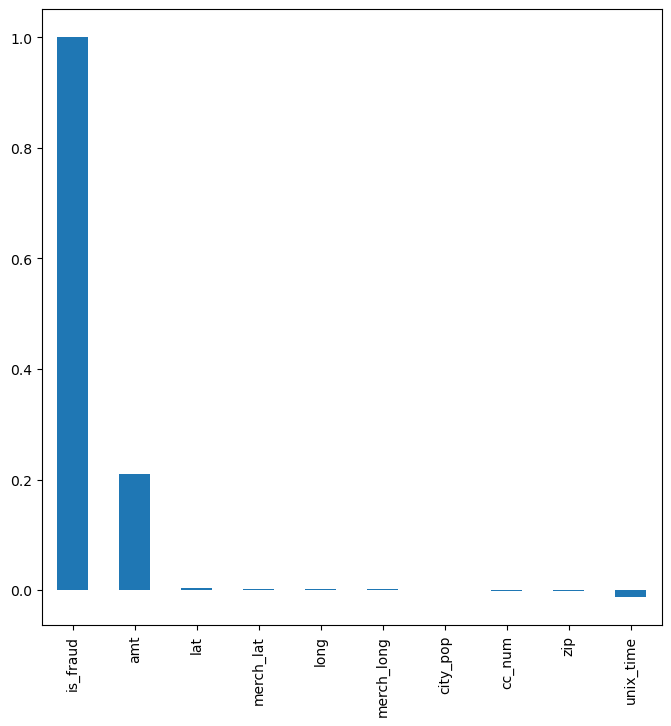

In [122]:
#Lets check correlation of 'is_fraud' with the numerical columns
plt.figure(figsize=(8,8))
df_num.corr()['is_fraud'].sort_values(ascending = False).plot(kind='bar')
plt.show()

Observation:
- amt and unix_time is positively correlated with is_fraud

In [123]:
#Lets Check the coorelation heatmap between the variables
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(numeric_only=True), annot= True)
plt.show()

### 4.1. Univariate Analysis on Numerical Variables

In [124]:
#Info of the dataset
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             float

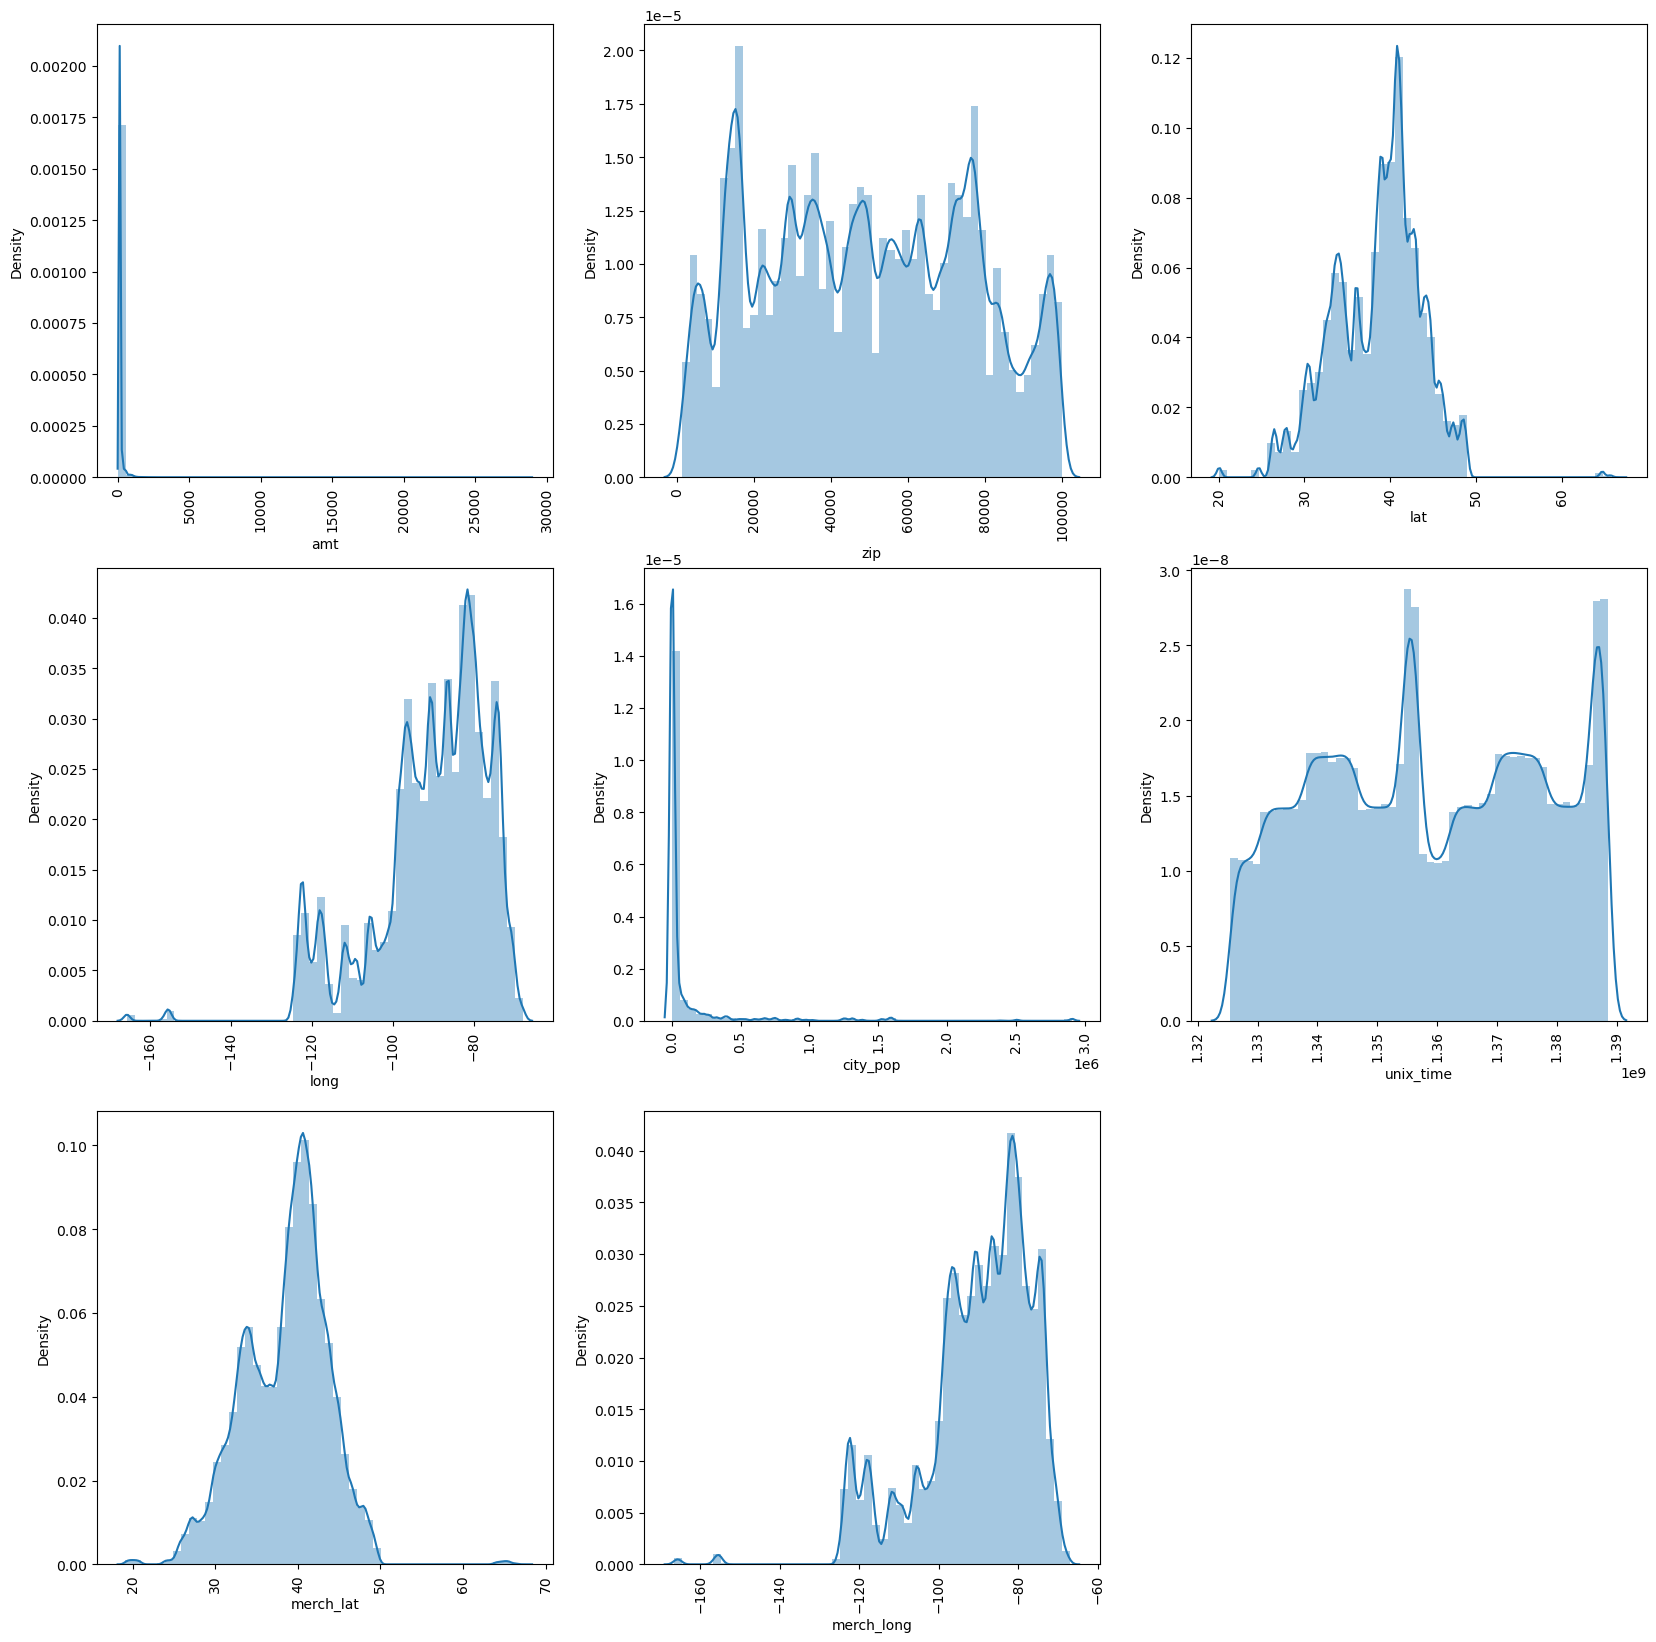

In [125]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.distplot(df_combine['amt'])
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.distplot(df_combine['zip'])
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.distplot(df_combine['lat'])
plt.xticks(rotation = 90)

plt.subplot(3,3,4)
sns.distplot(df_combine['long'])
plt.xticks(rotation = 90)

plt.subplot(3,3,5)
sns.distplot(df_combine['city_pop'])
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
sns.distplot(df_combine['unix_time'])
plt.xticks(rotation = 90)

plt.subplot(3,3,7)
sns.distplot(df_combine['merch_lat'])
plt.xticks(rotation = 90)

plt.subplot(3,3,8)
sns.distplot(df_combine['merch_long'])
plt.xticks(rotation = 90)
plt.show()

Observation:
- The above plot shows the distribution of 'amt, zip', 'lat', 'long', 'city_pop', unix_time', 'merch_lat' and 'merch_long'.
- The 'amt' and 'city_pop' are highly skewed variables.

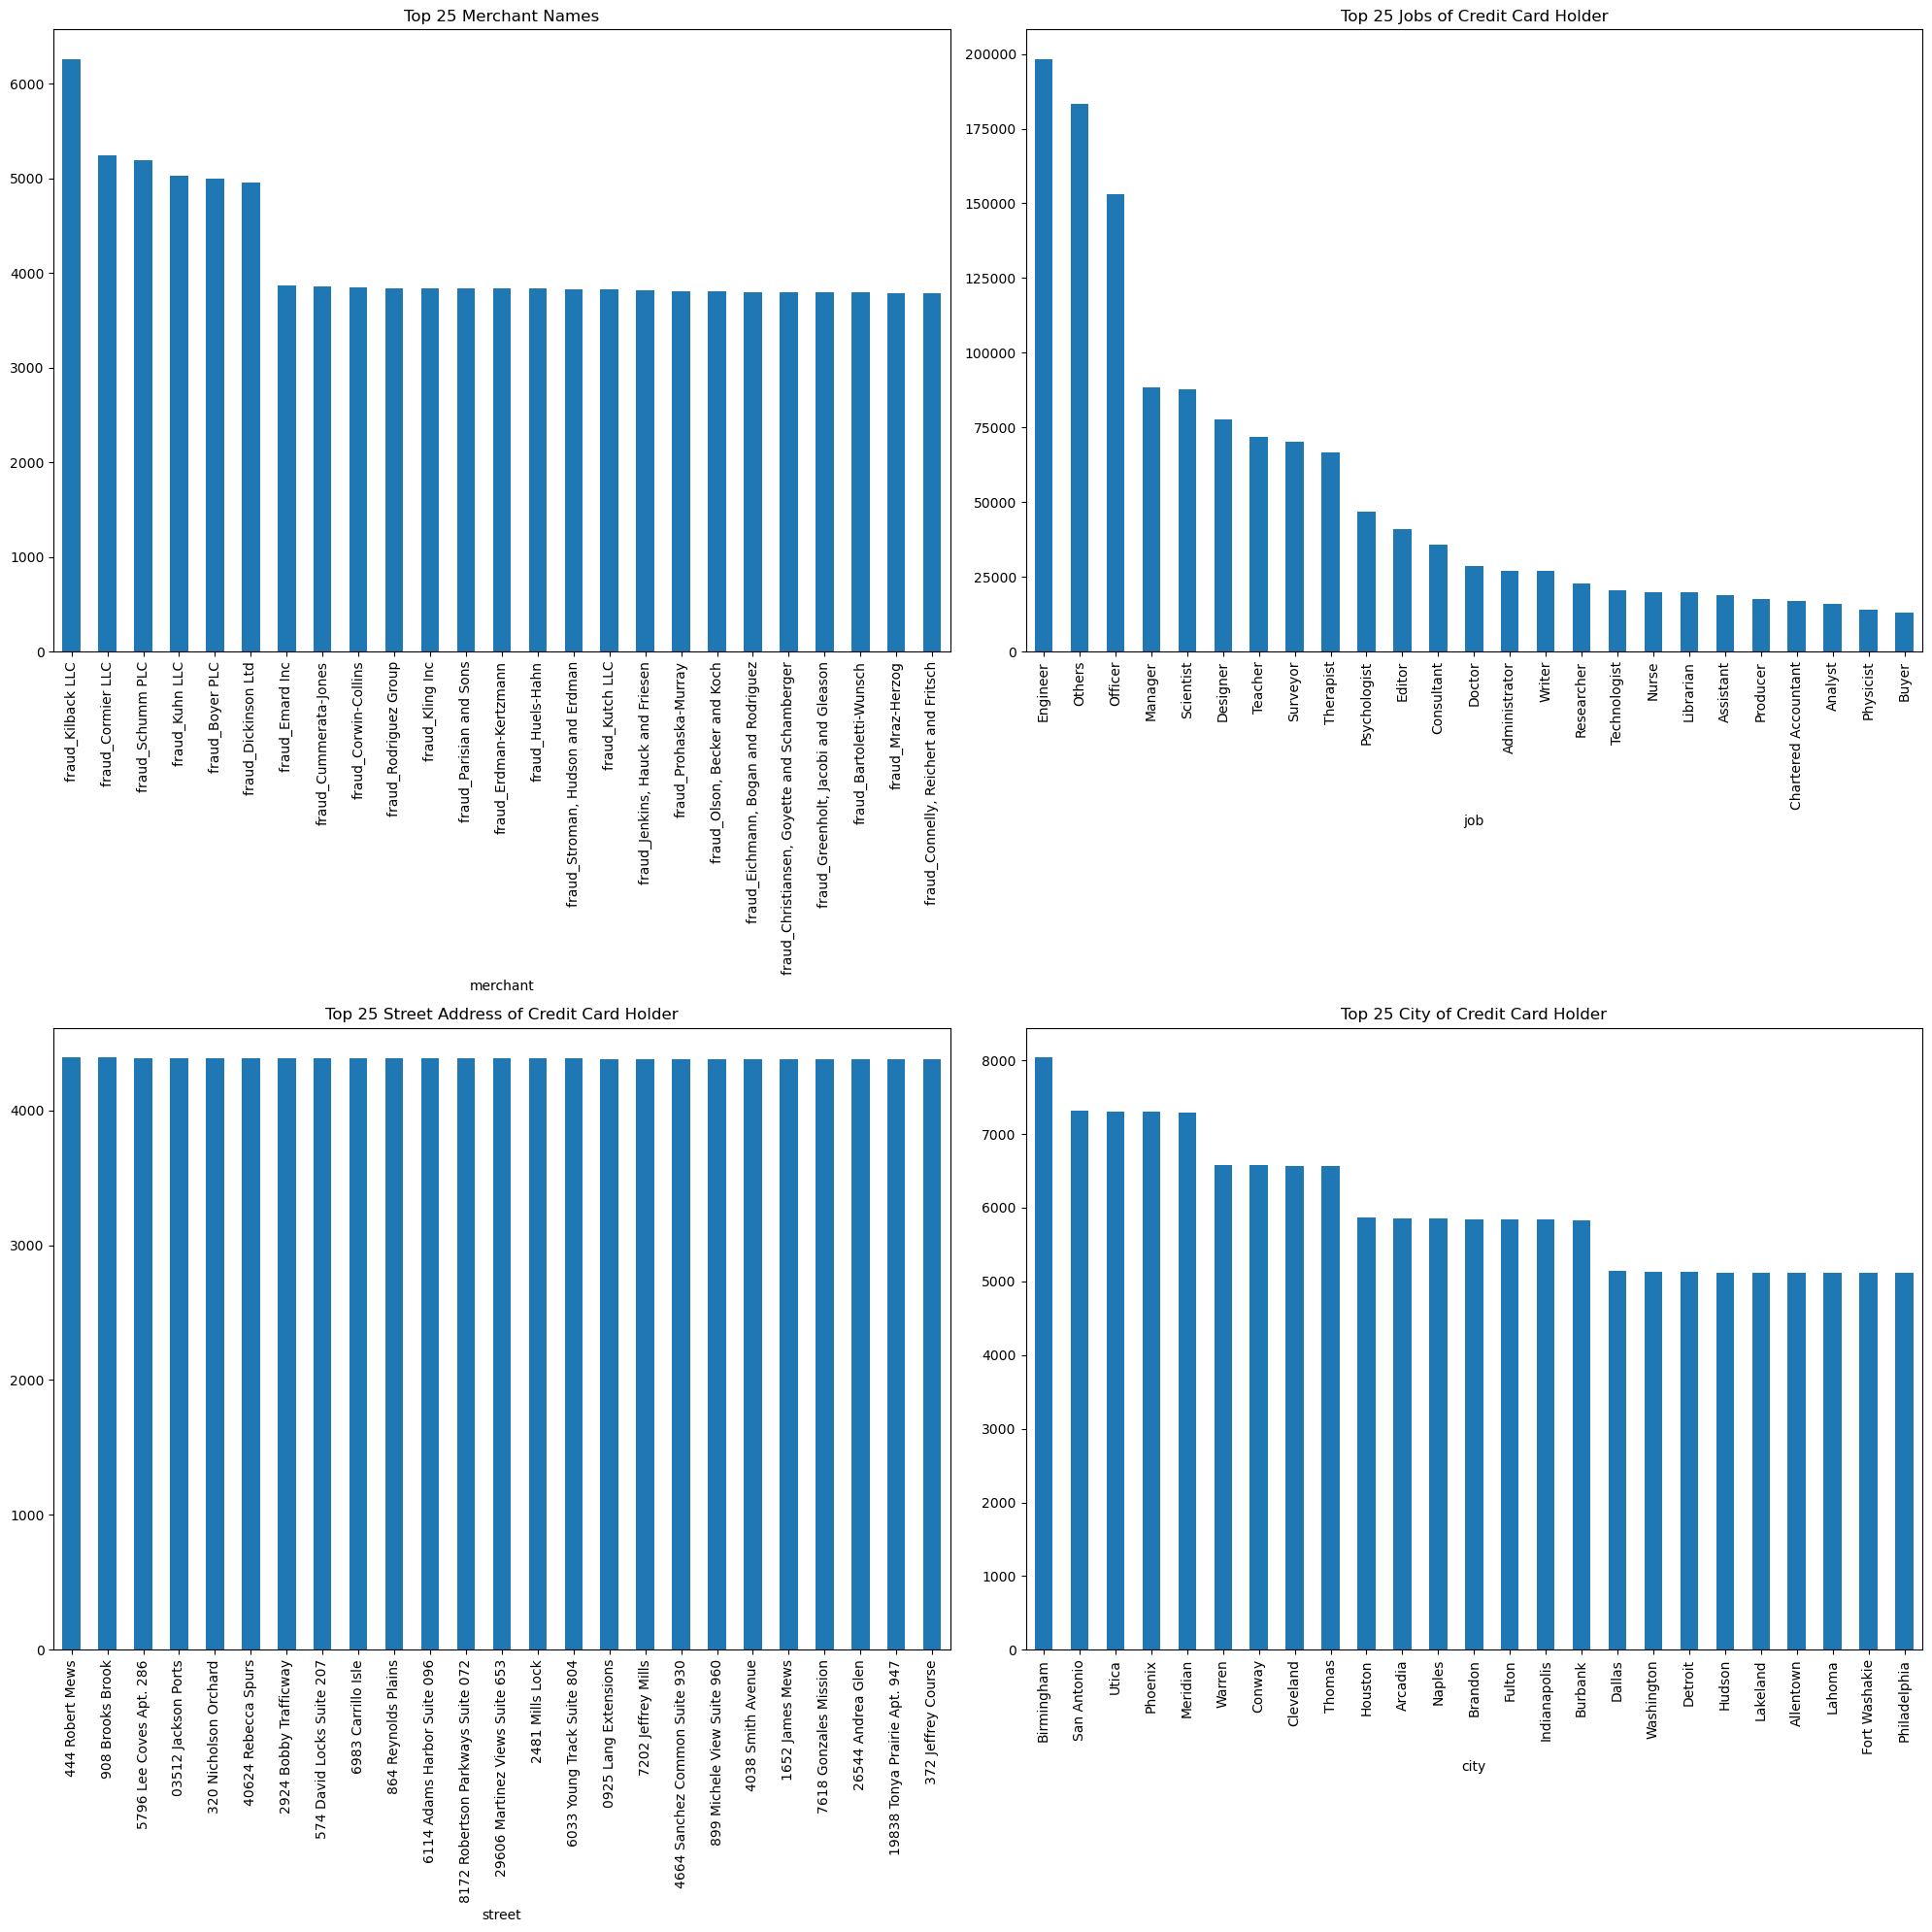

In [126]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
df_combine['merchant'].value_counts().head(25).plot.bar()
plt.xlabel('merchant')
plt.title('Top 25 Merchant Names')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
df_combine['job'].value_counts().head(25).plot.bar()
plt.xlabel('job')
plt.title('Top 25 Jobs of Credit Card Holder')
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(2,2,3)
df_combine['street'].value_counts().head(25).plot.bar()
plt.xlabel('street')
plt.title('Top 25 Street Address of Credit Card Holder')
plt.xticks(rotation = 90)

plt.subplot(2,2,4)
df_combine['city'].value_counts().head(25).plot.bar()
plt.xlabel('city')
plt.title('Top 25 City of Credit Card Holder')
plt.xticks(rotation = 90)
fig.tight_layout()
plt.show()

Observation:
- Above graph shows Top 25 Merchant Names, Jobs of Credit Card Holder, Street Address of Credit Card Holder, City of Credit Card Holder.

### 4.2. Univariate Analysis of Categorical Variables

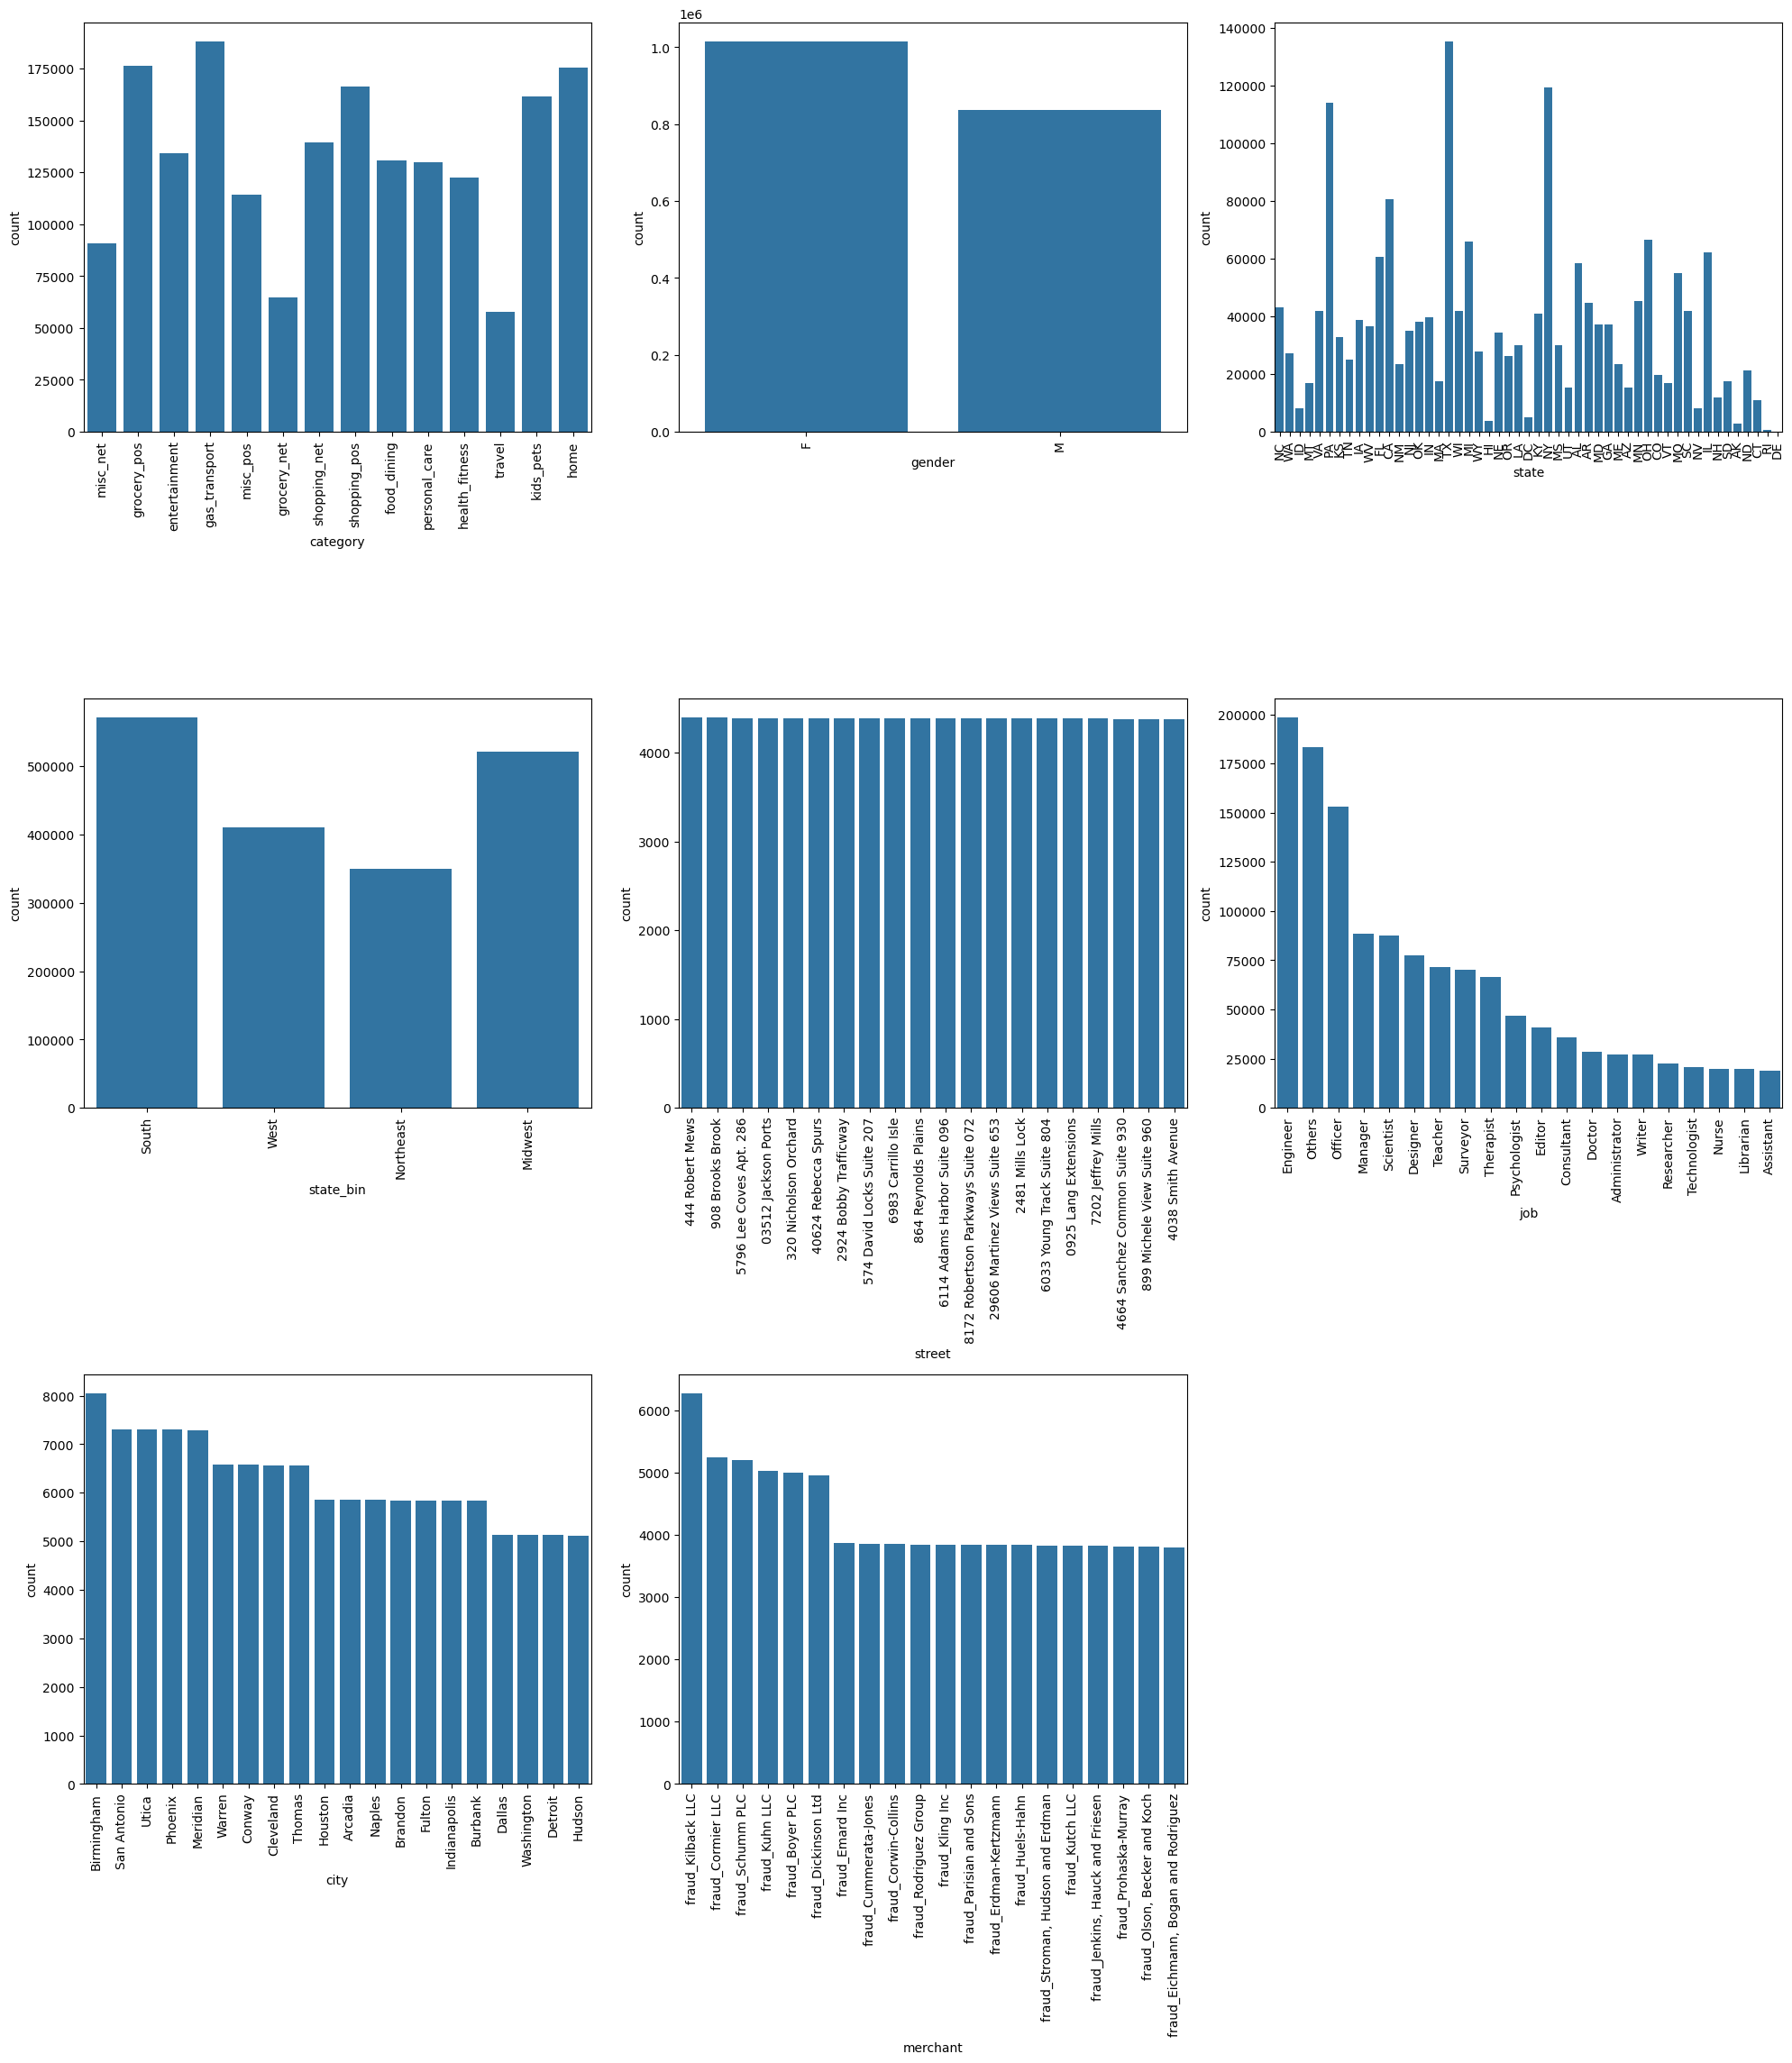

In [127]:
top_streets = df_combine['street'].value_counts().iloc[:20].index
top_jobs = df_combine['job'].value_counts().iloc[:20].index
top_cities = df_combine['city'].value_counts().iloc[:20].index
top_merchants = df_combine['merchant'].value_counts().iloc[:20].index

fig = plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1)
sns.countplot(x="category", data=df_combine)
plt.xticks(rotation=90)

plt.subplot(3, 3, 2)
sns.countplot(x="gender", data=df_combine)
plt.xticks(rotation=90)

plt.subplot(3, 3, 3)
sns.countplot(x="state", data=df_combine)
plt.xticks(rotation=90)

plt.subplot(3, 3, 4)
sns.countplot(x="state_bin", data=df_combine)
plt.xticks(rotation=90)

plt.subplot(3, 3, 5)
sns.countplot(x="street", data=df_combine[df_combine['street'].isin(top_streets)], order=top_streets)
plt.xticks(rotation=90)

plt.subplot(3, 3, 6)
sns.countplot(x="job", data=df_combine[df_combine['job'].isin(top_jobs)], order=top_jobs)
plt.xticks(rotation=90)
fig.tight_layout()

plt.subplot(3, 3, 7)
sns.countplot(x="city", data=df_combine[df_combine['city'].isin(top_cities)], order=top_cities)
plt.xticks(rotation=90)

plt.subplot(3, 3, 8)
sns.countplot(x="merchant", data=df_combine[df_combine['merchant'].isin(top_merchants)], order=top_merchants)
plt.xticks(rotation=90)
plt.show()

Observation:
- The above plot shows the count of transaction based on categorical varibales i.e category, is_fraud,gender, state, state_bin.
- The count of transaction in top 25 of street, job, city, merchant.

### 4.3. Multivariate Analysis on Numerical Variables

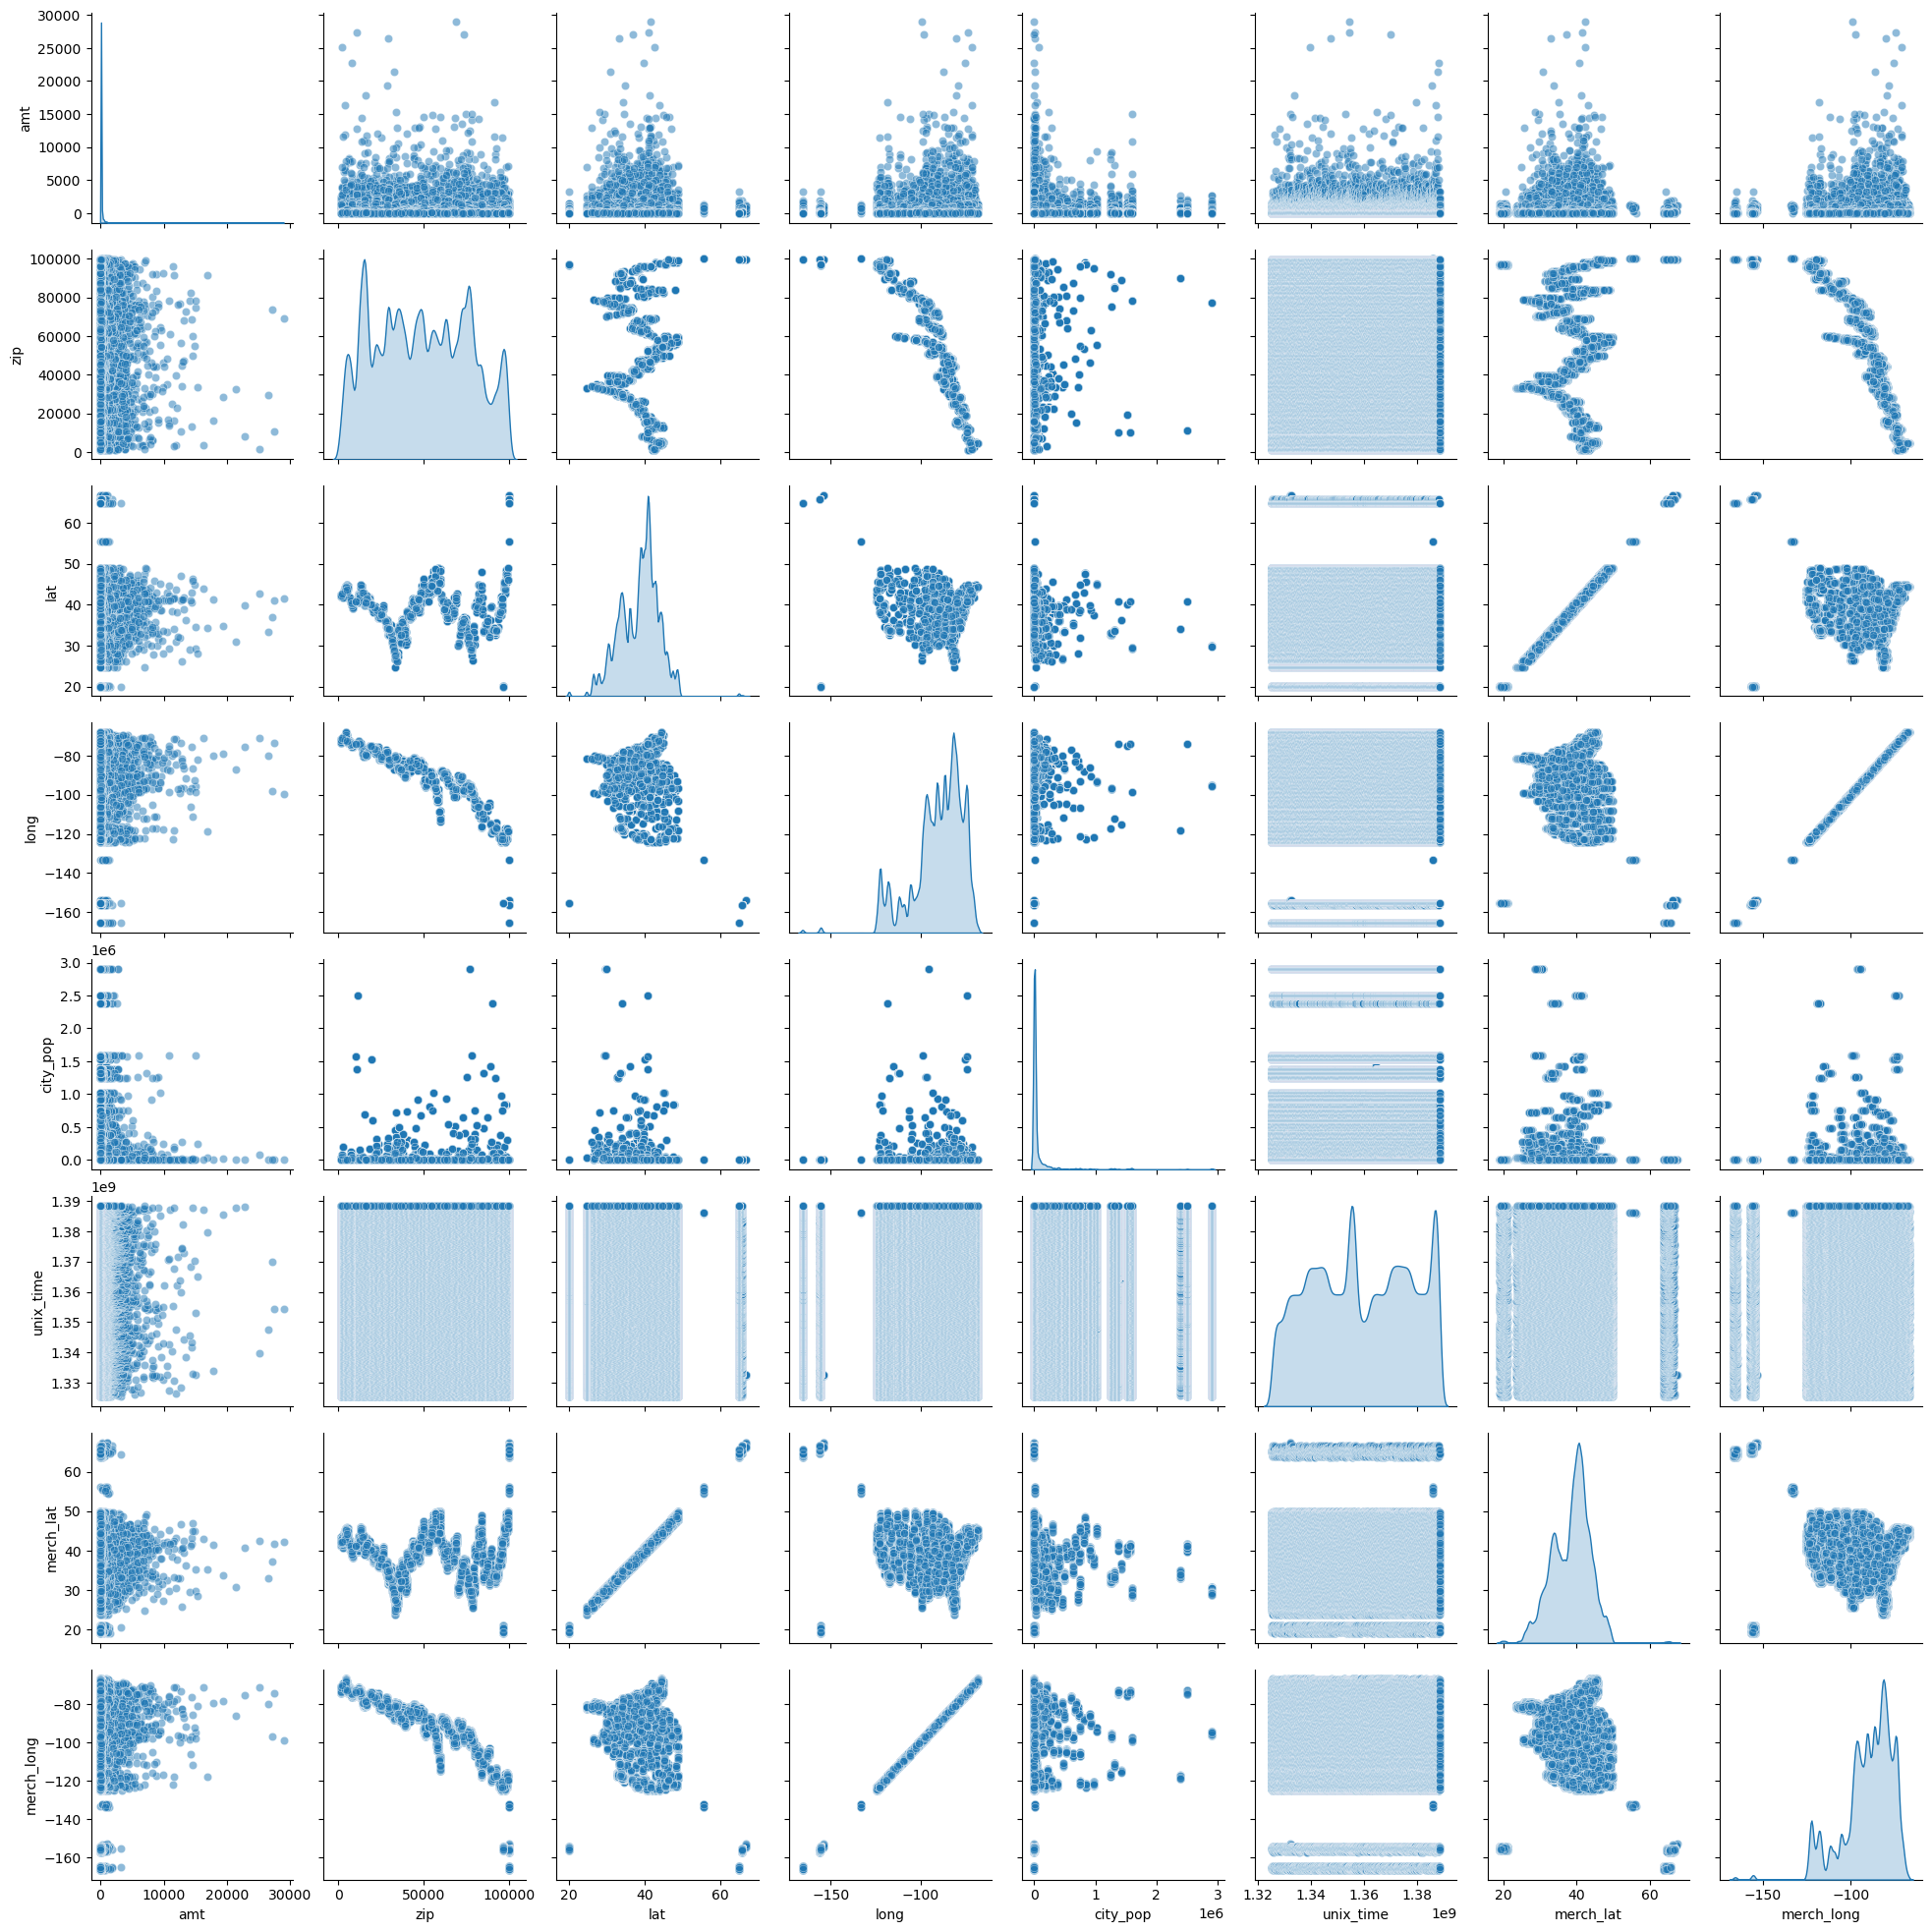

<Figure size 1000x800 with 0 Axes>

In [128]:
#Lets now visualize the pairplot for all the numeric variables
num_var=df_combine[['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']]
sns.pairplot(num_var, diag_kind='kde', markers='o', plot_kws={'alpha':0.5})
plt.figure(figsize=(10, 8))
plt.show()

Observation:
- The above pairplot of numeric variables shows relation between each other.

### 4.4. Multivariate Analysis on Categorical Variables

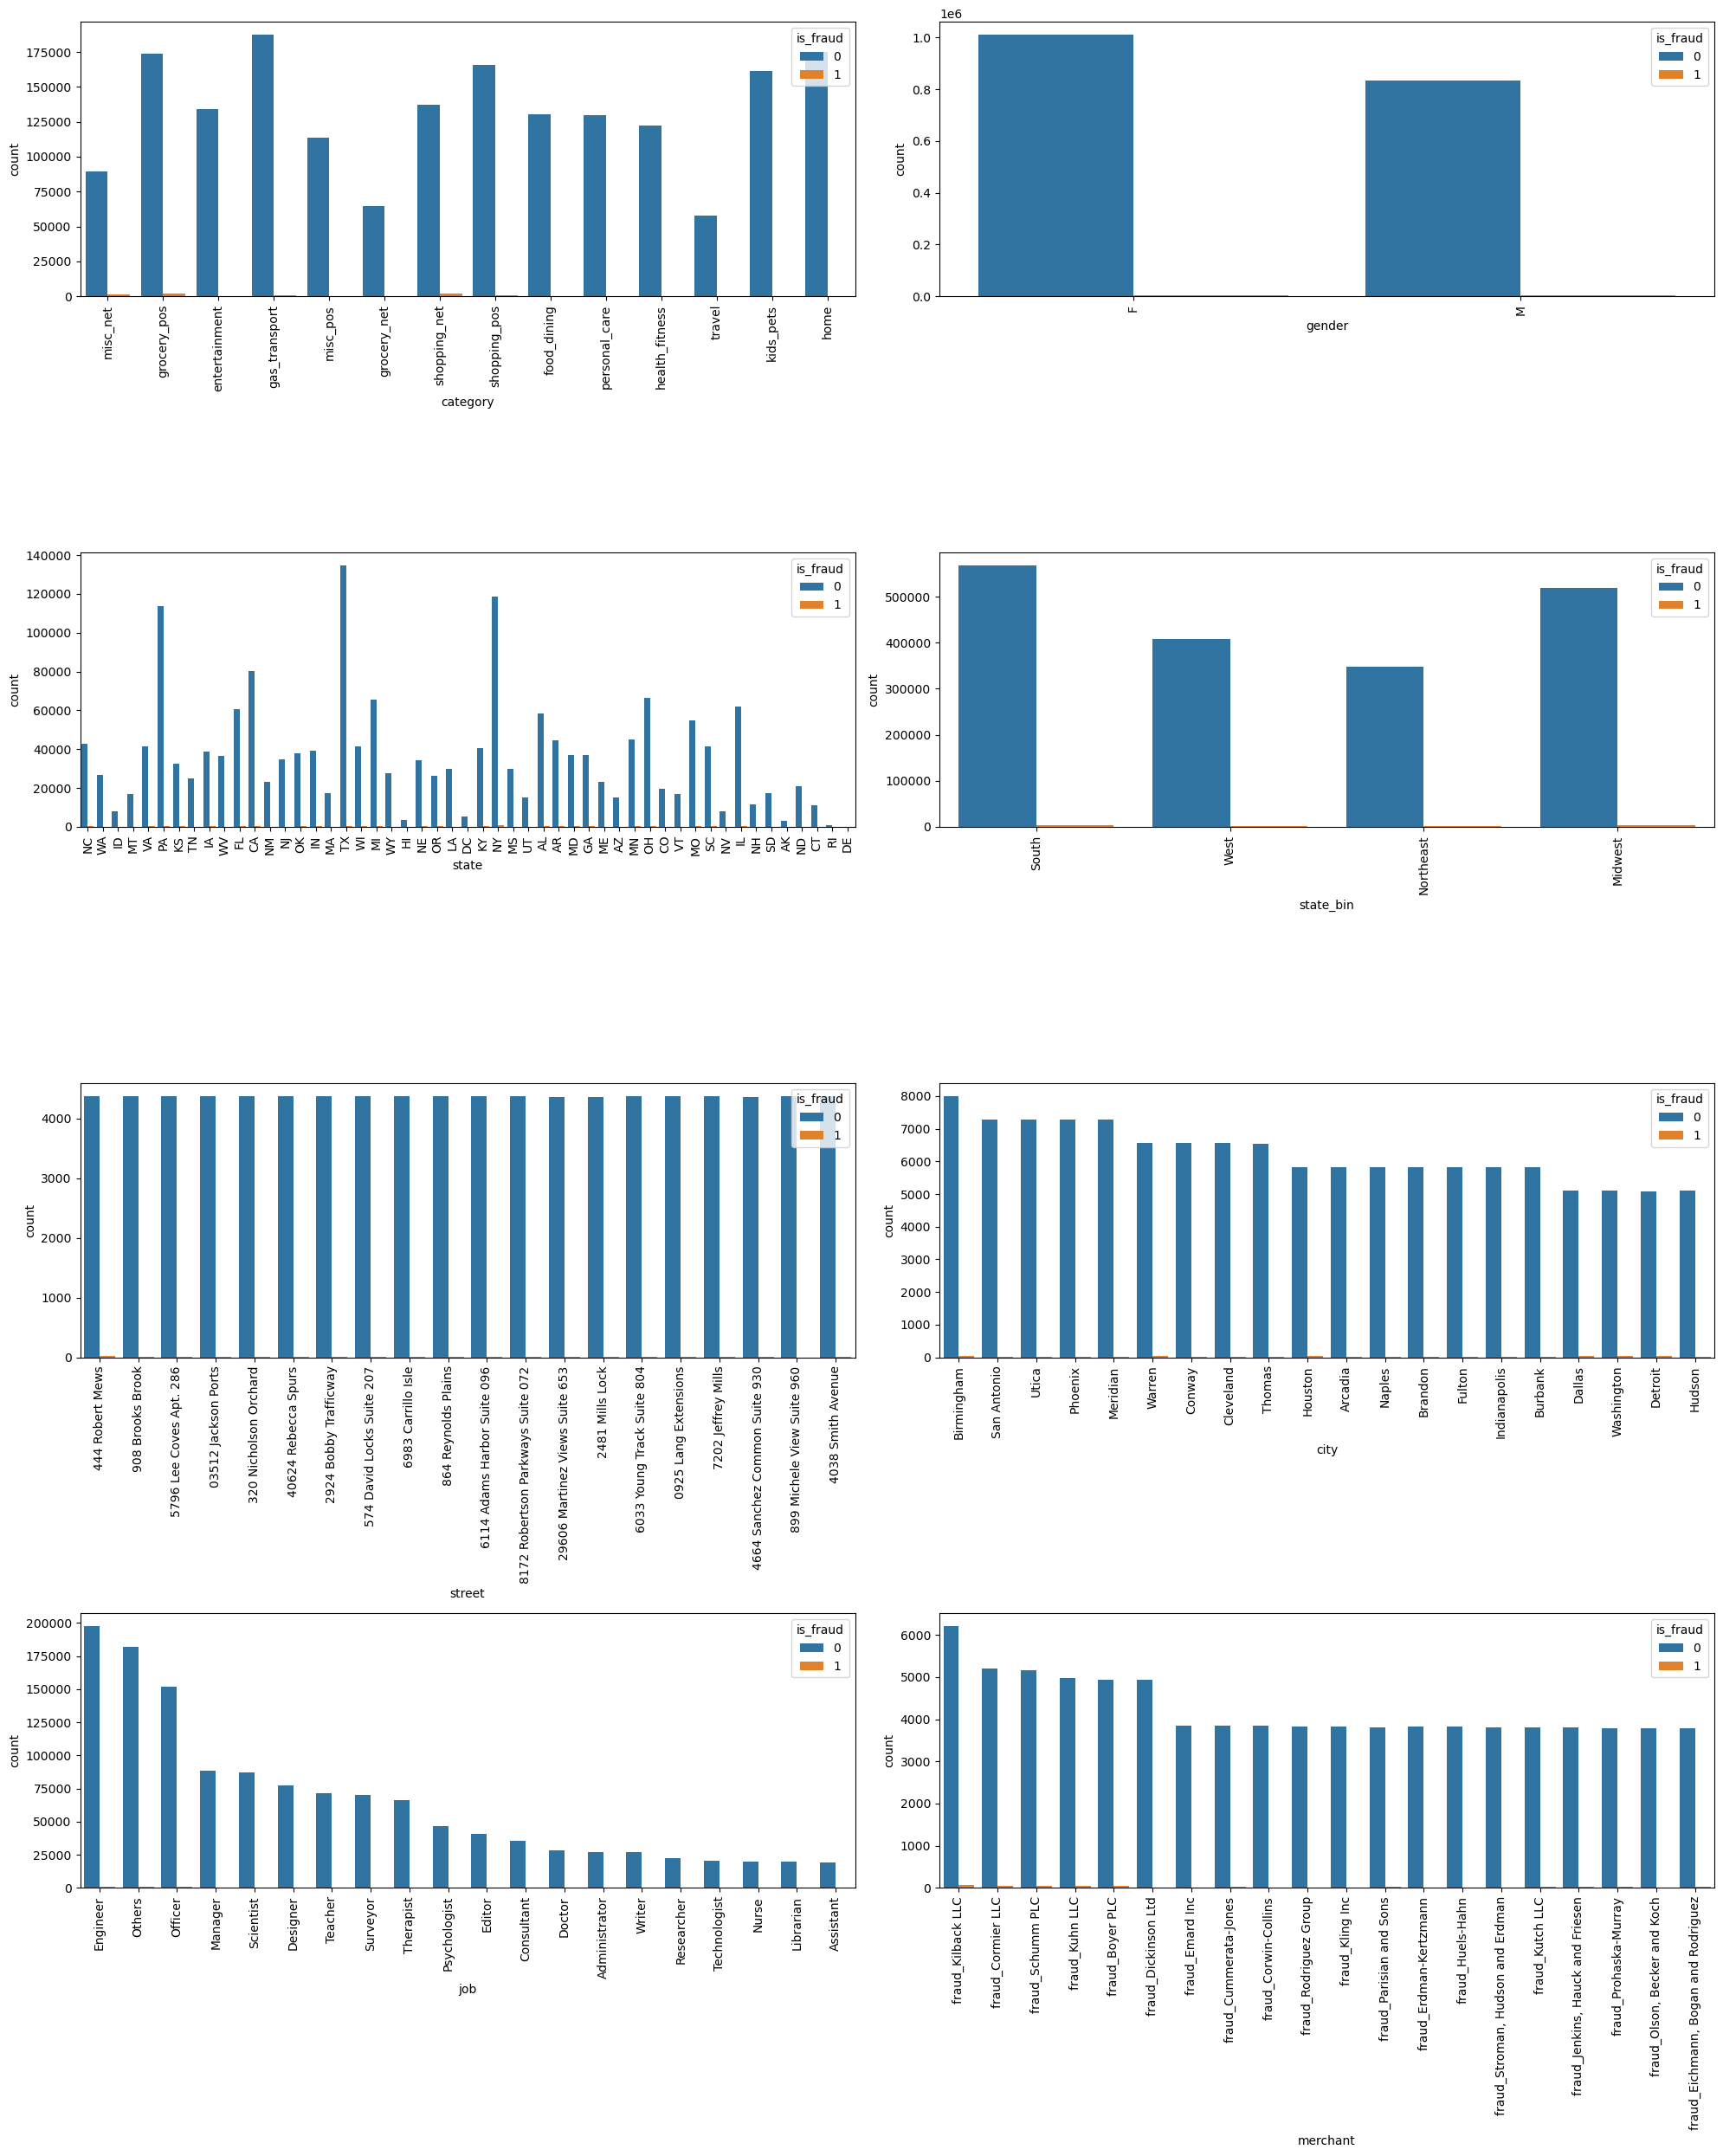

In [129]:
top_streets = df_combine['street'].value_counts().iloc[:20].index
top_jobs = df_combine['job'].value_counts().iloc[:20].index
top_cities = df_combine['city'].value_counts().iloc[:20].index
top_merchants = df_combine['merchant'].value_counts().iloc[:20].index

df_combine['is_fraud'] = df_combine['is_fraud'].astype(str)

fig= plt.figure(figsize=(20, 25))
plt.subplot(4,2,1)
sns.countplot(x = "category", hue = "is_fraud", data = df_combine)
plt.xticks(rotation = 90)

plt.subplot(4,2,2)
sns.countplot(x = "gender", hue = "is_fraud", data = df_combine)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(4,2,3)
sns.countplot(x = "state", hue = "is_fraud", data = df_combine)
plt.xticks(rotation = 90)


plt.subplot(4,2,4)
sns.countplot(x = "state_bin", hue = "is_fraud", data = df_combine)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(4,2,5)
sns.countplot(x = "street", hue = "is_fraud", data = df_combine[df_combine['street'].isin(top_streets)], order=top_streets)
plt.xticks(rotation = 90)

plt.subplot(4,2,6)
sns.countplot(x = "city", hue = "is_fraud", data = df_combine[df_combine['city'].isin(top_cities)], order=top_cities)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(4,2,7)
sns.countplot(x = "job", hue = "is_fraud", data = df_combine[df_combine['job'].isin(top_jobs)], order=top_jobs)
plt.xticks(rotation = 90)

plt.subplot(4,2,8)
sns.countplot(x = "merchant", hue = "is_fraud", data = df_combine[df_combine['merchant'].isin(top_merchants)], order=top_merchants)
plt.xticks(rotation = 90)
fig.tight_layout()
plt.show()

Observation:
- The above plot shows comparison between the target varibale is_fraud and the categorical variables i.e category, gender, state, state_bin, street, city , job and merchant.

### 4.5. Visualzing the Numerical Variables using Boxplot

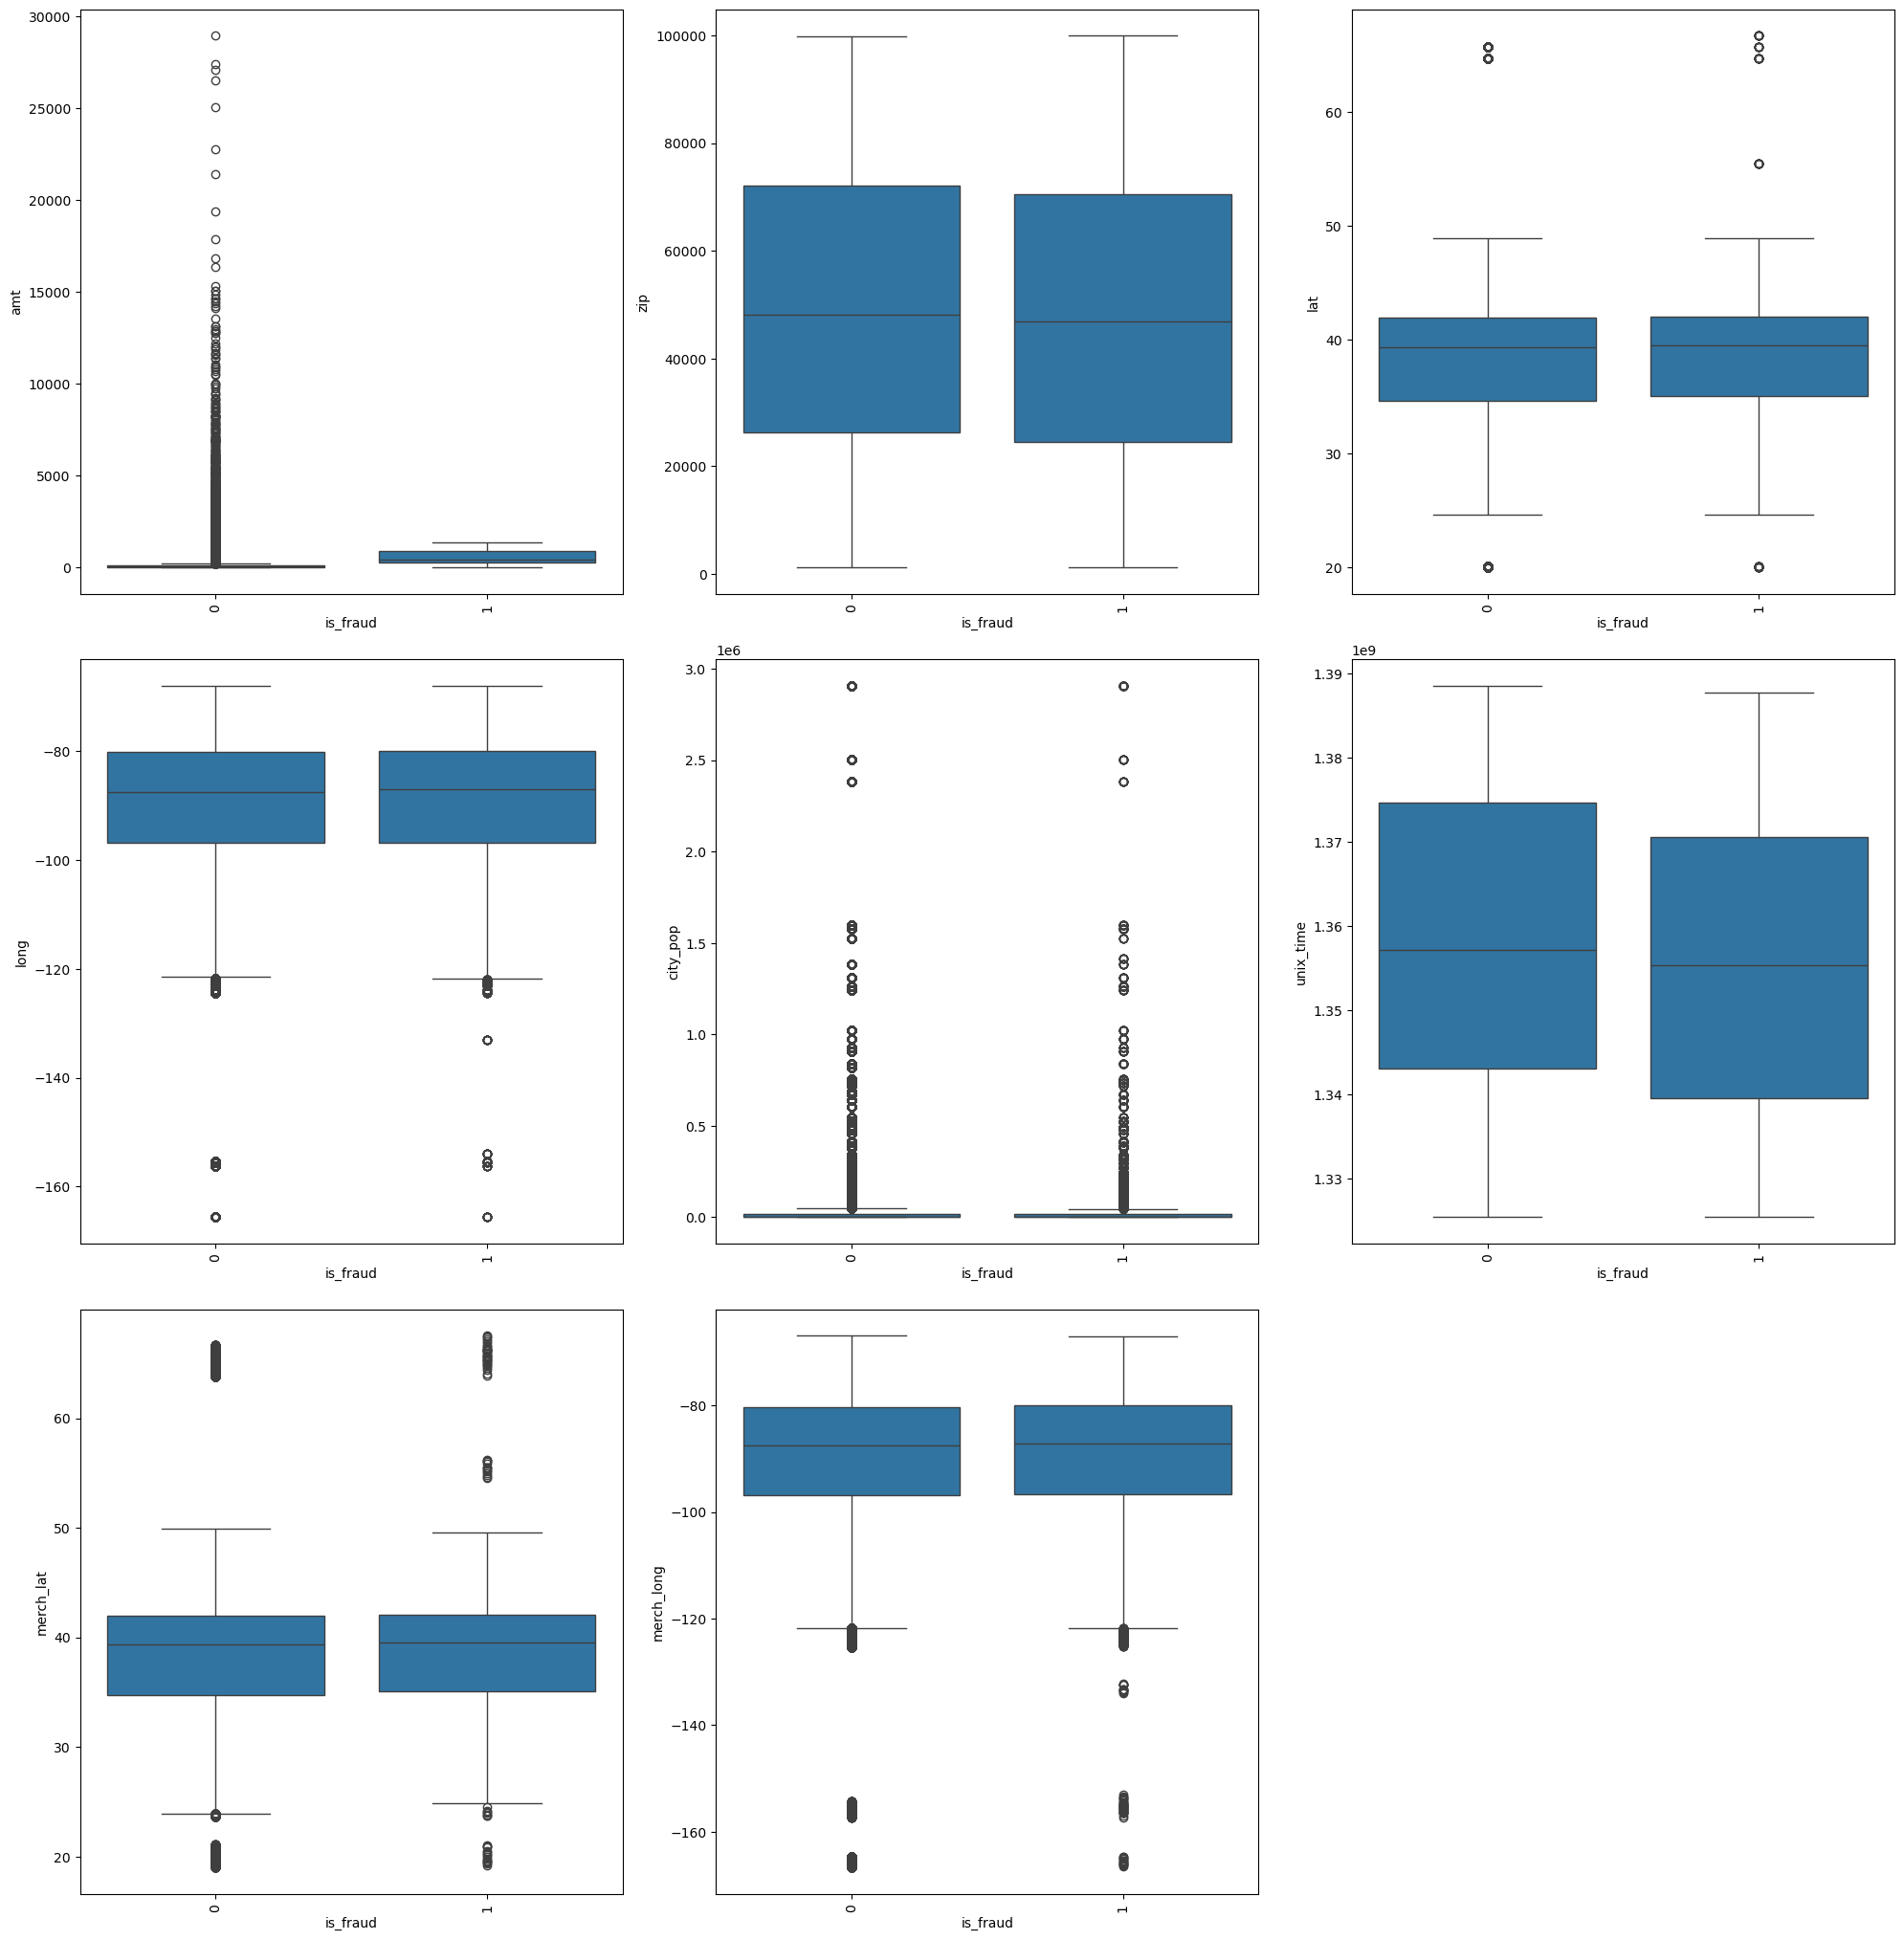

In [130]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y = "amt", x = "is_fraud", data = df_combine)
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.boxplot(y = "zip", x = "is_fraud", data = df_combine)
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.boxplot(y = "lat", x = "is_fraud", data = df_combine)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,4)
sns.boxplot(y = "long", x = "is_fraud", data = df_combine)
plt.xticks(rotation = 90)

plt.subplot(3,3,5)
sns.boxplot(y = "city_pop", x = "is_fraud", data = df_combine)
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
sns.boxplot(y = "unix_time", x = "is_fraud", data = df_combine)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,7)
sns.boxplot(y = "merch_lat", x = "is_fraud", data = df_combine)
plt.xticks(rotation = 90)

plt.subplot(3,3,8)
sns.boxplot(y = "merch_long", x = "is_fraud", data = df_combine)
plt.xticks(rotation = 90)
plt.show()

Observation:
- The above plot shows the boxplots between the target varibale is_fraud and the numerical variables i.e amt, zip, lat, long, city_pop, unix_time, merchat_lat and merchant_long

## Step 5: Data Preparation

### 5.1. Feature Engineering
This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Using our business understanding to derive features which we think could be important indicators of frauds.

We can derive the following features-
1. `age` on transaction day from "dob" variable and binning of age variable
2. `trans_Year`, `trans_year_month`, `trans_Month`, `trans_Hour`, `trans_Day`, `trans_weekday` of transaction from trans_date_trans_time variable
3. `dis` i.e distance between credit card lat, long to merchant lat and long
4. Historical variables such as `moving_average`, `amt_by_moving_average`
5. `prev_merch_lat`, `prev_merch_long` i.e Previous longitude/latitude of merchant and `time_since_prev_transaction` i.e time since previous transaction in hours
6. distance_between_merchants by calculating distance between current and previous purchase location

#### 5.1.1. Deriving age on transaction day from "dob" variable and binning of age variable

In [131]:
df_combine["age"] = df_combine["dob"].apply(lambda x : (datetime.datetime.now().year - x.year))

In [132]:
df_combine.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip      lat      long  city_pop           job        dob  \
0    NC  28654  36.0788  -81.1781      3495  Psychologist 1988-03-09   
1    WA  99160  48.8878 -118.2105       149       Teacher 1978-06-21   
2    ID  83252  42.1808 -112.2620      4154       Officer 1962-01-19   
3    MT  59632  46.2306 -112.1138      1939        Others 1967-01-12   
4    VA  24433  38.4207  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud trans_Date trans_Time state_bin  age  
0        0 2019-01-01   00:00:18     South   36  
1        0 2019-01-01   00:00:44      West   46  
2        0 2019-01-01   00:00:51      West   62  
3        0 2019-01-01   00:01:16      West   57  
4        0 2019-01-01   00:03:06     South   38

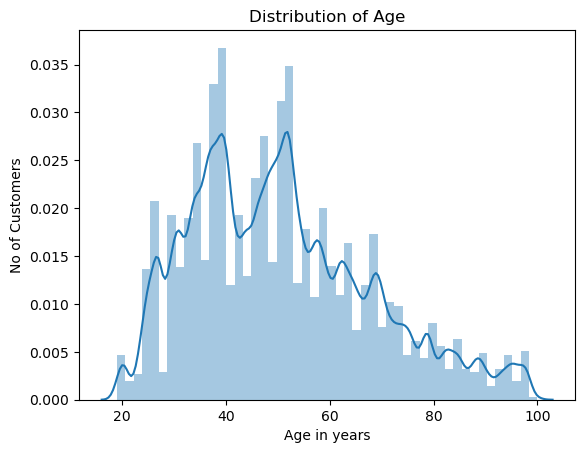

In [133]:
ax = sns.distplot(df_combine['age'])
ax.set_ylabel('No of Customers')
ax.set_xlabel('Age in years')
ax.set_title('Distribution of Age')
plt.show()

Observation:
- Above graph shows the age of the credit card holders and majority of it falls under the age of 30 to 50 years.

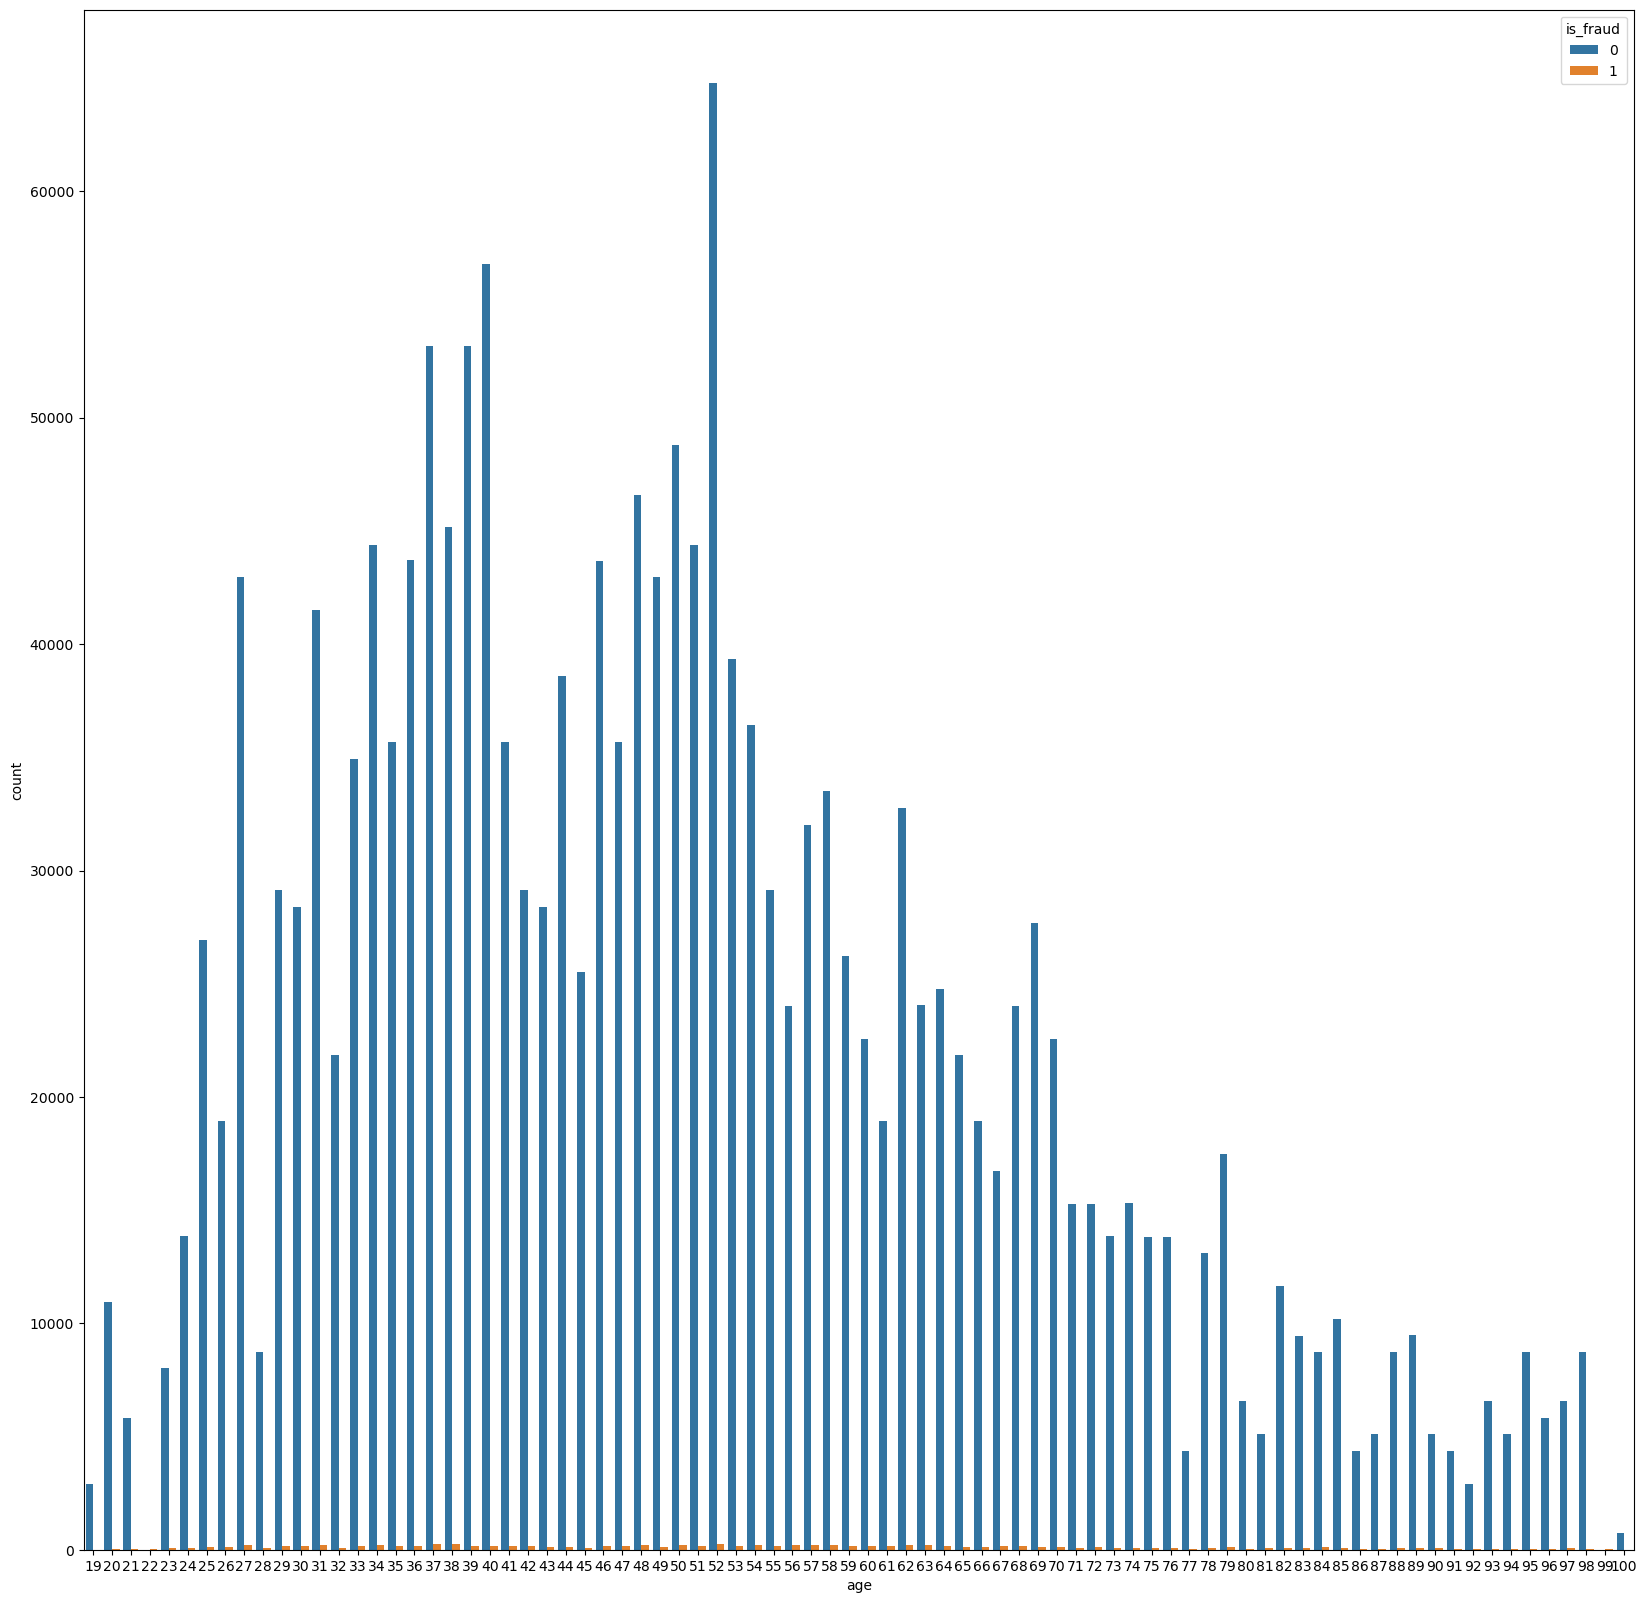

In [134]:
plt.figure(figsize=(20,20))
sns.countplot(x = 'age', hue = 'is_fraud',data =df_combine)
plt.show()

#### Binning of age variable for better insights

In [135]:
bin_manual = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labs = ['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100']
df_combine['age_bin'] = pd.cut(df_combine.age, bins=bin_manual, labels=labs)

In [136]:
df_combine[['age_bin','age']].head()

age_bin  age
0   30-40   36
1   40-50   46
2   60-70   62
3   50-60   57
4   30-40   38

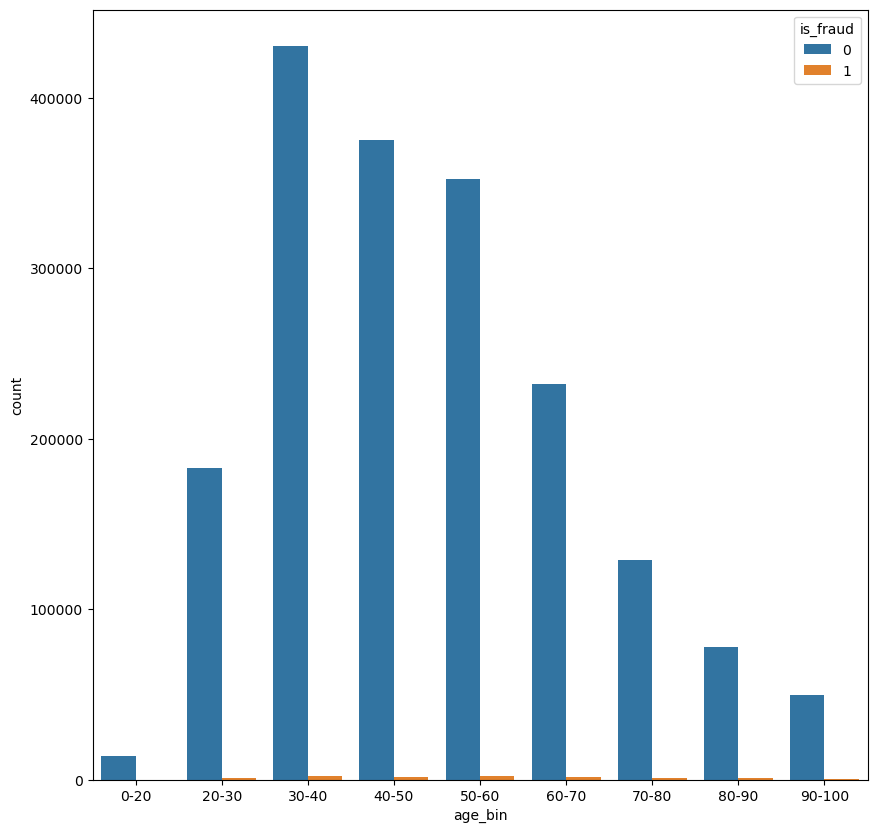

In [137]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'age_bin', hue = 'is_fraud',data =df_combine)
plt.show()

Observation:
- Above graph shows that majority of the credit card holders belongs to the age of 30 to 60 years.
- The age of the credit card holders where fraudulent transactions took place mostly belongs to the age of 20 to 70 years.

#### 5.1.2. Deriving trans_Year, trans_year_month, trans_Month, trans_Hour, trans_Day, trans_weekday of transaction from trans_date_trans_time variable

In [138]:
df_combine['trans_Year']=df_combine.trans_Date.dt.year
df_combine['trans_year_month'] = df_combine.trans_Date.dt.to_period('M')
df_combine['trans_Month']=df_combine.trans_Date.dt.month
df_combine['trans_Hour']=df_combine.trans_date_trans_time.dt.hour
df_combine['trans_Day']=df_combine.trans_Date.dt.day
df_combine['trans_weekday'] = df_combine.trans_Date.dt.day_name()

df_combine.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip      lat      long  city_pop           job        dob  \
0    NC  28654  36.0788  -81.1781      3495  Psychologist 1988-03-09   
1    WA  99160  48.8878 -118.2105       149       Teacher 1978-06-21   
2    ID  83252  42.1808 -112.2620      4154       Officer 1962-01-19   
3    MT  59632  46.2306 -112.1138      1939        Others 1967-01-12   
4    VA  24433  38.4207  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud trans_Date trans_Time state_bin  age age_bin  trans_Year  \
0        0 2019-01-01   00:00:18     South   36   30-40        2019   
1        0 2019-01-01   00:00:44      West   46   40-50        2019   
2        0 2019-01-01   00:00:51      West   62   60-70        2019   
3        0 2019-01-01   00:01:16      West   57   50-60        2019   
4        0 2019-01-01   00:03:06     South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday  
0          2019-01            1           0          1       Tuesday  
1          2019-01            1           0          1       Tuesday  
2          2019-01            1           0          1       Tuesday  
3          2019-01            1           0          1       Tuesday  
4          2019-01            1           0          1       Tuesday

#### 5.1.3. Deriving dis i.e. distance between credit card lat, long to merchant lat and long

In [139]:
# Function to calculate the distance
def haversine_distance(lat, long, merch_lat, merch_long):

    # The math module contains a function named
    # radians which converts from degrees to radians.
    long = np.radians(long)
    merch_long = np.radians(merch_long)
    lat = np.radians(lat)
    merch_lat = np.radians(merch_lat)

    # Haversine formula
    dlon = merch_long - long
    dlat = merch_lat - lat
    a = np.sin(dlat / 2)**2 + np.cos(lat) * np.cos(merch_lat) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    #c = 2 * np.arctan2(a**0.5, (1-a)**0.5)

    # Radius of earth in kilometers.
    r = 6371
    d=  c * r
    # calculate the result
    return round(d,2)

In [140]:
df_combine['dist']=df_combine[['lat', 'long', 'merch_lat', 'merch_long']].apply(lambda x:haversine_distance(x[0], x[1], x[2], x[3]), axis=1)

In [141]:
df_combine.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip      lat      long  city_pop           job        dob  \
0    NC  28654  36.0788  -81.1781      3495  Psychologist 1988-03-09   
1    WA  99160  48.8878 -118.2105       149       Teacher 1978-06-21   
2    ID  83252  42.1808 -112.2620      4154       Officer 1962-01-19   
3    MT  59632  46.2306 -112.1138      1939        Others 1967-01-12   
4    VA  24433  38.4207  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud trans_Date trans_Time state_bin  age age_bin  trans_Year  \
0        0 2019-01-01   00:00:18     South   36   30-40        2019   
1        0 2019-01-01   00:00:44      West   46   40-50        2019   
2        0 2019-01-01   00:00:51      West   62   60-70        2019   
3        0 2019-01-01   00:01:16      West   57   50-60        2019   
4        0 2019-01-01   00:03:06     South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  
0          2019-01            1           0          1       Tuesday   78.60  
1          2019-01            1           0          1       Tuesday   30.21  
2          2019-01            1           0          1       Tuesday  108.21  
3          2019-01            1           0          1       Tuesday   95.67  
4          2019-01            1           0          1       Tuesday   77.56

#### 5.1.4. Deriving prev_merch_lat, prev_merch_long i.e Previous longitude/latitude of merchant and time_since_prev_transaction i.e time since previous transaction in hours

In [142]:
#Creating variable
grp_by_cc=df_combine.groupby(['cc_num'])

# Get previous longitude/latitude and time elapsed of a transaction
df_combine['prev_merch_lat']=grp_by_cc['merch_lat'].transform(lambda x:x.shift(1)).fillna(df_combine['merch_lat'])
df_combine['prev_merch_long']=grp_by_cc['merch_long'].transform(lambda x:x.shift(1)).fillna(df_combine['merch_long'])

# Time since previous transaction in hours
df_combine['time_since_prev_transaction'] = grp_by_cc['trans_Hour'].transform(lambda x:round((x-x.shift(1)),1)).fillna(0)

In [143]:
df_combine.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip      lat      long  city_pop           job        dob  \
0    NC  28654  36.0788  -81.1781      3495  Psychologist 1988-03-09   
1    WA  99160  48.8878 -118.2105       149       Teacher 1978-06-21   
2    ID  83252  42.1808 -112.2620      4154       Officer 1962-01-19   
3    MT  59632  46.2306 -112.1138      1939        Others 1967-01-12   
4    VA  24433  38.4207  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud trans_Date trans_Time state_bin  age age_bin  trans_Year  \
0        0 2019-01-01   00:00:18     South   36   30-40        2019   
1        0 2019-01-01   00:00:44      West   46   40-50        2019   
2        0 2019-01-01   00:00:51      West   62   60-70        2019   
3        0 2019-01-01   00:01:16      West   57   50-60        2019   
4        0 2019-01-01   00:03:06     South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  
0       36.011293       -82.048315                          0.0  
1       49.159047      -118.186462                          0.0  
2       43.150704      -112.154481                          0.0  
3       47.034331      -112.561071                          0.0  
4       38.674999       -78.632459                          0.0

#### 5.1.5. Deriving distance_between_merchants by calculating distance between current and previous purchase location

In [144]:
df_combine['distance_between_merchants']=df_combine.apply(lambda x:haversine_distance(x.prev_merch_lat,x.prev_merch_long,x.merch_lat,x.merch_long), axis=1)

In [145]:
df_combine.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip      lat      long  city_pop           job        dob  \
0    NC  28654  36.0788  -81.1781      3495  Psychologist 1988-03-09   
1    WA  99160  48.8878 -118.2105       149       Teacher 1978-06-21   
2    ID  83252  42.1808 -112.2620      4154       Officer 1962-01-19   
3    MT  59632  46.2306 -112.1138      1939        Others 1967-01-12   
4    VA  24433  38.4207  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud trans_Date trans_Time state_bin  age age_bin  trans_Year  \
0        0 2019-01-01   00:00:18     South   36   30-40        2019   
1        0 2019-01-01   00:00:44      West   46   40-50        2019   
2        0 2019-01-01   00:00:51      West   62   60-70        2019   
3        0 2019-01-01   00:01:16      West   57   50-60        2019   
4        0 2019-01-01   00:03:06     South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0       36.011293       -82.048315                          0.0   
1       49.159047      -118.186462                          0.0   
2       43.150704      -112.154481                          0.0   
3       47.034331      -112.561071                          0.0   
4       38.674999       -78.632459                          0.0   

   distance_between_merchants  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0

#### 5.1.6 Deriving Historical variables such as 24 Hours Orders by Customers, 30 Day Transactions by Customers, 30 Day Orders Amt Avg by Customers, 24 Hours Orders Amt Avg by Customers

In [146]:
df2 = df_combine.copy()

In [147]:
df2.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip      lat      long  city_pop           job        dob  \
0    NC  28654  36.0788  -81.1781      3495  Psychologist 1988-03-09   
1    WA  99160  48.8878 -118.2105       149       Teacher 1978-06-21   
2    ID  83252  42.1808 -112.2620      4154       Officer 1962-01-19   
3    MT  59632  46.2306 -112.1138      1939        Others 1967-01-12   
4    VA  24433  38.4207  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud trans_Date trans_Time state_bin  age age_bin  trans_Year  \
0        0 2019-01-01   00:00:18     South   36   30-40        2019   
1        0 2019-01-01   00:00:44      West   46   40-50        2019   
2        0 2019-01-01   00:00:51      West   62   60-70        2019   
3        0 2019-01-01   00:01:16      West   57   50-60        2019   
4        0 2019-01-01   00:03:06     South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0       36.011293       -82.048315                          0.0   
1       49.159047      -118.186462                          0.0   
2       43.150704      -112.154481                          0.0   
3       47.034331      -112.561071                          0.0   
4       38.674999       -78.632459                          0.0   

   distance_between_merchants  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0

In [148]:
df2.index = pd.to_datetime(df2['trans_date_trans_time'])
df2 = df2.rename_axis(index={'trans_date_trans_time': 'time_index'})
df2 = df2.sort_index()
df2.head()

trans_date_trans_time            cc_num  \
time_index                                                    
2019-01-01 00:00:18   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06   2019-01-01 00:03:06   375534208663984   

                                               merchant       category  \
time_index                                                               
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

                        amt gender                        street  \
time_index                                                         
2019-01-01 00:00:18    4.97      F                561 Perry Cove   
2019-01-01 00:00:44  107.23      F  43039 Riley Greens Suite 393   
2019-01-01 00:00:51  220.11      M      594 White Dale Suite 530   
2019-01-01 00:01:16   45.00      M   9443 Cynthia Court Apt. 038   
2019-01-01 00:03:06   41.96      M              408 Bradley Rest   

                               city state    zip      lat      long  city_pop  \
time_index                                                                      
2019-01-01 00:00:18  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
2019-01-01 00:00:44          Orient    WA  99160  48.8878 -118.2105       149   
2019-01-01 00:00:51      Malad City    ID  83252  42.1808 -112.2620      4154   
2019-01-01 00:01:16         Boulder    MT  59632  46.2306 -112.1138      1939   
2019-01-01 00:03:06        Doe Hill    VA  24433  38.4207  -79.4629        99   

                              job        dob  \
time_index                                     
2019-01-01 00:00:18  Psychologist 1988-03-09   
2019-01-01 00:00:44       Teacher 1978-06-21   
2019-01-01 00:00:51       Officer 1962-01-19   
2019-01-01 00:01:16        Others 1967-01-12   
2019-01-01 00:03:06     Therapist 1986-03-28   

                                            trans_num   unix_time  merch_lat  \
time_index                                                                     
2019-01-01 00:00:18  0b242abb623afc578575680df30655b9  1325376018  36.011293   
2019-01-01 00:00:44  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2019-01-01 00:00:51  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
2019-01-01 00:01:16  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
2019-01-01 00:03:06  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   

                     merch_long is_fraud trans_Date trans_Time state_bin  age  \
time_index                                                                      
2019-01-01 00:00:18  -82.048315        0 2019-01-01   00:00:18     South   36   
2019-01-01 00:00:44 -118.186462        0 2019-01-01   00:00:44      West   46   
2019-01-01 00:00:51 -112.154481        0 2019-01-01   00:00:51      West   62   
2019-01-01 00:01:16 -112.561071        0 2019-01-01   00:01:16      West   57   
2019-01-01 00:03:06  -78.632459        0 2019-01-01   00:03:06     South   38   

                    age_bin  trans_Year trans_year_month  trans_Month  \
time_index                                                              
2019-01-01 00:00:18   30-40        2019          2019-01            1   
2019-01-01 00:00:44   40-50        2019          2019-01            1   
2019-01-01 00:00:51   60-70        2019          2019-01            1   
2019-01-01 00:01:16   50-60        2019          2019-01            1   
2019-01-01 00:03:06   30-40        2019          2019-01            1   

                     trans_Hour  tra

Orders in last 2 Months

In [149]:
df2['val_for_agg'] = 1

**30 Day Transactions by Customers**

In [150]:
df_hist_trans_30d = \
    df2 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('30D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_30d']

In [151]:
df_hist_trans_30d = df_hist_trans_30d.groupby(['cc_num','trans_date_trans_time'])['hist_trans_30d'].min().reset_index()

In [152]:
df_hist_trans_30d

cc_num trans_date_trans_time  hist_trans_30d
0                60416207185   2019-01-01 12:47:15             0.0
1                60416207185   2019-01-02 08:44:57             1.0
2                60416207185   2019-01-02 08:47:36             2.0
3                60416207185   2019-01-02 12:38:14             3.0
4                60416207185   2019-01-02 13:10:46             4.0
...                      ...                   ...             ...
1852345  4992346398065154184   2020-12-31 02:10:10           184.0
1852346  4992346398065154184   2020-12-31 05:13:35           185.0
1852347  4992346398065154184   2020-12-31 11:15:44           185.0
1852348  4992346398065154184   2020-12-31 11:17:25           182.0
1852349  4992346398065154184   2020-12-31 13:24:36           183.0

[1852350 rows x 3 columns]

In [153]:
df_hist_trans_30d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   cc_num                 int64         
 1   trans_date_trans_time  datetime64[ns]
 2   hist_trans_30d         float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


**24 Hours Orders by Customers**

In [154]:
df_hist_orders_24h = \
    df2 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [155]:
df_hist_orders_24h = df_hist_orders_24h.groupby(['cc_num','trans_date_trans_time'])['hist_trans_24h'].min().reset_index()

In [156]:
df_hist_orders_24h

cc_num trans_date_trans_time  hist_trans_24h
0                60416207185   2019-01-01 12:47:15             0.0
1                60416207185   2019-01-02 08:44:57             1.0
2                60416207185   2019-01-02 08:47:36             2.0
3                60416207185   2019-01-02 12:38:14             3.0
4                60416207185   2019-01-02 13:10:46             4.0
...                      ...                   ...             ...
1852345  4992346398065154184   2020-12-31 02:10:10             7.0
1852346  4992346398065154184   2020-12-31 05:13:35             7.0
1852347  4992346398065154184   2020-12-31 11:15:44             7.0
1852348  4992346398065154184   2020-12-31 11:17:25             8.0
1852349  4992346398065154184   2020-12-31 13:24:36             9.0

[1852350 rows x 3 columns]

In [157]:
df_hist_orders_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   cc_num                 int64         
 1   trans_date_trans_time  datetime64[ns]
 2   hist_trans_24h         float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


**30 Day Orders Amt Avg by Customers**

In [158]:
df_hist_trans_amt_avg_30d = \
    df2 \
    .groupby(['cc_num'])['amt']\
    .rolling('30D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_30d']

In [159]:
df_hist_trans_amt_avg_30d = df_hist_trans_amt_avg_30d.groupby(['cc_num','trans_date_trans_time'])\
['hist_trans_avg_amt_30d'].min().reset_index()

In [160]:
df_hist_trans_amt_avg_30d

cc_num trans_date_trans_time  hist_trans_avg_amt_30d
0                60416207185   2019-01-01 12:47:15                0.000000
1                60416207185   2019-01-02 08:44:57                7.270000
2                60416207185   2019-01-02 08:47:36               30.105000
3                60416207185   2019-01-02 12:38:14               47.430000
4                60416207185   2019-01-02 13:10:46               44.270000
...                      ...                   ...                     ...
1852345  4992346398065154184   2020-12-31 02:10:10               73.768533
1852346  4992346398065154184   2020-12-31 05:13:35               73.727135
1852347  4992346398065154184   2020-12-31 11:15:44               73.734757
1852348  4992346398065154184   2020-12-31 11:17:25               73.884890
1852349  4992346398065154184   2020-12-31 13:24:36               74.297978

[1852350 rows x 3 columns]

In [161]:
df_hist_trans_amt_avg_30d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   cc_num                  int64         
 1   trans_date_trans_time   datetime64[ns]
 2   hist_trans_avg_amt_30d  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


**24 Hours Orders Amt Avg by Customers**

In [162]:
df_hist_trans_amt_avg_24h = \
    df2 \
    .groupby(['cc_num'])['amt']\
    .rolling('24H')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_24h']

In [163]:
df_hist_trans_amt_avg_24h = df_hist_trans_amt_avg_24h.groupby(['cc_num','trans_date_trans_time'])\
['hist_trans_avg_amt_24h'].min().reset_index()

In [164]:
df_hist_trans_amt_avg_24h

cc_num trans_date_trans_time  hist_trans_avg_amt_24h
0                60416207185   2019-01-01 12:47:15                0.000000
1                60416207185   2019-01-02 08:44:57                7.270000
2                60416207185   2019-01-02 08:47:36               30.105000
3                60416207185   2019-01-02 12:38:14               47.430000
4                60416207185   2019-01-02 13:10:46               44.270000
...                      ...                   ...                     ...
1852345  4992346398065154184   2020-12-31 02:10:10               95.651429
1852346  4992346398065154184   2020-12-31 05:13:35               91.812857
1852347  4992346398065154184   2020-12-31 11:15:44               84.262857
1852348  4992346398065154184   2020-12-31 11:17:25               85.725000
1852349  4992346398065154184   2020-12-31 13:24:36               92.808889

[1852350 rows x 3 columns]

In [165]:
df_hist_trans_amt_avg_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   cc_num                  int64         
 1   trans_date_trans_time   datetime64[ns]
 2   hist_trans_avg_amt_24h  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


In [166]:
df_combine=pd.merge(df_combine, df_hist_trans_30d, on=['cc_num', 'trans_date_trans_time'], how= 'left')
df_combine.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip      lat      long  city_pop           job        dob  \
0    NC  28654  36.0788  -81.1781      3495  Psychologist 1988-03-09   
1    WA  99160  48.8878 -118.2105       149       Teacher 1978-06-21   
2    ID  83252  42.1808 -112.2620      4154       Officer 1962-01-19   
3    MT  59632  46.2306 -112.1138      1939        Others 1967-01-12   
4    VA  24433  38.4207  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud trans_Date trans_Time state_bin  age age_bin  trans_Year  \
0        0 2019-01-01   00:00:18     South   36   30-40        2019   
1        0 2019-01-01   00:00:44      West   46   40-50        2019   
2        0 2019-01-01   00:00:51      West   62   60-70        2019   
3        0 2019-01-01   00:01:16      West   57   50-60        2019   
4        0 2019-01-01   00:03:06     South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0       36.011293       -82.048315                          0.0   
1       49.159047      -118.186462                          0.0   
2       43.150704      -112.154481                          0.0   
3       47.034331      -112.561071                          0.0   
4       38.674999       -78.632459                          0.0   

   distance_between_merchants  hist_trans_30d  
0                         0.0           109.0  
1                         0.0            53.0  
2                         0.0             8.0  
3                         0.0           181.0  
4                         0.0           218.0

In [167]:
df_combine.shape

(1852394, 37)

In [168]:
df_hist_trans_30d[df_hist_trans_30d['cc_num']==38859492057661]

cc_num trans_date_trans_time  hist_trans_30d
443618  38859492057661   2019-01-01 00:00:51             8.0
443619  38859492057661   2019-01-04 05:32:14             1.0
443620  38859492057661   2019-01-04 17:32:51             2.0
443621  38859492057661   2019-01-05 03:25:17             3.0
443622  38859492057661   2019-01-05 05:05:19             4.0
...                ...                   ...             ...
444348  38859492057661   2020-12-28 21:34:43            47.0
444349  38859492057661   2020-12-29 06:50:33            48.0
444350  38859492057661   2020-12-29 17:22:06            49.0
444351  38859492057661   2020-12-31 10:11:14            50.0
444352  38859492057661   2020-12-31 12:04:41            46.0

[735 rows x 3 columns]

In [169]:
df_combine[df_combine['cc_num']==38859492057661]

trans_date_trans_time          cc_num  \
2         2019-01-01 00:00:51  38859492057661   
5013      2019-01-04 05:32:14  38859492057661   
5733      2019-01-04 17:32:51  38859492057661   
6389      2019-01-05 03:25:17  38859492057661   
6474      2019-01-05 05:05:19  38859492057661   
...                       ...             ...   
1839040   2020-12-28 21:34:43  38859492057661   
1841195   2020-12-29 06:50:33  38859492057661   
1843933   2020-12-29 17:22:06  38859492057661   
1850115   2020-12-31 10:11:14  38859492057661   
1850333   2020-12-31 12:04:41  38859492057661   

                                  merchant        category     amt gender  \
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
5013     fraud_Schaefer, McGlynn and Bosco   gas_transport   64.26      M   
5733                     fraud_Dare-Gibson  health_fitness   10.16      M   
6389                      fraud_Harris Inc   gas_transport   81.85      M   
6474                    fraud_Donnelly LLC   entertainment  188.25      M   
...                                    ...             ...     ...    ...   
1839040             fraud_Bogisich-Weimann       kids_pets   71.63      M   
1841195                  fraud_Bradtke PLC     grocery_pos  101.61      M   
1843933                  fraud_Berge-Hills       kids_pets  188.06      M   
1850115               fraud_Stiedemann Ltd     food_dining   18.40      M   
1850333                     fraud_Will Ltd     food_dining   31.56      M   

                           street        city state    zip      lat     long  \
2        594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
5013     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
5733     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
6389     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
6474     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
...                           ...         ...   ...    ...      ...      ...   
1839040  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1841195  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1843933  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1850115  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1850333  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   

         city_pop      job        dob                         trans_num  \
2            4154  Officer 1962-01-19  a1a22d70485983eac12b5b88dad1cf95   
5013         4154  Officer 1962-01-19  71154d9c2ce5e86e65e5eb465f381cb3   
5733         4154  Officer 1962-01-19  086770542ad5c49307f802d8d9eb60cc   
6389         4154  Officer 1962-01-19  cb14caf80ae07df31ae6b78cc78de938   
6474         4154  Officer 1962-01-19  e105591ea033a5ce5ce23d5132daaf9e   
...           ...      ...        ...                               ...   
1839040      4154  Officer 1962-01-19  c0b1cb1ec9534ecac9a7de06f1d8e25d   
1841195      4154  Officer 1962-01-19  326447d537c32c39dee3b8cd8bf58b6b   
1843933      4154  Officer 1962-01-19  3506a31d3204de0fb5db873abf69bcf8   
1850115      4154  Officer 1962-01-19  f30eb9e9f60b1529c73839faed5458b6   
1850333      4154  Officer 1962-01-19  7a9b07e04d3ad6873ccbf3a8fade63c6   

          unix_time  merch_lat  merch_long is_fraud trans_Date trans_Time  \
2        1325376051  43.150704 -112.154481        0 2019-01-01   00:00:51   
5013     1325655134  41.785311 -113.050652        0 2019-01-04   05:32:14   
5733     1325698371  41.932075 -111.459315        0 2019-01-04   17:32:51   
6389     1325733917  43.129486 -112.325972        0 2019-01-05   03:25:17   
6474     1325739919  41.592779 -112.253563        0 2019-01-05   05:05:19   
...             ...        ...         ...      ...        ...        ...   
1839040  1388266483  42.419812 -112.678783        0 2020-12-28   21:34:43   
1841195  1388299

In [170]:
df_combine.shape

(1852394, 37)

In [171]:
df_hist_orders_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   cc_num                 int64         
 1   trans_date_trans_time  datetime64[ns]
 2   hist_trans_24h         float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


In [172]:
df_combine=pd.merge(df_combine, df_hist_orders_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
df_combine.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip      lat      long  city_pop           job        dob  \
0    NC  28654  36.0788  -81.1781      3495  Psychologist 1988-03-09   
1    WA  99160  48.8878 -118.2105       149       Teacher 1978-06-21   
2    ID  83252  42.1808 -112.2620      4154       Officer 1962-01-19   
3    MT  59632  46.2306 -112.1138      1939        Others 1967-01-12   
4    VA  24433  38.4207  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud trans_Date trans_Time state_bin  age age_bin  trans_Year  \
0        0 2019-01-01   00:00:18     South   36   30-40        2019   
1        0 2019-01-01   00:00:44      West   46   40-50        2019   
2        0 2019-01-01   00:00:51      West   62   60-70        2019   
3        0 2019-01-01   00:01:16      West   57   50-60        2019   
4        0 2019-01-01   00:03:06     South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0       36.011293       -82.048315                          0.0   
1       49.159047      -118.186462                          0.0   
2       43.150704      -112.154481                          0.0   
3       47.034331      -112.561071                          0.0   
4       38.674999       -78.632459                          0.0   

   distance_between_merchants  hist_trans_30d  hist_trans_24h  
0                         0.0           109.0             6.0  
1                         0.0            53.0             1.0  
2                         0.0             8.0             5.0  
3                         0.0           181.0             5.0  
4                         0.0           218.0             6.0

In [173]:
df_combine.shape

(1852394, 38)

In [174]:
df_hist_orders_24h[df_hist_orders_24h['cc_num']==38859492057661]

cc_num trans_date_trans_time  hist_trans_24h
443618  38859492057661   2019-01-01 00:00:51             5.0
443619  38859492057661   2019-01-04 05:32:14             1.0
443620  38859492057661   2019-01-04 17:32:51             1.0
443621  38859492057661   2019-01-05 03:25:17             2.0
443622  38859492057661   2019-01-05 05:05:19             3.0
...                ...                   ...             ...
444348  38859492057661   2020-12-28 21:34:43             3.0
444349  38859492057661   2020-12-29 06:50:33             1.0
444350  38859492057661   2020-12-29 17:22:06             2.0
444351  38859492057661   2020-12-31 10:11:14             3.0
444352  38859492057661   2020-12-31 12:04:41             1.0

[735 rows x 3 columns]

In [175]:
df_combine[df_combine['cc_num']==38859492057661]

trans_date_trans_time          cc_num  \
2         2019-01-01 00:00:51  38859492057661   
5013      2019-01-04 05:32:14  38859492057661   
5733      2019-01-04 17:32:51  38859492057661   
6389      2019-01-05 03:25:17  38859492057661   
6474      2019-01-05 05:05:19  38859492057661   
...                       ...             ...   
1839040   2020-12-28 21:34:43  38859492057661   
1841195   2020-12-29 06:50:33  38859492057661   
1843933   2020-12-29 17:22:06  38859492057661   
1850115   2020-12-31 10:11:14  38859492057661   
1850333   2020-12-31 12:04:41  38859492057661   

                                  merchant        category     amt gender  \
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
5013     fraud_Schaefer, McGlynn and Bosco   gas_transport   64.26      M   
5733                     fraud_Dare-Gibson  health_fitness   10.16      M   
6389                      fraud_Harris Inc   gas_transport   81.85      M   
6474                    fraud_Donnelly LLC   entertainment  188.25      M   
...                                    ...             ...     ...    ...   
1839040             fraud_Bogisich-Weimann       kids_pets   71.63      M   
1841195                  fraud_Bradtke PLC     grocery_pos  101.61      M   
1843933                  fraud_Berge-Hills       kids_pets  188.06      M   
1850115               fraud_Stiedemann Ltd     food_dining   18.40      M   
1850333                     fraud_Will Ltd     food_dining   31.56      M   

                           street        city state    zip      lat     long  \
2        594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
5013     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
5733     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
6389     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
6474     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
...                           ...         ...   ...    ...      ...      ...   
1839040  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1841195  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1843933  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1850115  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1850333  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   

         city_pop      job        dob                         trans_num  \
2            4154  Officer 1962-01-19  a1a22d70485983eac12b5b88dad1cf95   
5013         4154  Officer 1962-01-19  71154d9c2ce5e86e65e5eb465f381cb3   
5733         4154  Officer 1962-01-19  086770542ad5c49307f802d8d9eb60cc   
6389         4154  Officer 1962-01-19  cb14caf80ae07df31ae6b78cc78de938   
6474         4154  Officer 1962-01-19  e105591ea033a5ce5ce23d5132daaf9e   
...           ...      ...        ...                               ...   
1839040      4154  Officer 1962-01-19  c0b1cb1ec9534ecac9a7de06f1d8e25d   
1841195      4154  Officer 1962-01-19  326447d537c32c39dee3b8cd8bf58b6b   
1843933      4154  Officer 1962-01-19  3506a31d3204de0fb5db873abf69bcf8   
1850115      4154  Officer 1962-01-19  f30eb9e9f60b1529c73839faed5458b6   
1850333      4154  Officer 1962-01-19  7a9b07e04d3ad6873ccbf3a8fade63c6   

          unix_time  merch_lat  merch_long is_fraud trans_Date trans_Time  \
2        1325376051  43.150704 -112.154481        0 2019-01-01   00:00:51   
5013     1325655134  41.785311 -113.050652        0 2019-01-04   05:32:14   
5733     1325698371  41.932075 -111.459315        0 2019-01-04   17:32:51   
6389     1325733917  43.129486 -112.325972        0 2019-01-05   03:25:17   
6474     1325739919  41.592779 -112.253563        0 2019-01-05   05:05:19   
...             ...        ...         ...      ...        ...        ...   
1839040  1388266483  42.419812 -112.678783        0 2020-12-28   21:34:43   
1841195  1388299

In [176]:
df_hist_trans_amt_avg_30d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   cc_num                  int64         
 1   trans_date_trans_time   datetime64[ns]
 2   hist_trans_avg_amt_30d  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


In [177]:
df_combine=pd.merge(df_combine, df_hist_trans_amt_avg_30d, on=['cc_num', 'trans_date_trans_time'], how='left')
df_combine.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip      lat      long  city_pop           job        dob  \
0    NC  28654  36.0788  -81.1781      3495  Psychologist 1988-03-09   
1    WA  99160  48.8878 -118.2105       149       Teacher 1978-06-21   
2    ID  83252  42.1808 -112.2620      4154       Officer 1962-01-19   
3    MT  59632  46.2306 -112.1138      1939        Others 1967-01-12   
4    VA  24433  38.4207  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud trans_Date trans_Time state_bin  age age_bin  trans_Year  \
0        0 2019-01-01   00:00:18     South   36   30-40        2019   
1        0 2019-01-01   00:00:44      West   46   40-50        2019   
2        0 2019-01-01   00:00:51      West   62   60-70        2019   
3        0 2019-01-01   00:01:16      West   57   50-60        2019   
4        0 2019-01-01   00:03:06     South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0       36.011293       -82.048315                          0.0   
1       49.159047      -118.186462                          0.0   
2       43.150704      -112.154481                          0.0   
3       47.034331      -112.561071                          0.0   
4       38.674999       -78.632459                          0.0   

   distance_between_merchants  hist_trans_30d  hist_trans_24h  \
0                         0.0           109.0             6.0   
1                         0.0            53.0             1.0   
2                         0.0             8.0             5.0   
3                         0.0           181.0             5.0   
4                         0.0           218.0             6.0   

   hist_trans_avg_amt_30d  
0               70.974587  
1               50.883962  
2              377.925000  
3               59.307403  
4               67.148991

In [178]:
df_combine.shape

(1852394, 39)

In [179]:
df_hist_trans_amt_avg_30d[df_hist_trans_amt_avg_30d['cc_num']==38859492057661]

cc_num trans_date_trans_time  hist_trans_avg_amt_30d
443618  38859492057661   2019-01-01 00:00:51              377.925000
443619  38859492057661   2019-01-04 05:32:14              220.110000
443620  38859492057661   2019-01-04 17:32:51              142.185000
443621  38859492057661   2019-01-05 03:25:17               98.176667
443622  38859492057661   2019-01-05 05:05:19               94.095000
...                ...                   ...                     ...
444348  38859492057661   2020-12-28 21:34:43               72.140851
444349  38859492057661   2020-12-29 06:50:33               72.130208
444350  38859492057661   2020-12-29 17:22:06               72.731837
444351  38859492057661   2020-12-31 10:11:14               75.038400
444352  38859492057661   2020-12-31 12:04:41               81.195435

[735 rows x 3 columns]

In [180]:
df_combine[df_combine['cc_num']==38859492057661]

trans_date_trans_time          cc_num  \
2         2019-01-01 00:00:51  38859492057661   
5013      2019-01-04 05:32:14  38859492057661   
5733      2019-01-04 17:32:51  38859492057661   
6389      2019-01-05 03:25:17  38859492057661   
6474      2019-01-05 05:05:19  38859492057661   
...                       ...             ...   
1839040   2020-12-28 21:34:43  38859492057661   
1841195   2020-12-29 06:50:33  38859492057661   
1843933   2020-12-29 17:22:06  38859492057661   
1850115   2020-12-31 10:11:14  38859492057661   
1850333   2020-12-31 12:04:41  38859492057661   

                                  merchant        category     amt gender  \
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
5013     fraud_Schaefer, McGlynn and Bosco   gas_transport   64.26      M   
5733                     fraud_Dare-Gibson  health_fitness   10.16      M   
6389                      fraud_Harris Inc   gas_transport   81.85      M   
6474                    fraud_Donnelly LLC   entertainment  188.25      M   
...                                    ...             ...     ...    ...   
1839040             fraud_Bogisich-Weimann       kids_pets   71.63      M   
1841195                  fraud_Bradtke PLC     grocery_pos  101.61      M   
1843933                  fraud_Berge-Hills       kids_pets  188.06      M   
1850115               fraud_Stiedemann Ltd     food_dining   18.40      M   
1850333                     fraud_Will Ltd     food_dining   31.56      M   

                           street        city state    zip      lat     long  \
2        594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
5013     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
5733     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
6389     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
6474     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
...                           ...         ...   ...    ...      ...      ...   
1839040  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1841195  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1843933  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1850115  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1850333  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   

         city_pop      job        dob                         trans_num  \
2            4154  Officer 1962-01-19  a1a22d70485983eac12b5b88dad1cf95   
5013         4154  Officer 1962-01-19  71154d9c2ce5e86e65e5eb465f381cb3   
5733         4154  Officer 1962-01-19  086770542ad5c49307f802d8d9eb60cc   
6389         4154  Officer 1962-01-19  cb14caf80ae07df31ae6b78cc78de938   
6474         4154  Officer 1962-01-19  e105591ea033a5ce5ce23d5132daaf9e   
...           ...      ...        ...                               ...   
1839040      4154  Officer 1962-01-19  c0b1cb1ec9534ecac9a7de06f1d8e25d   
1841195      4154  Officer 1962-01-19  326447d537c32c39dee3b8cd8bf58b6b   
1843933      4154  Officer 1962-01-19  3506a31d3204de0fb5db873abf69bcf8   
1850115      4154  Officer 1962-01-19  f30eb9e9f60b1529c73839faed5458b6   
1850333      4154  Officer 1962-01-19  7a9b07e04d3ad6873ccbf3a8fade63c6   

          unix_time  merch_lat  merch_long is_fraud trans_Date trans_Time  \
2        1325376051  43.150704 -112.154481        0 2019-01-01   00:00:51   
5013     1325655134  41.785311 -113.050652        0 2019-01-04   05:32:14   
5733     1325698371  41.932075 -111.459315        0 2019-01-04   17:32:51   
6389     1325733917  43.129486 -112.325972        0 2019-01-05   03:25:17   
6474     1325739919  41.592779 -112.253563        0 2019-01-05   05:05:19   
...             ...        ...         ...      ...        ...        ...   
1839040  1388266483  42.419812 -112.678783        0 2020-12-28   21:34:43   
1841195  1388299

In [181]:
df_hist_trans_amt_avg_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   cc_num                  int64         
 1   trans_date_trans_time   datetime64[ns]
 2   hist_trans_avg_amt_24h  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


In [182]:
df_combine=pd.merge(df_combine, df_hist_trans_amt_avg_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
df_combine.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip      lat      long  city_pop           job        dob  \
0    NC  28654  36.0788  -81.1781      3495  Psychologist 1988-03-09   
1    WA  99160  48.8878 -118.2105       149       Teacher 1978-06-21   
2    ID  83252  42.1808 -112.2620      4154       Officer 1962-01-19   
3    MT  59632  46.2306 -112.1138      1939        Others 1967-01-12   
4    VA  24433  38.4207  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud trans_Date trans_Time state_bin  age age_bin  trans_Year  \
0        0 2019-01-01   00:00:18     South   36   30-40        2019   
1        0 2019-01-01   00:00:44      West   46   40-50        2019   
2        0 2019-01-01   00:00:51      West   62   60-70        2019   
3        0 2019-01-01   00:01:16      West   57   50-60        2019   
4        0 2019-01-01   00:03:06     South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0       36.011293       -82.048315                          0.0   
1       49.159047      -118.186462                          0.0   
2       43.150704      -112.154481                          0.0   
3       47.034331      -112.561071                          0.0   
4       38.674999       -78.632459                          0.0   

   distance_between_merchants  hist_trans_30d  hist_trans_24h  \
0                         0.0           109.0             6.0   
1                         0.0            53.0             1.0   
2                         0.0             8.0             5.0   
3                         0.0           181.0             5.0   
4                         0.0           218.0             6.0   

   hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  
0               70.974587               95.641667  
1               50.883962               12.110000  
2              377.925000              445.778000  
3               59.307403               42.454000  
4               67.148991               78.120000

In [183]:
df_combine.shape

(1852394, 40)

In [184]:
df_hist_trans_amt_avg_24h[df_hist_trans_amt_avg_24h['cc_num']==38859492057661]

cc_num trans_date_trans_time  hist_trans_avg_amt_24h
443618  38859492057661   2019-01-01 00:00:51              445.778000
443619  38859492057661   2019-01-04 05:32:14              220.110000
443620  38859492057661   2019-01-04 17:32:51               64.260000
443621  38859492057661   2019-01-05 03:25:17               37.210000
443622  38859492057661   2019-01-05 05:05:19               52.090000
...                ...                   ...                     ...
444348  38859492057661   2020-12-28 21:34:43               30.326667
444349  38859492057661   2020-12-29 06:50:33               71.630000
444350  38859492057661   2020-12-29 17:22:06               86.620000
444351  38859492057661   2020-12-31 10:11:14              120.433333
444352  38859492057661   2020-12-31 12:04:41               18.400000

[735 rows x 3 columns]

In [185]:
df_combine[df_combine['cc_num']==38859492057661]

trans_date_trans_time          cc_num  \
2         2019-01-01 00:00:51  38859492057661   
5013      2019-01-04 05:32:14  38859492057661   
5733      2019-01-04 17:32:51  38859492057661   
6389      2019-01-05 03:25:17  38859492057661   
6474      2019-01-05 05:05:19  38859492057661   
...                       ...             ...   
1839040   2020-12-28 21:34:43  38859492057661   
1841195   2020-12-29 06:50:33  38859492057661   
1843933   2020-12-29 17:22:06  38859492057661   
1850115   2020-12-31 10:11:14  38859492057661   
1850333   2020-12-31 12:04:41  38859492057661   

                                  merchant        category     amt gender  \
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
5013     fraud_Schaefer, McGlynn and Bosco   gas_transport   64.26      M   
5733                     fraud_Dare-Gibson  health_fitness   10.16      M   
6389                      fraud_Harris Inc   gas_transport   81.85      M   
6474                    fraud_Donnelly LLC   entertainment  188.25      M   
...                                    ...             ...     ...    ...   
1839040             fraud_Bogisich-Weimann       kids_pets   71.63      M   
1841195                  fraud_Bradtke PLC     grocery_pos  101.61      M   
1843933                  fraud_Berge-Hills       kids_pets  188.06      M   
1850115               fraud_Stiedemann Ltd     food_dining   18.40      M   
1850333                     fraud_Will Ltd     food_dining   31.56      M   

                           street        city state    zip      lat     long  \
2        594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
5013     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
5733     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
6389     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
6474     594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
...                           ...         ...   ...    ...      ...      ...   
1839040  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1841195  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1843933  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1850115  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   
1850333  594 White Dale Suite 530  Malad City    ID  83252  42.1808 -112.262   

         city_pop      job        dob                         trans_num  \
2            4154  Officer 1962-01-19  a1a22d70485983eac12b5b88dad1cf95   
5013         4154  Officer 1962-01-19  71154d9c2ce5e86e65e5eb465f381cb3   
5733         4154  Officer 1962-01-19  086770542ad5c49307f802d8d9eb60cc   
6389         4154  Officer 1962-01-19  cb14caf80ae07df31ae6b78cc78de938   
6474         4154  Officer 1962-01-19  e105591ea033a5ce5ce23d5132daaf9e   
...           ...      ...        ...                               ...   
1839040      4154  Officer 1962-01-19  c0b1cb1ec9534ecac9a7de06f1d8e25d   
1841195      4154  Officer 1962-01-19  326447d537c32c39dee3b8cd8bf58b6b   
1843933      4154  Officer 1962-01-19  3506a31d3204de0fb5db873abf69bcf8   
1850115      4154  Officer 1962-01-19  f30eb9e9f60b1529c73839faed5458b6   
1850333      4154  Officer 1962-01-19  7a9b07e04d3ad6873ccbf3a8fade63c6   

          unix_time  merch_lat  merch_long is_fraud trans_Date trans_Time  \
2        1325376051  43.150704 -112.154481        0 2019-01-01   00:00:51   
5013     1325655134  41.785311 -113.050652        0 2019-01-04   05:32:14   
5733     1325698371  41.932075 -111.459315        0 2019-01-04   17:32:51   
6389     1325733917  43.129486 -112.325972        0 2019-01-05   03:25:17   
6474     1325739919  41.592779 -112.253563        0 2019-01-05   05:05:19   
...             ...        ...         ...      ...        ...        ...   
1839040  1388266483  42.419812 -112.678783        0 2020-12-28   21:34:43   
1841195  1388299

In [186]:
df_combine.shape

(1852394, 40)

In [187]:
df_combine['is_fraud'] = df_combine['is_fraud'].astype(int)

In [188]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 40 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   trans_date_trans_time        datetime64[ns]
 1   cc_num                       int64         
 2   merchant                     object        
 3   category                     object        
 4   amt                          float64       
 5   gender                       object        
 6   street                       object        
 7   city                         object        
 8   state                        object        
 9   zip                          int64         
 10  lat                          float64       
 11  long                         float64       
 12  city_pop                     int64         
 13  job                          object        
 14  dob                          datetime64[ns]
 15  trans_num                    object        
 16  

#### 5.2. Visualizing and generationg insights useful for business as well as modelling.

In [189]:
# Storing Fraud and non-Fraud transactions

df_nonfraud = df_combine[df_combine.is_fraud == 0]
df_fraud = df_combine[df_combine.is_fraud == 1]

#### 5.2.1. Fraud transactions in year 2019 and 2020

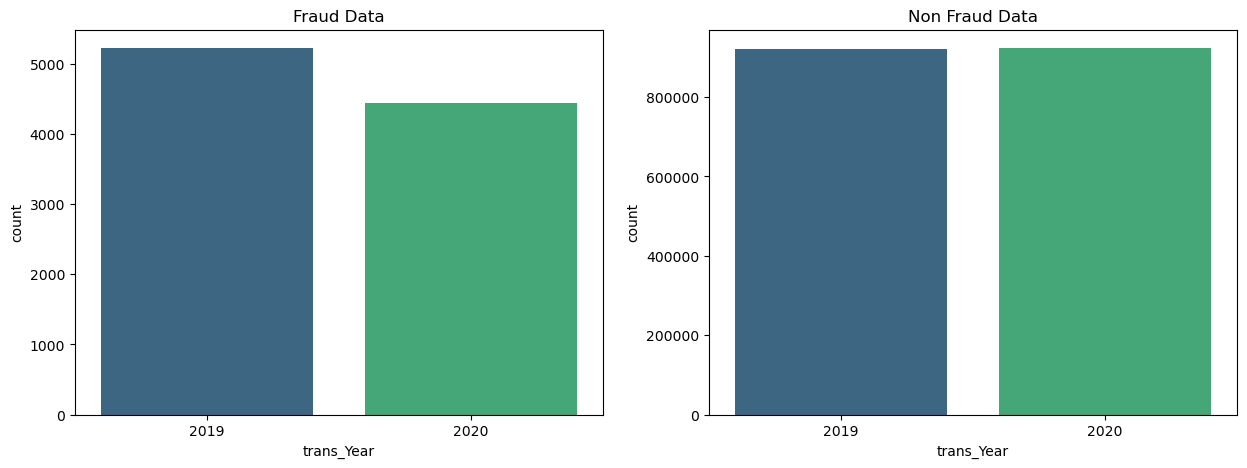

In [190]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x ="trans_Year", data = df_fraud, palette="viridis")
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.countplot(x = "trans_Year", data = df_nonfraud, palette="viridis")
plt.title('Non Fraud Data')

plt.show()

Observation:
- Frauds Transcations are decreased over the year, more frauds transactions in 2019.

#### 5.2.2. Fraud transaction based on gender

In [191]:
df_gender = df_combine[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

Gender  gender_count    percent
0      F       1014749  54.780408
1      M        837645  45.219592

In [192]:
df_fraud_gender = df_combine[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

Gender  is_fraud    count  gender_count  percent_grp
0      F         0  1009850       1014749    99.517221
1      F         1     4899       1014749     0.482779
2      M         0   832893        837645    99.432695
3      M         1     4752        837645     0.567305

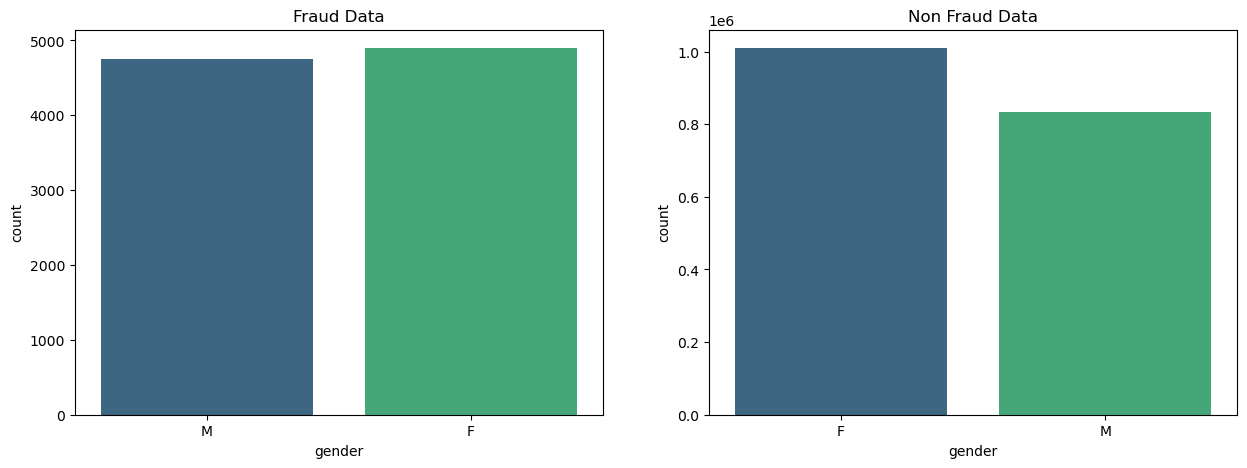

In [193]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = "gender", data = df_fraud, palette="viridis")
plt.title('Fraud Data')
#plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "gender", data = df_nonfraud, palette="viridis")
plt.title('Non Fraud Data')
#plt.xticks(rotation = 90)
plt.show()

Observation:
- Frauds Transcations are done on both male and female but fraud transcations is slightly more on Female's credit card holders

#### 5.2.3. Fraud transcations in months

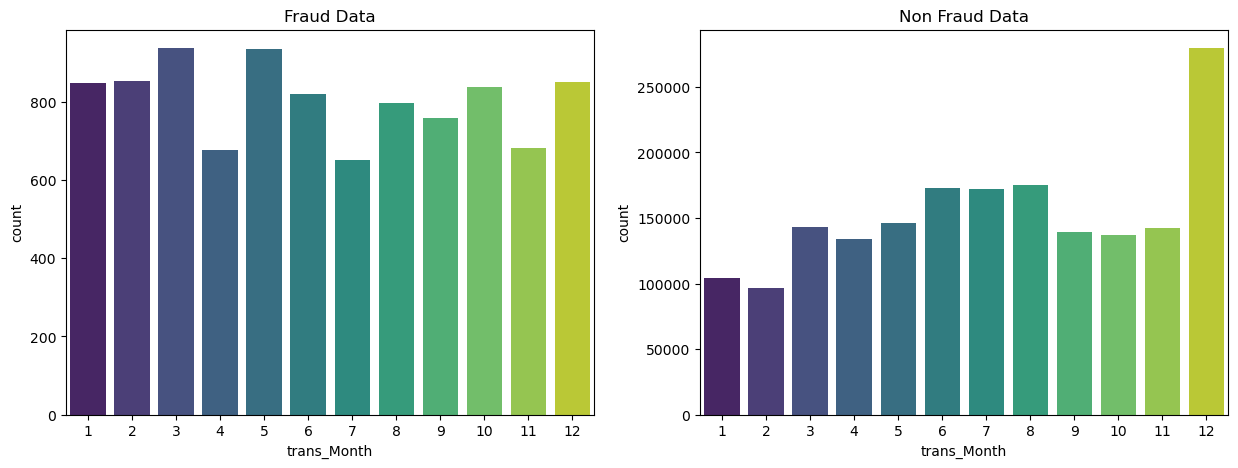

In [194]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x= "trans_Month", data = df_fraud, palette="viridis")
plt.title('Fraud Data')
#plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x= "trans_Month", data = df_nonfraud, palette="viridis")
plt.title('Non Fraud Data')
#plt.xticks(rotation = 90)
plt.show()

Observation:
- Count of frauds transcations are more in 1st, 2nd, 3rd and 5th month where count of normal transcation is less.
- Count of frauds transcations is more in 12th month where count of normal transcation is also more

#### 5.2.4. Fraud transactions in weekdays

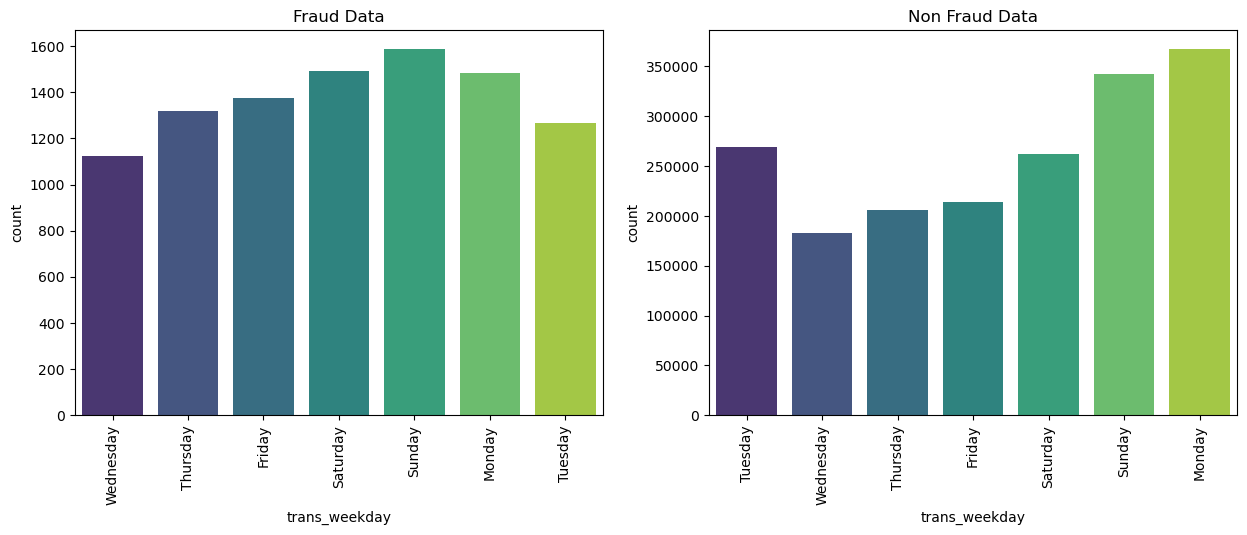

In [195]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = "trans_weekday", data = df_fraud, palette="viridis")
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "trans_weekday", data = df_nonfraud, palette="viridis")
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Observation:
- Count of frauds transactions are more on Sunday, Saturday and Monday where count of normal transcation is less in Saturday and more in Sunday and Monday

#### 5.2.5. Fraud transaction on daywise

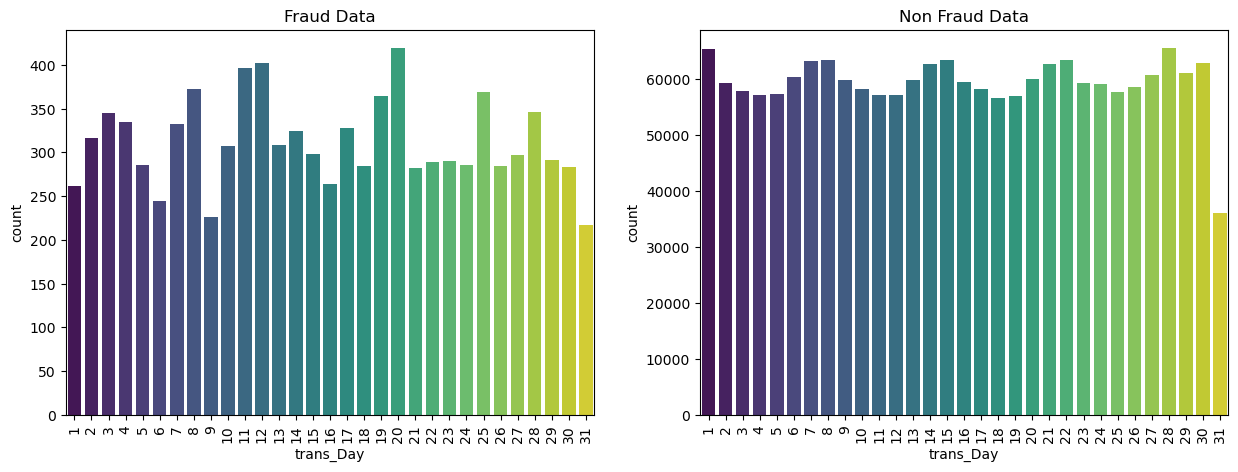

In [196]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = "trans_Day", data = df_fraud, palette="viridis")
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "trans_Day", data = df_nonfraud, palette="viridis")
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Observation:
- Frauds transactions are more on 20th, 12th and 11th days of month.

#### 5.2.6. Hourly based Fraud Transactions

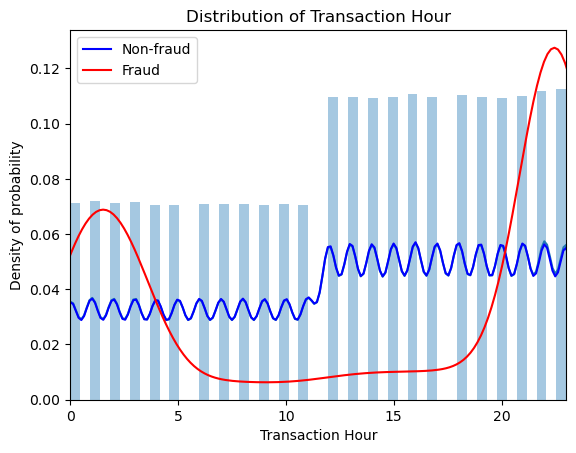

In [197]:
# Time Distribution plot for transactions
plt.title('Distribution of Transaction Hour')
sns.distplot(df_combine['trans_Hour'])

target_0 = df_combine.loc[df_combine['is_fraud'] == 0]
target_1 = df_combine.loc[df_combine['is_fraud'] == 1]
ax1=sns.distplot(target_0[['trans_Hour']], hist=False, color='b', label='Non-fraud')
ax2=sns.distplot(target_1[['trans_Hour']], hist=False, color='r', label='Fraud')
ax1.set_xlim(0, max(df_combine[df_combine['is_fraud']==1]['trans_Hour']))
ax2.set_xlim(0, max(df_combine[df_combine['is_fraud']==1]['trans_Hour']))
plt.legend()
plt.xlabel('Transaction Hour')
plt.ylabel('Density of probability')
plt.show()

Observation:
- Frauds Transcations are done on the odd hours of the day 22-3 hr (i.e 1am-2am and then increased after 8pm till 23pm )

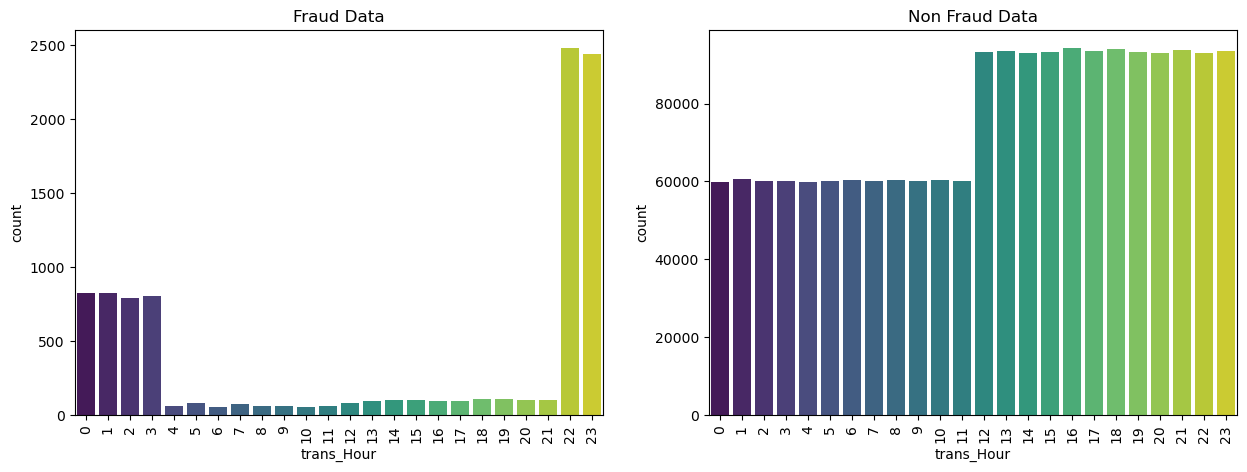

In [198]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = "trans_Hour", data = df_fraud, palette="viridis")
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "trans_Hour", data = df_nonfraud, palette="viridis")
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Observation:
- Frauds transactions are done at odd hours of the day (22 - 3)Hr

#### 5.2.7. Fraud Transaction in age_bins

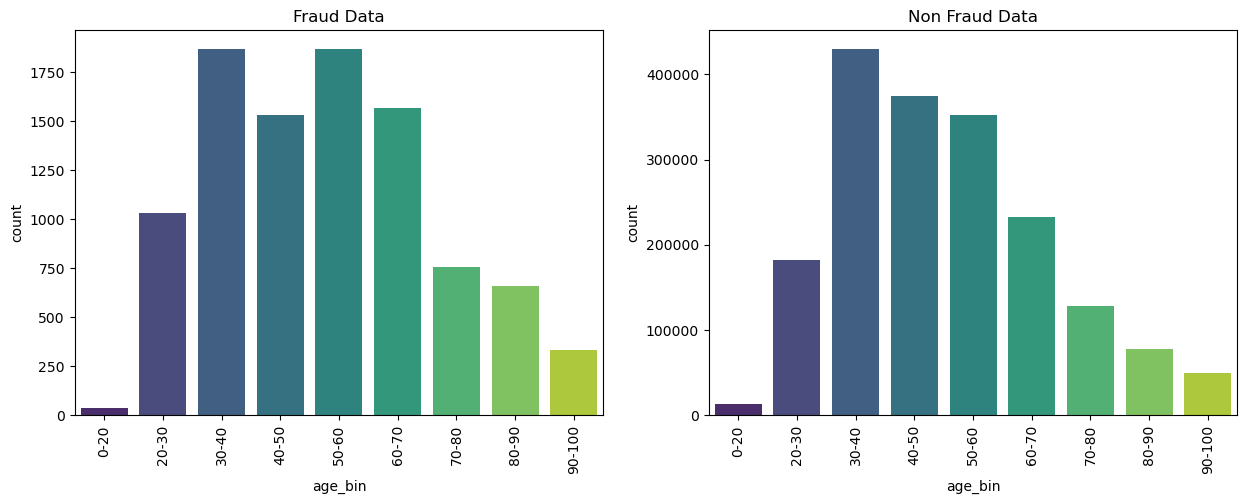

In [199]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = "age_bin", data = df_fraud, palette="viridis")
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "age_bin", data = df_nonfraud, palette="viridis")
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Observation:
- Count of Frauds transactions are more on credit card holder's age group of 20 to 60
- Count of Frauds transactions are more on credit card holder's age group of 50 to 60 where as count of normal transactions is less in them.

#### 5.2.8. Fraud Transactions in categories

In [200]:
df_category = df_combine[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

Category  category_count    percent
2    gas_transport          188029  10.150594
4      grocery_pos          176191   9.511529
6             home          175460   9.472067
12    shopping_pos          166463   8.986371
7        kids_pets          161727   8.730702
11    shopping_net          139322   7.521186
0    entertainment          134118   7.240252
1      food_dining          130729   7.057300
10   personal_care          130085   7.022534
5   health_fitness          122553   6.615925
9         misc_pos          114229   6.166561
8         misc_net           90654   4.893883
3      grocery_net           64878   3.502387
13          travel           57956   3.128708

In [201]:
df_fraud_category = df_combine[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100
df_fraud_category.sort_values(by = ['category_count'], ascending=False)

Category  is_fraud   count  category_count    percent  percent_grp
4    gas_transport         0  187257          188029  10.150594    99.589425
5    gas_transport         1     772          188029  10.150594     0.410575
8      grocery_pos         0  173963          176191   9.511529    98.735463
9      grocery_pos         1    2228          176191   9.511529     1.264537
13            home         1     265          175460   9.472067     0.151032
12            home         0  175195          175460   9.472067    99.848968
25    shopping_pos         1    1056          166463   8.986371     0.634375
24    shopping_pos         0  165407          166463   8.986371    99.365625
14       kids_pets         0  161423          161727   8.730702    99.812029
15       kids_pets         1     304          161727   8.730702     0.187971
23    shopping_net         1    2219          139322   7.521186     1.592713
22    shopping_net         0  137103          139322   7.521186    98.407287
1    entertainment         1     292          134118   7.240252     0.217719
0    entertainment         0  133826          134118   7.240252    99.782281
3      food_dining         1     205          130729   7.057300     0.156813
2      food_dining         0  130524          130729   7.057300    99.843187
20   personal_care         0  129795          130085   7.022534    99.777069
21   personal_care         1     290          130085   7.022534     0.222931
11  health_fitness         1     185          122553   6.615925     0.150955
10  health_fitness         0  122368          122553   6.615925    99.849045
18        misc_pos         0  113907          114229   6.166561    99.718110
19        misc_pos         1     322          114229   6.166561     0.281890
16        misc_net         0   89472           90654   4.893883    98.696141
17        misc_net         1    1182           90654   4.893883     1.303859
7      grocery_net         1     175           64878   3.502387     0.269737
6      grocery_net         0   64703           64878   3.502387    99.730263
26          travel         0   57800           57956   3.128708    99.730830
27          travel         1     156           57956   3.128708     0.269170

In [202]:
df_fraud_cate=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending= False)
df_fraud_cate

Category  is_fraud  count  category_count    percent  percent_grp
23    shopping_net         1   2219          139322   7.521186     1.592713
17        misc_net         1   1182           90654   4.893883     1.303859
9      grocery_pos         1   2228          176191   9.511529     1.264537
25    shopping_pos         1   1056          166463   8.986371     0.634375
5    gas_transport         1    772          188029  10.150594     0.410575
19        misc_pos         1    322          114229   6.166561     0.281890
7      grocery_net         1    175           64878   3.502387     0.269737
27          travel         1    156           57956   3.128708     0.269170
21   personal_care         1    290          130085   7.022534     0.222931
1    entertainment         1    292          134118   7.240252     0.217719
15       kids_pets         1    304          161727   8.730702     0.187971
3      food_dining         1    205          130729   7.057300     0.156813
13            home         1    265          175460   9.472067     0.151032
11  health_fitness         1    185          122553   6.615925     0.150955

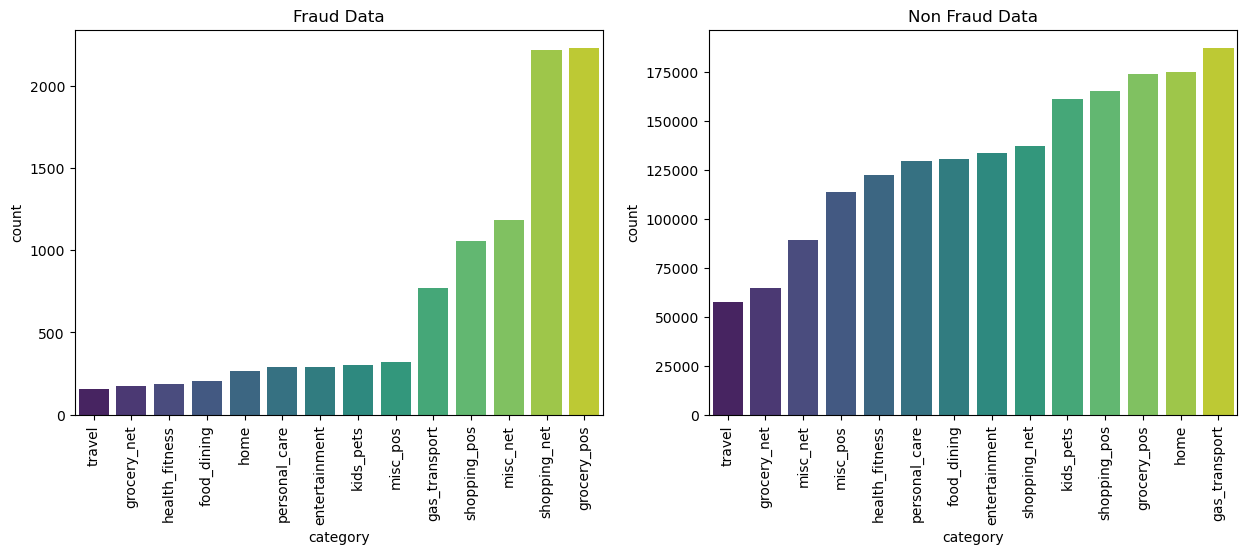

In [203]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = "category", data = df_fraud, order=df_fraud['category'].value_counts().sort_values().index, palette="viridis")
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "category", data = df_nonfraud, order=df_nonfraud['category'].value_counts().sort_values().index, palette="viridis")
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Observation:
- Frauds transactions are done more at:
- grocery_pos, shopping_net, misc_net, shopping_pos, gas_transport Categories
- shopping_net where count of normal transaction is less.
- Frauds transactions is slightly less in gas_transport, shopping_pos where count of normal transaction is more.

#### 5.2.9. Fraud Transactions in job

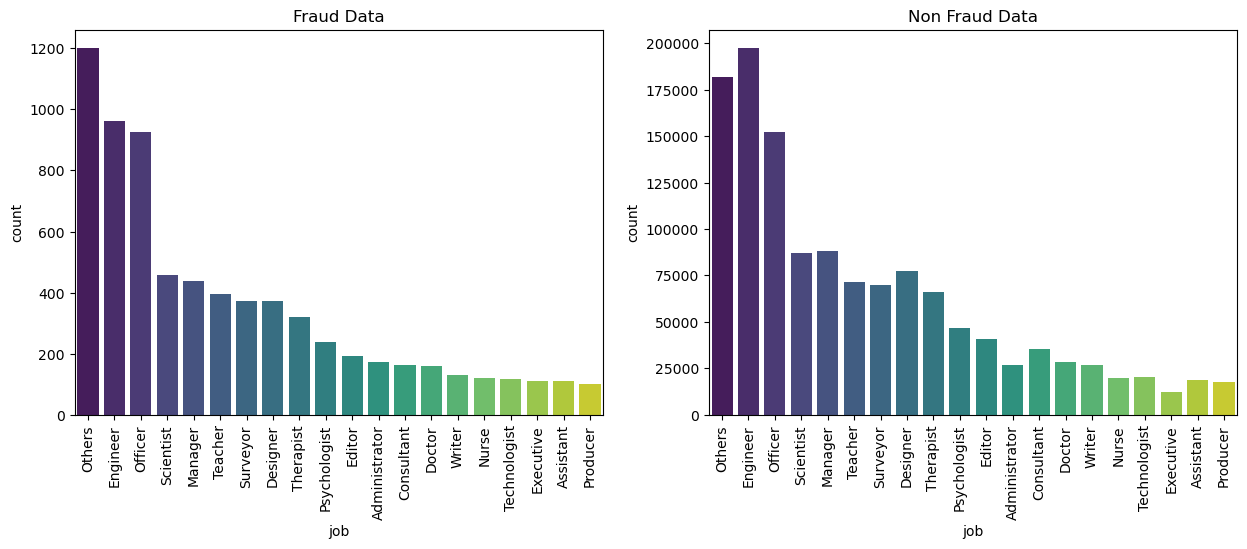

In [204]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = "job", data = df_fraud, order=df_fraud.job.value_counts().iloc[:20].index, palette="viridis")
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "job", data = df_nonfraud, order=df_fraud.job.value_counts().iloc[:20].index, palette="viridis")
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Observation:
- Frauds transactions are done more at: Engineer, officer, others, scientist Categories

#### 5.2.10. Fraud Transactions in State

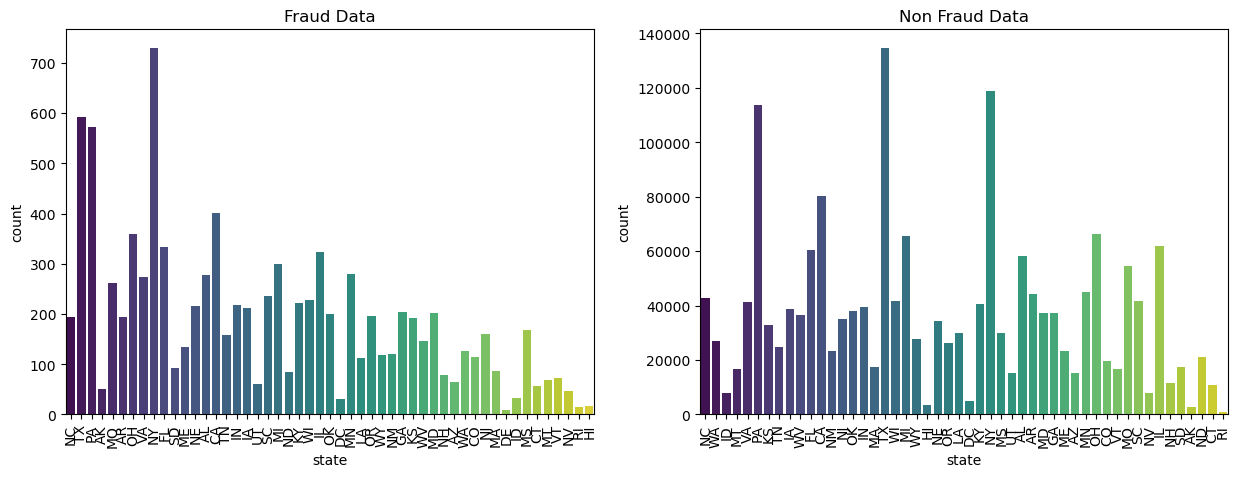

In [205]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = "state", data = df_fraud, palette="viridis")
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "state", data = df_nonfraud, palette="viridis")
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Observation:
- Frauds transactions are more in NY, TX and PA States.

#### 5.2.11. Fraud Transactions in State_bin

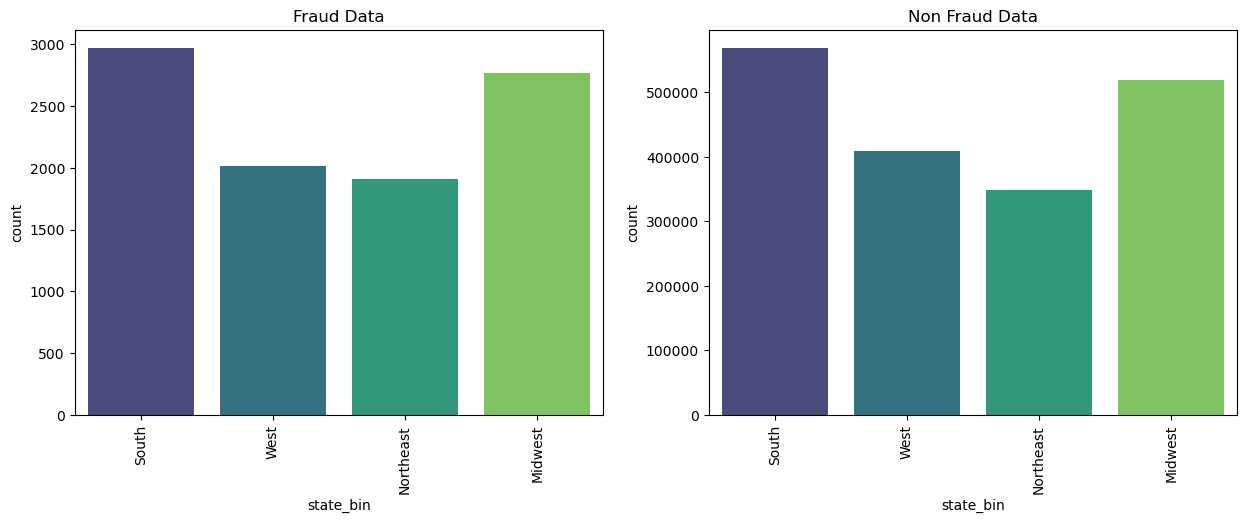

In [206]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = "state_bin", data = df_fraud, palette="viridis")
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "state_bin", data = df_nonfraud, palette="viridis")
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Observation:
- Frauds transactions are more in South , MIdwest and lower in West and Northeast States.

#### 5.2.12. Fraud Transactions in city (top 20)

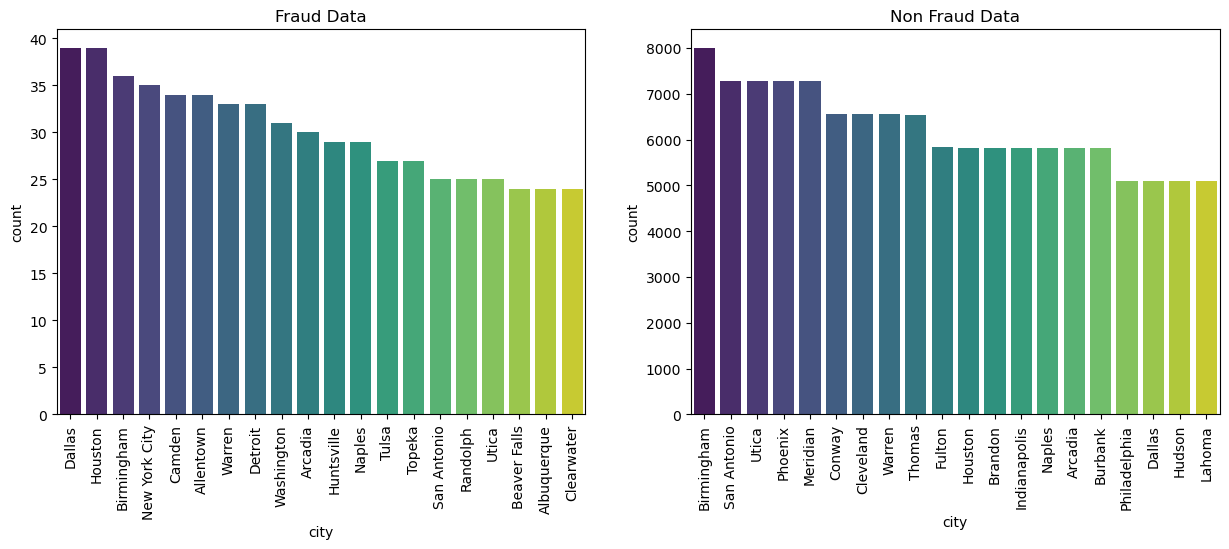

In [207]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = "city", data = df_fraud, order=df_fraud.city.value_counts().iloc[:20].index, palette="viridis")
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "city", data = df_nonfraud, order=df_nonfraud.city.value_counts().iloc[:20].index, palette="viridis")
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Observation:
- Frauds transactions are more in Dallas , Houston City and Birmingham City

#### 5.2.13. Fraud Transactions in street(top 20)

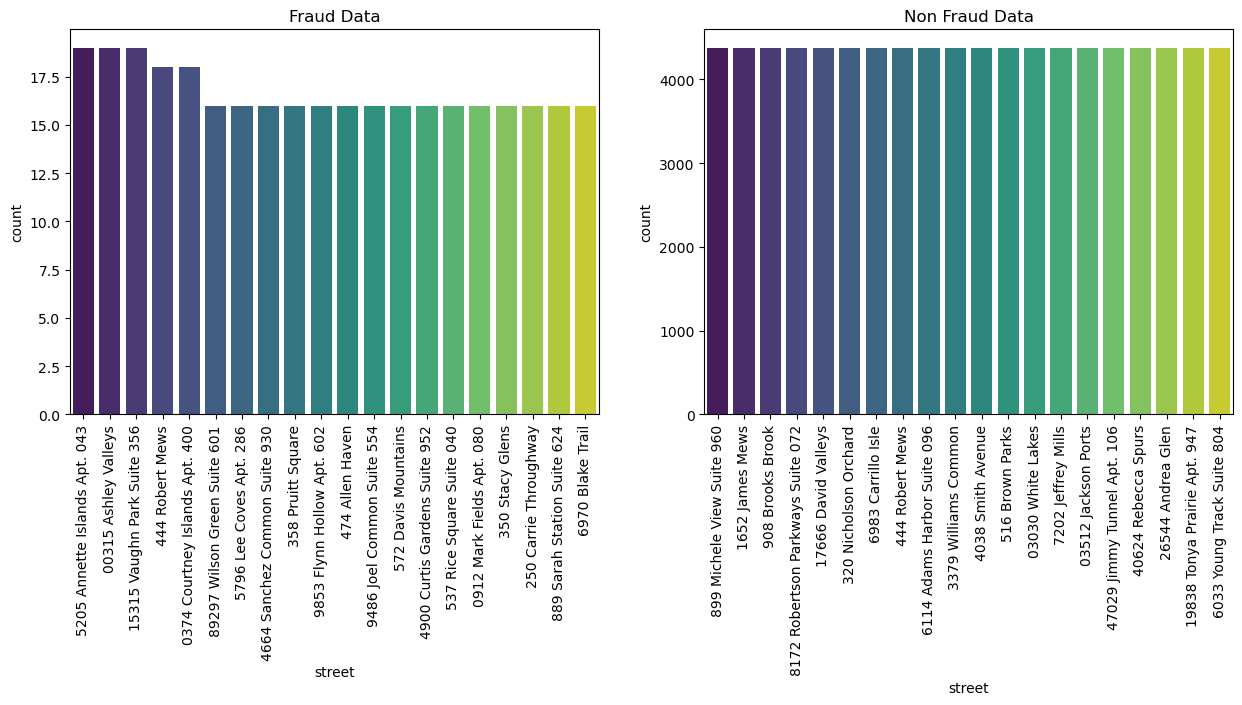

In [208]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = "street", data = df_fraud, order=df_fraud.street.value_counts().iloc[:20].index, palette="viridis")
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "street", data = df_nonfraud, order=df_nonfraud.street.value_counts().iloc[:20].index, palette="viridis")
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Observation:
- Frauds transactions are more in 00315 Ashley Valleys, 15315 Vaughn Park Suite 356 and 5205 Annette Islands Apt. 043 street.

#### 5.2.14. Fraud Transactions in merchant(top 20)

In [209]:
df_merchant = df_combine[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

Merchant  merchant_count   percent
316                      fraud_Kilback LLC            6262  0.338049
105                      fraud_Cormier LLC            5246  0.283201
571                       fraud_Schumm PLC            5195  0.280448
349                         fraud_Kuhn LLC            5031  0.271594
70                         fraud_Boyer PLC            4999  0.269867
..                                     ...             ...       ...
143    fraud_Douglas, DuBuque and McKenzie            1101  0.059437
633                     fraud_Treutel-King            1098  0.059275
544                 fraud_Satterfield-Lowe            1095  0.059113
221     fraud_Hahn, Douglas and Schowalter            1091  0.058897
516  fraud_Ritchie, Bradtke and Stiedemann            1090  0.058843

[693 rows x 3 columns]

In [210]:
df_fraud_merchant = df_combine[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100
df_fraud_merchant.sort_values(by = ['merchant_count'], ascending=False)

Merchant  is_fraud  count  merchant_count  \
631                       fraud_Kilback LLC         1     62            6262   
630                       fraud_Kilback LLC         0   6200            6262   
211                       fraud_Cormier LLC         1     53            5246   
210                       fraud_Cormier LLC         0   5193            5246   
1135                       fraud_Schumm PLC         0   5154            5195   
...                                     ...       ...    ...             ...   
1082                 fraud_Satterfield-Lowe         0   1091            1095   
1083                 fraud_Satterfield-Lowe         1      4            1095   
442      fraud_Hahn, Douglas and Schowalter         1      5            1091   
441      fraud_Hahn, Douglas and Schowalter         0   1086            1091   
1027  fraud_Ritchie, Bradtke and Stiedemann         0   1090            1090   

       percent  percent_grp  
631   0.338049     0.990099  
630   0.338049    99.009901  
211   0.283201     1.010294  
210   0.283201    98.989706  
1135  0.280448    99.210780  
...        ...          ...  
1082  0.059113    99.634703  
1083  0.059113     0.365297  
442   0.058897     0.458295  
441   0.058897    99.541705  
1027  0.058843   100.000000  

[1378 rows x 6 columns]

In [211]:
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

Merchant  is_fraud  count  merchant_count  \
673                     fraud_Kozey-Boehm         1     60            2758   
490     fraud_Herman, Treutel and Dickens         1     38            1870   
1226                     fraud_Terry-Huel         1     56            2864   
607                 fraud_Kerluke-Abshire         1     50            2635   
884   fraud_Mosciski, Ziemann and Farrell         1     53            2821   
...                                   ...       ...    ...             ...   
775        fraud_Lesch, D'Amore and Brown         1      1            2659   
1089        fraud_Schaefer, Fay and Hilll         1      1            2664   
950       fraud_Parker, Nolan and Trantow         1      1            2795   
1335                    fraud_Windler LLC         1      1            3170   
977   fraud_Prosacco, Kreiger and Kovacek         1      1            3454   

       percent  percent_grp  
673   0.148888     2.175489  
490   0.100950     2.032086  
1226  0.154611     1.955307  
607   0.142248     1.897533  
884   0.152289     1.878766  
...        ...          ...  
775   0.143544     0.037608  
1089  0.143814     0.037538  
950   0.150886     0.035778  
1335  0.171130     0.031546  
977   0.186461     0.028952  

[685 rows x 6 columns]

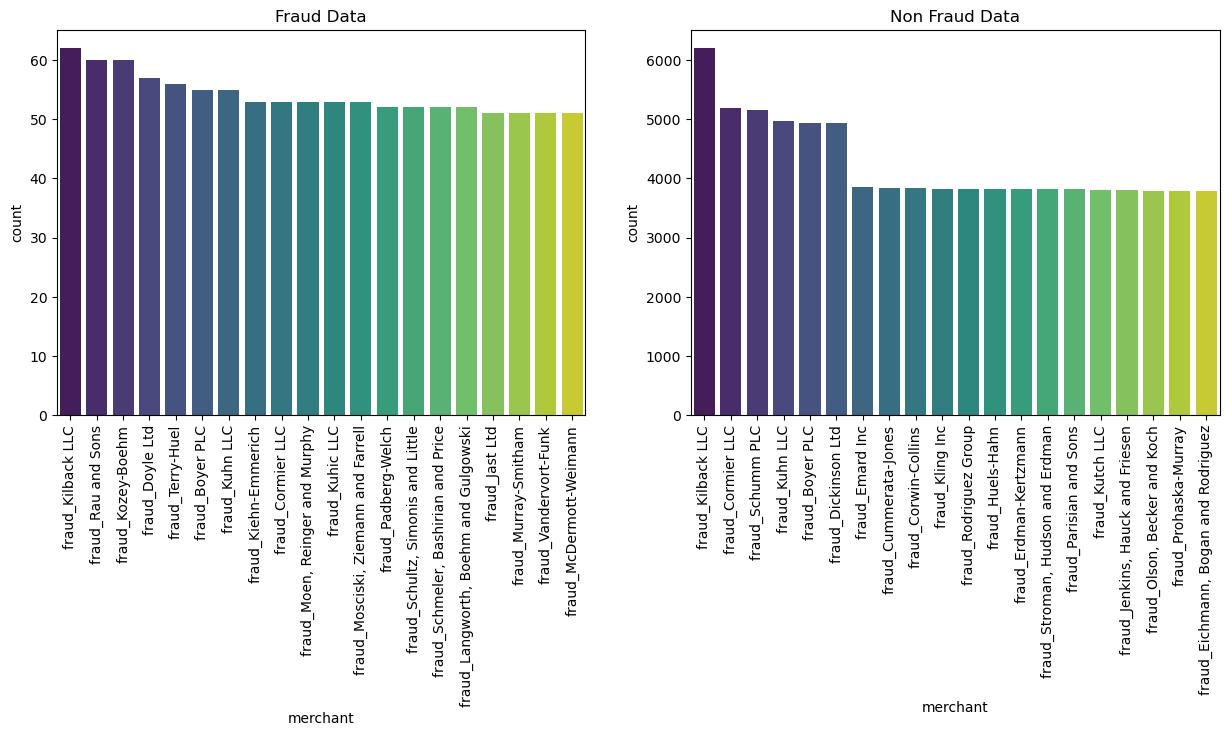

In [212]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x = "merchant", data = df_fraud, order=df_fraud.merchant.value_counts().iloc[:20].index, palette="viridis")
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "merchant", data = df_nonfraud, order=df_nonfraud.merchant.value_counts().iloc[:20].index, palette="viridis")
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Observation:
- Frauds transactions are more for fraud_Kilback LLC, fraud_Rau and sons, fraud_Kozey.Boehm merchants.
- Figure shows fraud_Kilback LLC did 6000 cost transaction there is fraud of 60.

#### 5.2.15. Mean of Fraud and non Fraud Transactions

In [213]:
pd.concat(
[df_combine['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df_combine.loc[df_combine['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df_combine.loc[df_combine['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

Row Type  Overall Amt Distribution  Non Fraud Amt Distribution  \
0    count              1.852394e+06                1.842743e+06   
1     mean              7.006357e+01                6.765128e+01   
2      std              1.592540e+02                1.535481e+02   
3      min              1.000000e+00                1.000000e+00   
4      50%              4.745000e+01                4.724000e+01   
5      95%              1.953400e+02                1.895900e+02   
6    99.9%              1.517241e+03                1.519623e+03   
7      max              2.894890e+04                2.894890e+04   

   Fraud Amt Distribution  
0             9651.000000  
1              530.661412  
2              391.028873  
3                1.060000  
4              390.000000  
5             1084.090000  
6             1293.127000  
7             1376.040000

Observation:
- Distribution and Mean of Fraud Transaction's Amount is way different from the Non Fraud Transaction's Amount

- Mean of Non Fraud Transactions: 67.6
- Mean of Fraud Transactions: 530.6

#### 5.2.16. Overall Amount Distribution

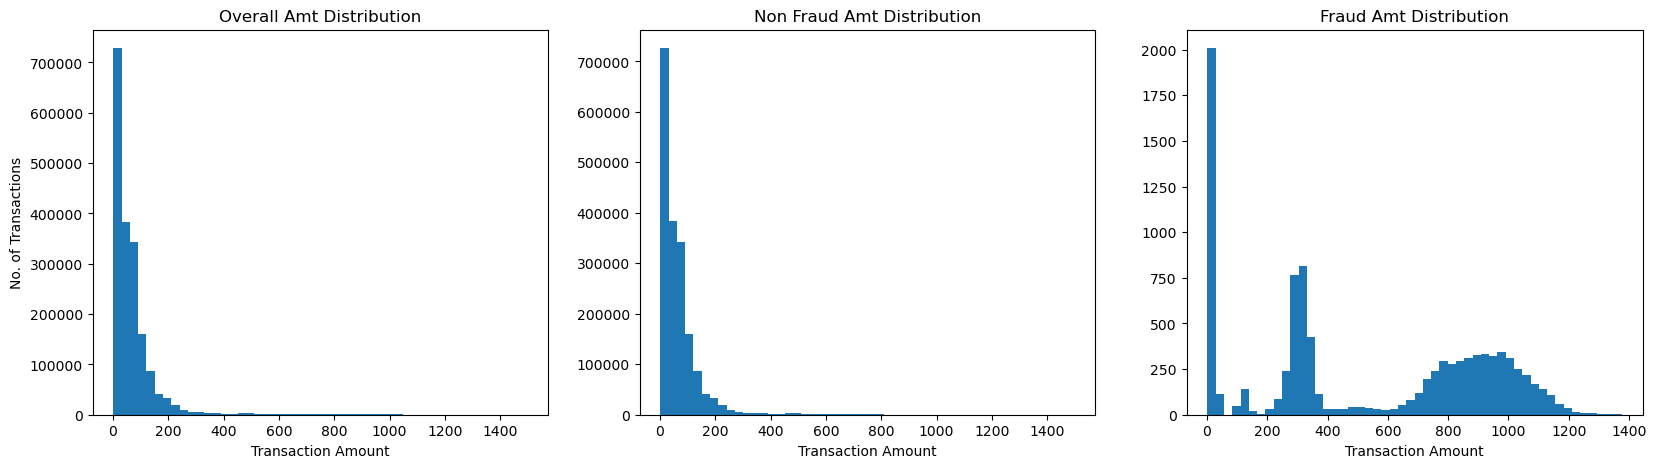

In [214]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df_combine[df_combine['amt']<=1500]['amt'], bins=50)
ax[1].hist(df_combine[(df_combine['is_fraud']==0) & (df_combine['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df_combine[(df_combine['is_fraud']==1) & (df_combine['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('No. of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

Observation:
- Overall amount distribution where fraud amount <=1500(whole data i.e fraud and non fraud data)
- Non fraud amount distribution where fraud amount <=1500 and non_fraud data transactions have transaction approx to 600
- Fraud amount distibution where fraud amount <=1500 and fraud data transactions have transaction approximetly reaches to 1300

#### 5.2.17. Fraud Transactions in AMT

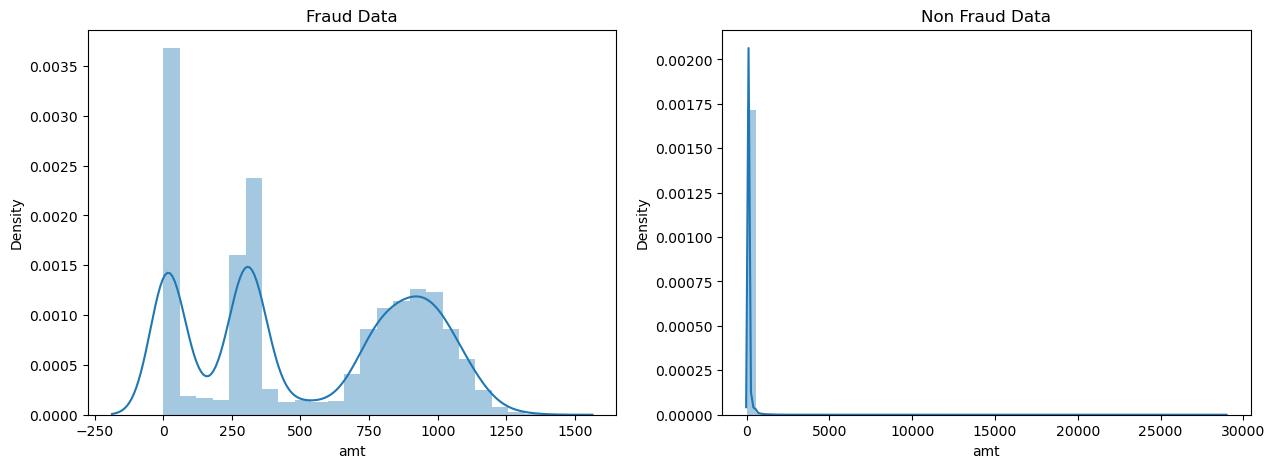

In [215]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['amt'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['amt'])
plt.title('Non Fraud Data')
plt.show()

Observation:
- The amount of fraud_data deducted from account varies alot as shown in graph .

#### 5.2.18. Fraud Transactions in city population

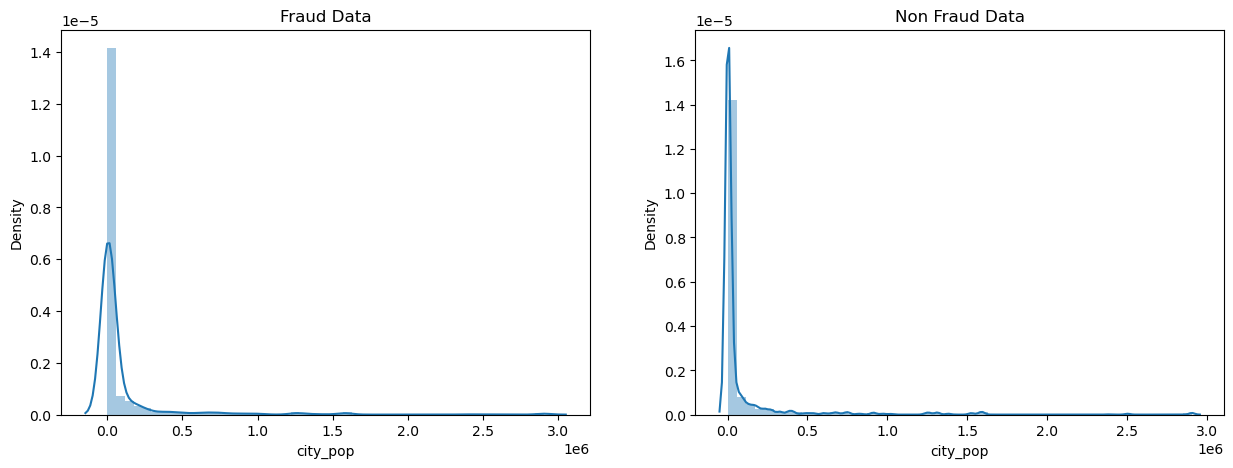

In [216]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['city_pop'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['city_pop'])
plt.title('Non Fraud Data')
plt.show()

Observation:
- city_pop is same for fraud and non fraud data .

#### 5.2.19. Fraud Transactions in dist'

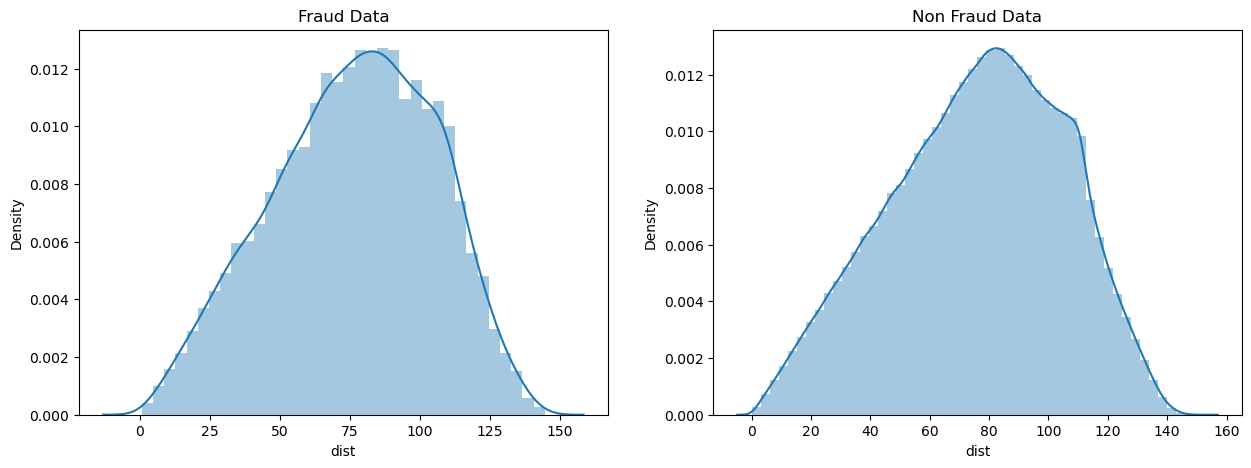

In [217]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['dist'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['dist'])
plt.title('Non Fraud Data')
plt.show()

Observation:
- Dist is same fror fraud_data and non fraud_data both

#### 5.2.20. Fraud Transactions in time_since_prev_transaction

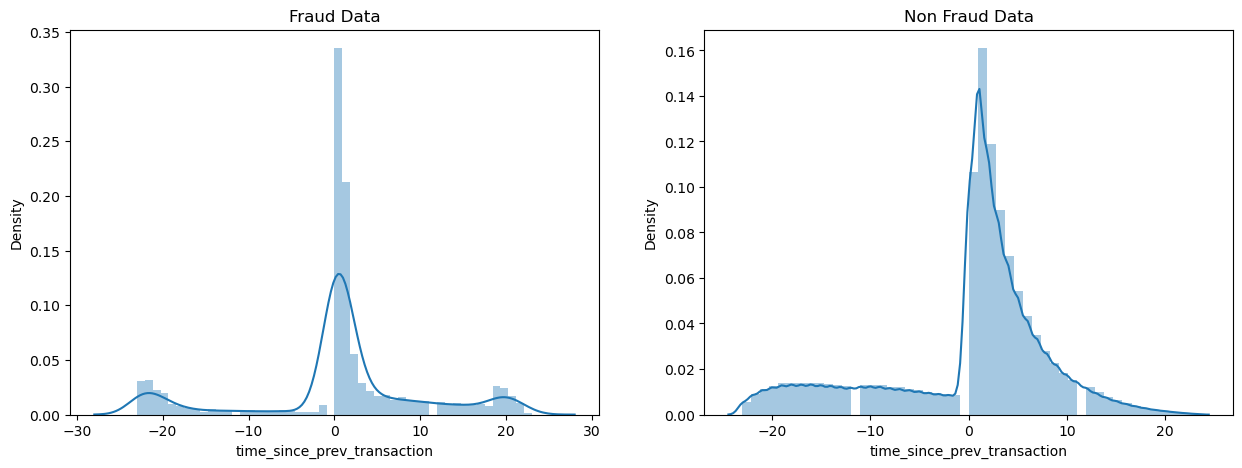

In [218]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['time_since_prev_transaction'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['time_since_prev_transaction'])
plt.title('Non Fraud Data')
plt.show()

Observation:
- Time_since_prev_transaction is also approximately behaving same in fraud_data and non fraud_data both .

#### 5.2.21. Fraud Transactions in distance_between_merchants

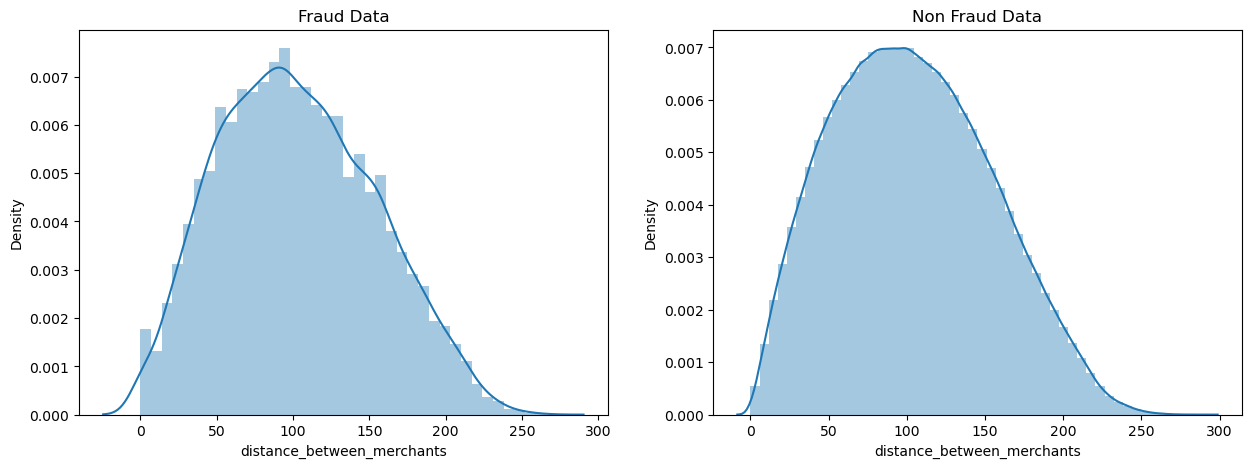

In [219]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['distance_between_merchants'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['distance_between_merchants'])
plt.title('Non Fraud Data')
plt.show()

Observation:
- Distance_between_merchants is also approximately behaving same in fraud_data and non fraud_data both .

#### 5.2.22. Fraud Transactions in 30 Day Transactions by Customers

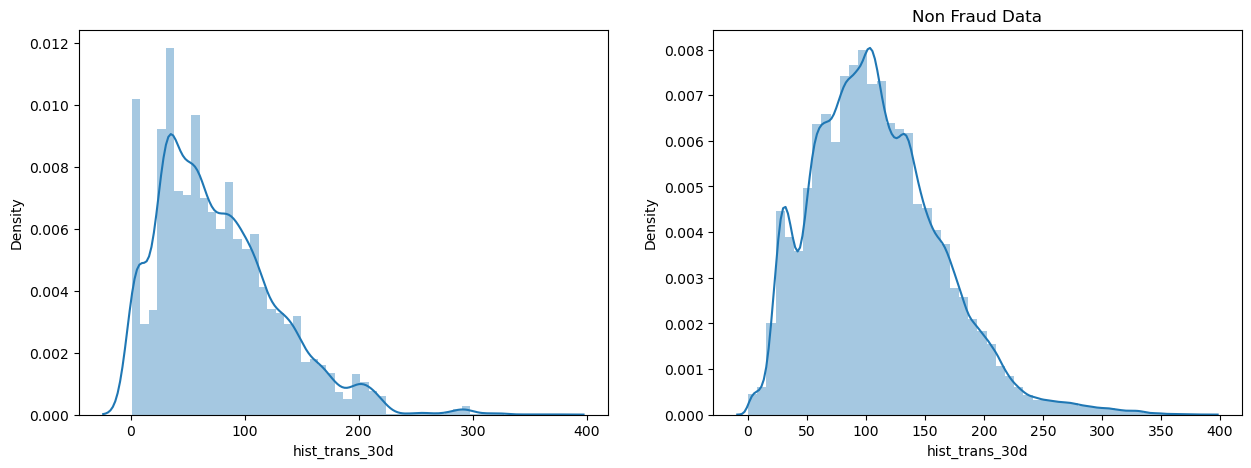

In [220]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['hist_trans_30d'])

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['hist_trans_30d'])
plt.title('Non Fraud Data')
plt.show()

Observation:
- The moving average amount in Frauds Transcations are normally distributed as compared to non_fraud data .

#### 5.2.23. Fraud Transactions in 30 Day Orders Amt Avg by Customers

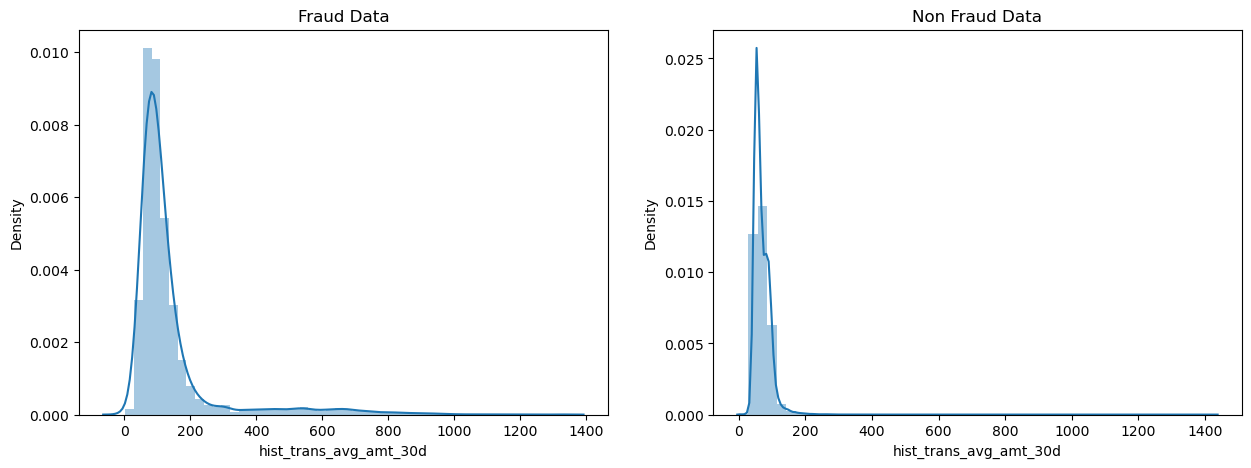

In [221]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['hist_trans_avg_amt_30d'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['hist_trans_avg_amt_30d'])
plt.title('Non Fraud Data')
plt.show()

Observation:
- Distribution of hist_trans_avg_amt_24h for fraud Transcations data spread is same  as compare to non fraud Transcations data.

#### 5.2.24. Fraud Transactions in 24 hours Orders Amt Avg by Customers

In [222]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['hist_trans_avg_amt_24h'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['hist_trans_avg_amt_24h'])
plt.title('Non Fraud Data')
plt.show()

Observation:
- Distribution of hist_trans_avg_amt_24h for fraud Transcations data is widely spread and major frauds happen at lower amounts as compare to non fraud Transcations data.

#### 5.2.25. Fraud Transactions based on category and amt

In [223]:
df_combine['is_fraud'] = df_combine['is_fraud'].astype(str)

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='category', y='amt', hue='is_fraud', data=df_combine)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='state_bin',y='amt',hue='is_fraud',data=df_combine)
plt.xticks(rotation = 90)
plt.show()

Observation:
- The maximum amount spend for fruad transactions were on shopping_net, shopping_pos, misc_net category.
- The maximum amount spend for fruad transactions were at Northeast region.

#### 5.2.26. Fraud Transactions based on state vs amt and trans_day vs amt

In [224]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='state',y='amt',hue='is_fraud',data=df_combine)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_Day',y='amt',hue='is_fraud',data=df_combine)
plt.xticks(rotation = 90)
plt.show()

Observation:
- The maximum amount spend for fruad transactions were at RI, HI, DE and VT State.
- The maximum amount spend for fruad transactions were 2nd , 13th , 15th , 31st day of a month

#### 5.2.27. Fraud Transactions based on age_bin vs amt , trans_year vs amt

In [225]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='age_bin', y='amt', hue='is_fraud', data=df_combine)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_Year',y='amt',hue='is_fraud',data=df_combine)
plt.xticks(rotation = 90)
plt.show()

Observation:
- The maximum amount spend for fruad transactions belongs to credit card holders "0-20", "60-70" and "70-80" age bin.
- The maximum amount spend for fruad transactions were same for both the years.

#### 5.2.28. Fraud Transactions based on job , merchant with amt

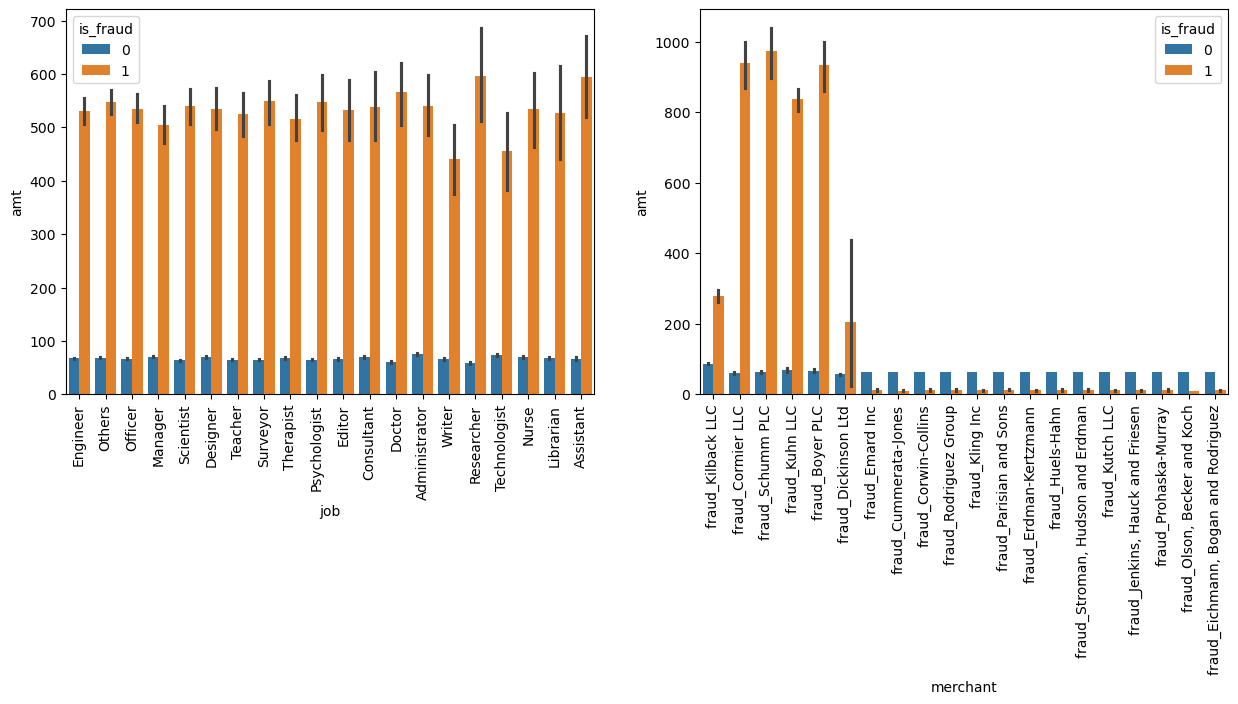

In [226]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='job', y='amt', hue='is_fraud', data=df_combine, order=df_combine.job.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='merchant',y='amt',hue='is_fraud',data=df_combine, order=df_combine.merchant.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
plt.show()

Observation:
- The maximum amount spend for fruad transactions were on job of credit card holders of Researcher, Assistant.
- The maximum amount spend for fruad transactions were at 'fraud_Kilback LLC', 'fraud_Cormier LLC', 'fraud_Schumm PLC',
'fraud_Kuhn LLC', 'fraud_Boyer PLC' and 'fraud_Dickinson Ltd' Merchant.

#### 5.2.29. Fraud Transactions based on trans_hour , gender with amt

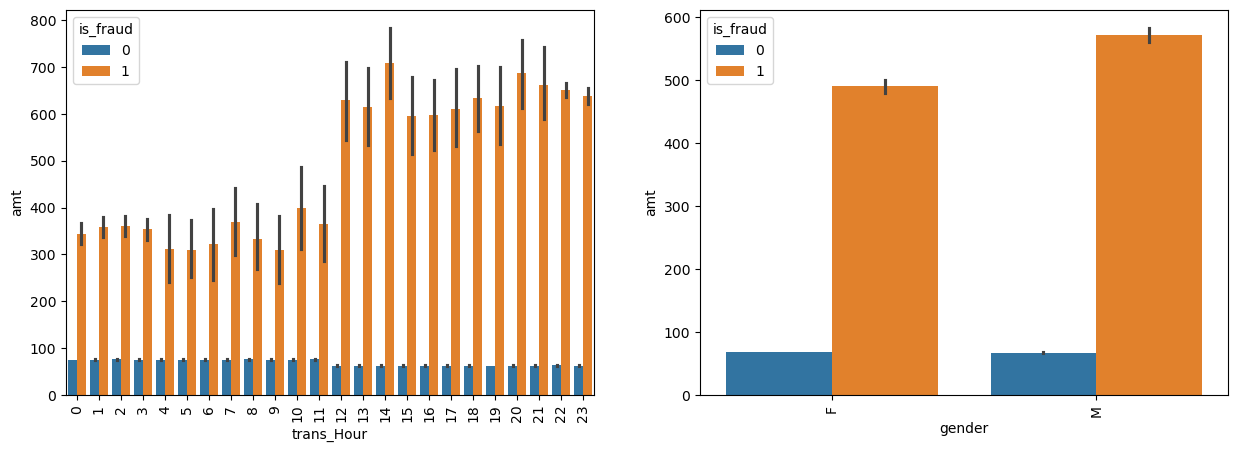

In [227]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='trans_Hour',y='amt',hue='is_fraud',data=df_combine)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='gender',y='amt',hue='is_fraud',data=df_combine)
plt.xticks(rotation = 90)
plt.show()

Observation:
- The maximum amount spend for fruad transactions were done mostly between 12 to 23 Hr
- The maximum amount spend for fruad transactions were done on Male's Credit card Holders.

#### 5.2.30. Fraud Transactions based on trans_month, trans_weekday with amt

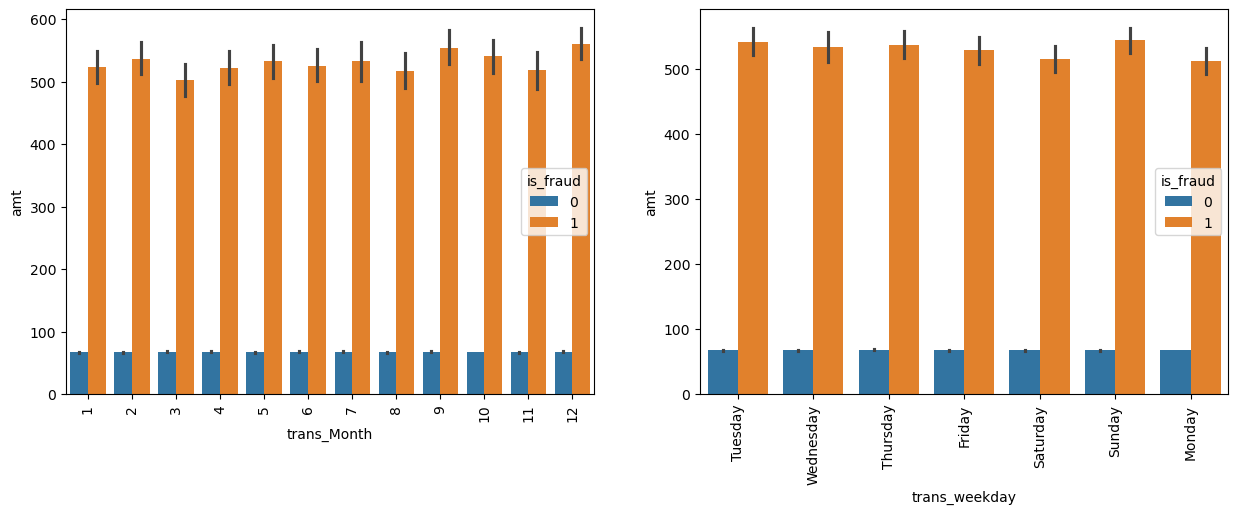

In [228]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='trans_Month',y='amt',hue='is_fraud', data=df_combine)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_weekday',y='amt',hue='is_fraud', data=df_combine)
plt.xticks(rotation = 90)
plt.show()

Observation:
- Nearly same amount spend for fruad transactions were done through out the Month
- Nearly same amount spend for fruad transactions were done through out the Weekday.

#### 5.2.31. Amount by percentage of transactions

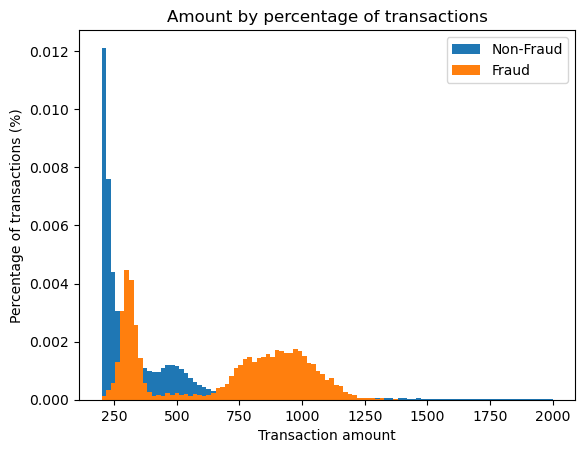

In [229]:
bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.amt, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.amt, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions")
plt.xlabel("Transaction amount")
plt.ylabel("Percentage of transactions (%)")
plt.show()

Observation:
- In between the graph, fraud transaction happened more frequently.

- It seems It would be hard to differentiate fraud from normal transactions by transaction amount alone.

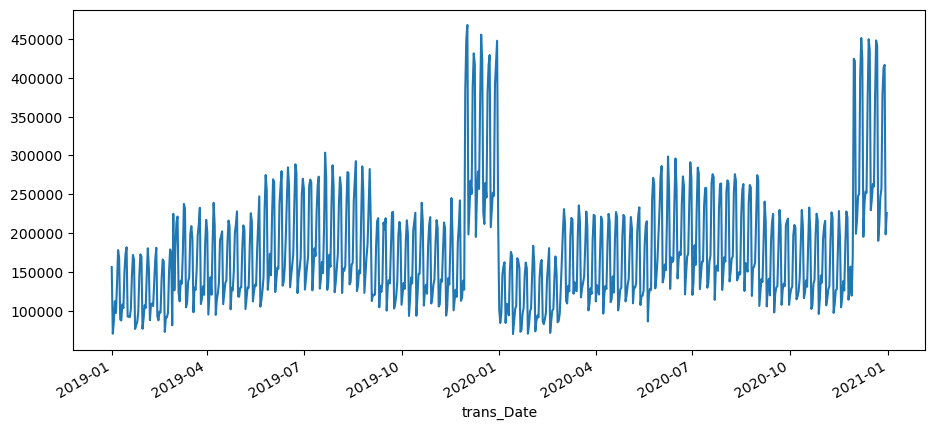

In [230]:
df_combine.groupby('trans_Date')['amt'].sum().plot(figsize=[11,5])
plt.show()

Observation:
- The maximum amount of fraud transactions majorly done at Jan of 2020 and Jan 2021 , means at new year eve more frauded transactions done .

#### 5.2.32. Year Month vs Number of Transactions

In [231]:
df_timeline01 = df_combine.groupby(df_combine['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['trans_year_month','num_of_transactions','customers']
df_timeline01.head()

trans_year_month  num_of_transactions  customers
0          2019-01                52525        913
1          2019-02                49866        918
2          2019-03                70939        916
3          2019-04                68078        913
4          2019-05                72532        910

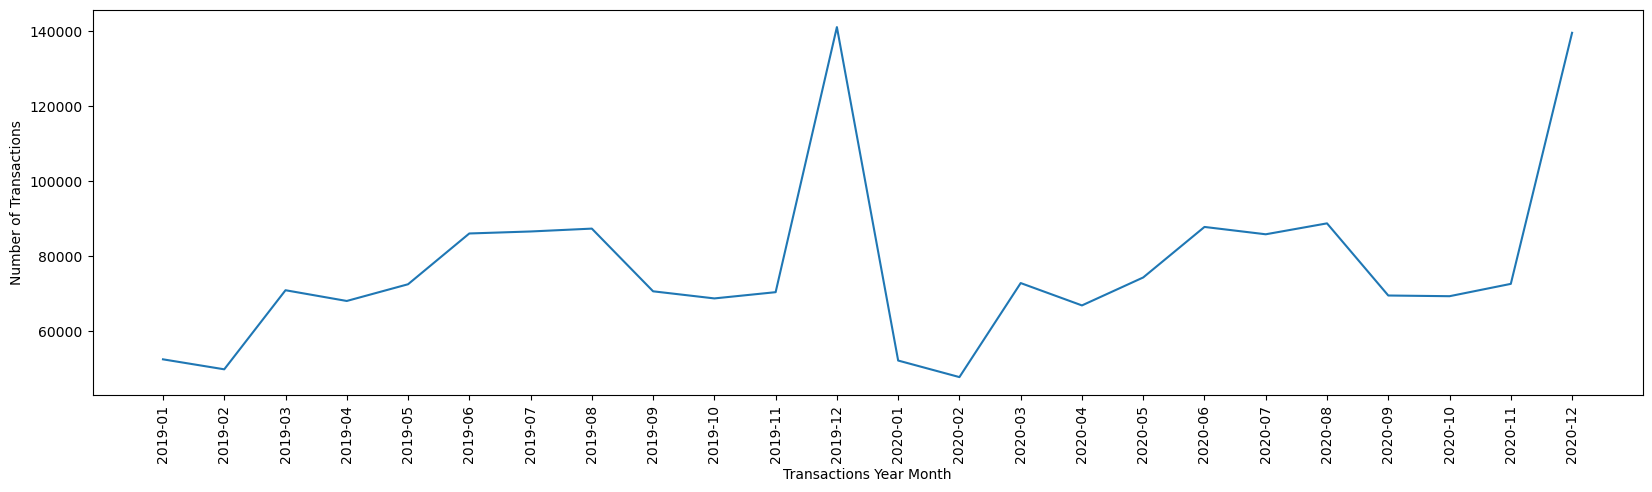

In [232]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['trans_year_month'], rotation = 90)

ax.set_xlabel('Transactions Year Month')
ax.set_ylabel('Number of Transactions')
plt.show()


Observation:
- No of transactions done month wise and its shown in fig that it has increased at nov-dec month of 2020 and 2021, in rest of the months there are normal transactions

#### 5.2.33. Year Month vs Number of Customers Done the Transactions

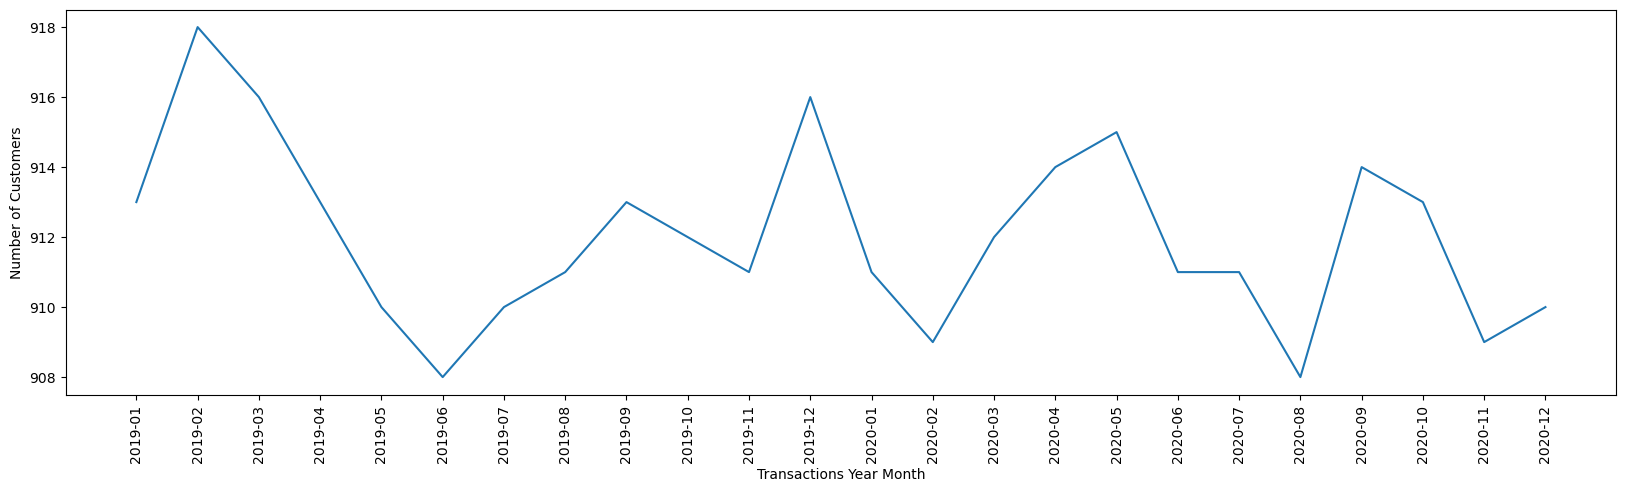

In [233]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['trans_year_month'], rotation = 90)

ax.set_xlabel('Transactions Year Month')
ax.set_ylabel('Number of Customers')
plt.show()


Observation:
- No of customers did transactions month wise as shown in the figure , feb month has highest no of customers laterly decreased and then increased in august and december 2019 .
- in 2020 may and sept month has higher number of customers who did non_fraud transactions.

In [234]:
df_combine['is_fraud'] = df_combine['is_fraud'].astype(int)
df_fraud_transactions = df_combine[df_combine['is_fraud']==1]

df_timeline = df_fraud_transactions.groupby(df_fraud_transactions['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline.columns = ['trans_year_month','num_of_fraud_transactions','fraud_customers']
df_timeline.head()

trans_year_month  num_of_fraud_transactions  fraud_customers
0          2019-01                        506               50
1          2019-02                        517               53
2          2019-03                        494               49
3          2019-04                        376               41
4          2019-05                        408               42

#### 5.2.34. Number of Fraud Transactions

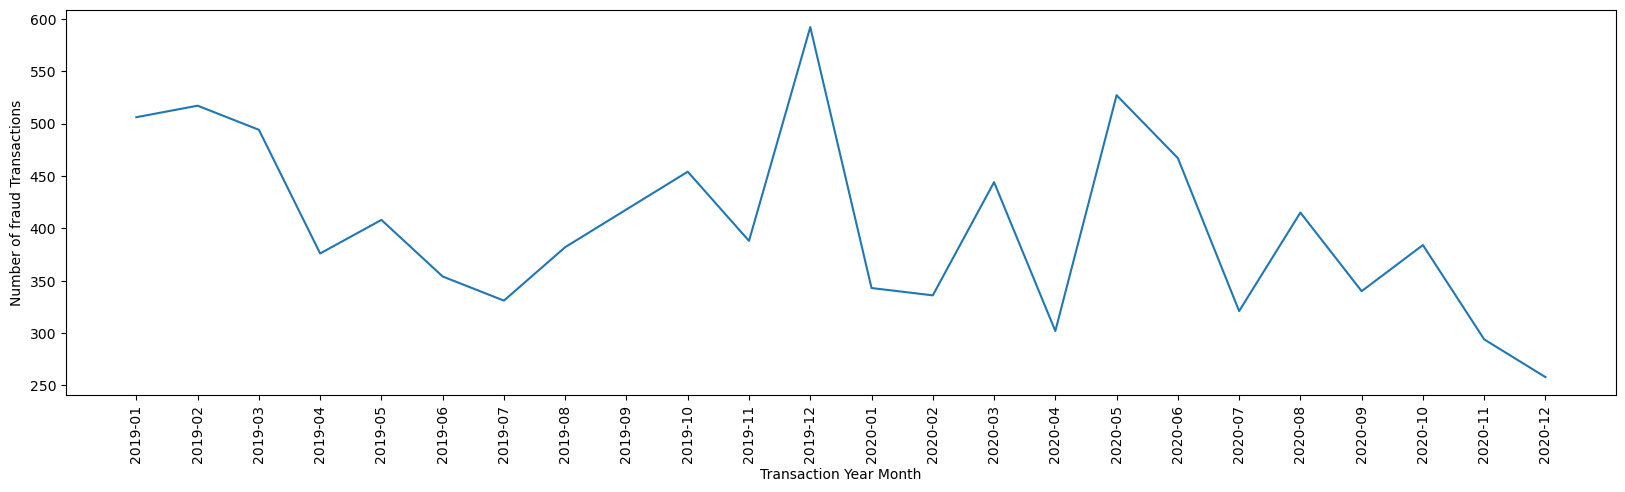

In [235]:
x = np.arange(0,len(df_timeline),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline['trans_year_month'], rotation = 90)

ax.set_xlabel('Transaction Year Month')
ax.set_ylabel('Number of fraud Transactions')
plt.show()

Observation:
- No of fraud transactions done month wise and its shown in fig that it has increased at jan- feb , nov-dec month of 2019 ,in rest of the months there are normal transactions
- in 2020 march , may , august , october months has a peak of fraud transactions as shown in figure

#### 5.2.35. Fraud Customers based on Transaction on month wise

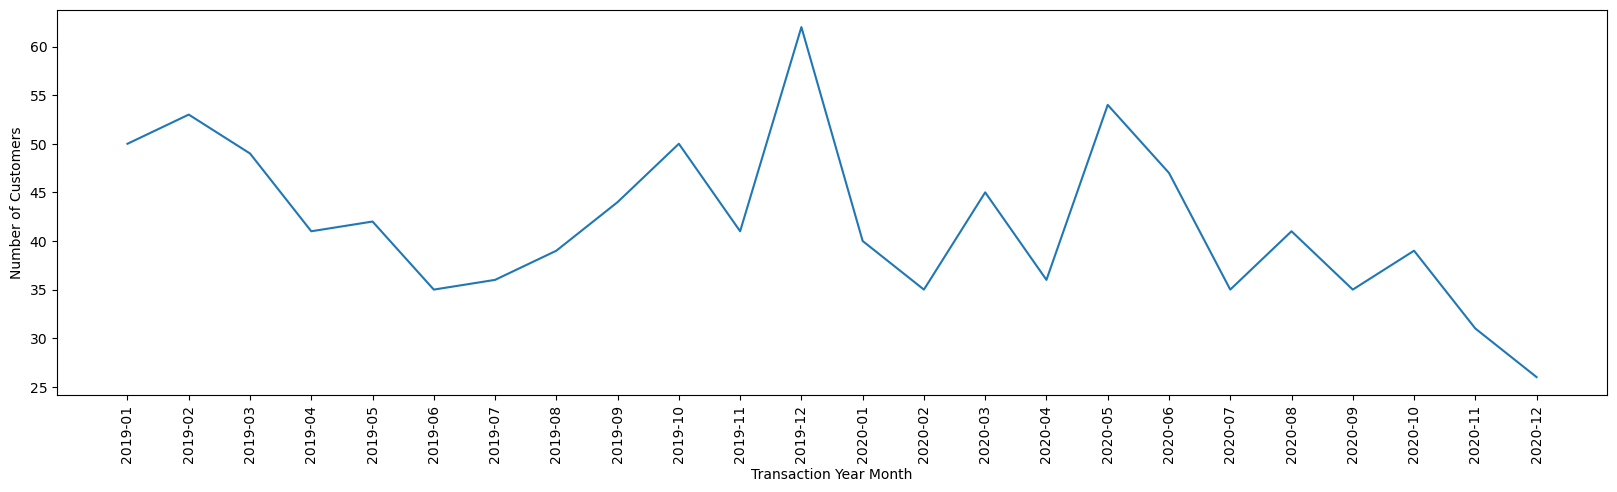

In [236]:
x = np.arange(0,len(df_timeline),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline['trans_year_month'], rotation = 90)

ax.set_xlabel('Transaction Year Month')
ax.set_ylabel('Number of Customers')
plt.show()

Observation:
- No of fraud customers did transactions month wise as shown in the figure , feb month has highest no of customers laterly decreased and then increased in october and december months of 2019 .
- in 2020 march and may, august , october months has higher number of fraud customers who did fraud transactions.

#### 5.2.36. Fraudulent transactions on amount

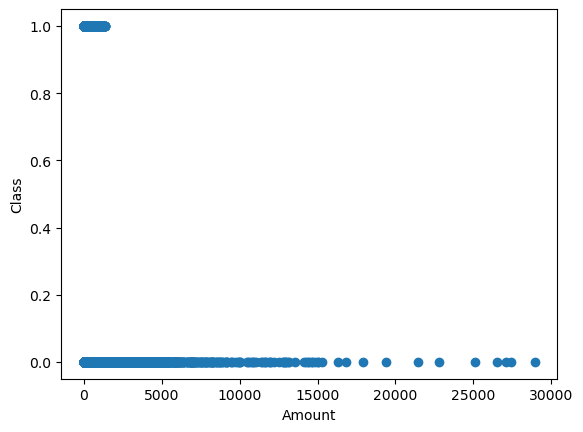

In [237]:
plt.scatter(df_combine['amt'], df_combine['is_fraud'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

Observation:
- The above graph shows that fraudulent transactions are highly concentrated at smaller values when compared to non-fraudulent transactions.
- The above graph shows that most of the fraudulent transactions are of very low amount

#### 5.2.37. KDE plot to visualize the distribution of Amount for both the classes

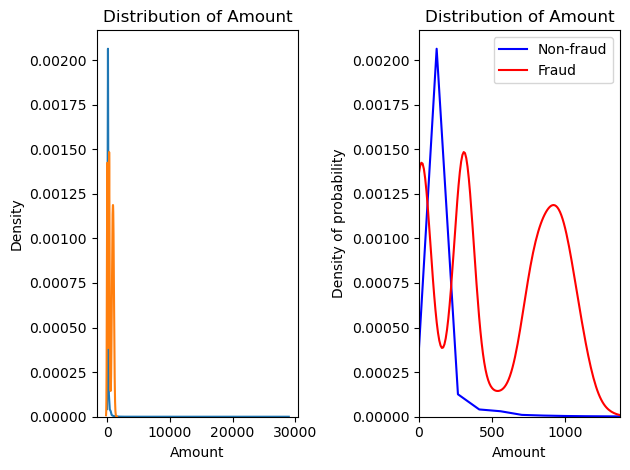

In [238]:
plt.subplot(1,2,1)
plt.rcParams['figure.figsize'] = [10,6]
sns.kdeplot(df_combine.loc[df_combine['is_fraud'] == 0, 'amt'], label = 'Non Fraud')
sns.kdeplot(df_combine.loc[df_combine['is_fraud'] == 1, 'amt'], label = 'Fraud')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Density')

plt.subplot(1,2,2)
target_0 = df_combine.loc[df_combine['is_fraud'] == 0]
target_1 = df_combine.loc[df_combine['is_fraud'] == 1]
ax1=sns.distplot(target_0[['amt']], hist=False, color='b', label='Non-fraud')
ax2=sns.distplot(target_1[['amt']], hist=False, color='r', label='Fraud')
ax1.set_xlim(0, max(df_combine[df_combine['is_fraud']==1]['amt']))
ax2.set_xlim(0, max(df_combine[df_combine['is_fraud']==1]['amt']))
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Density of probability')
plt.title('Distribution of Amount')
plt.tight_layout()
plt.show()

Observation:
- The distribution of amount for Fraud transactions is much higher than non-fradualent transactions.

#### 5.2.38. Time Distribution plot for transactions

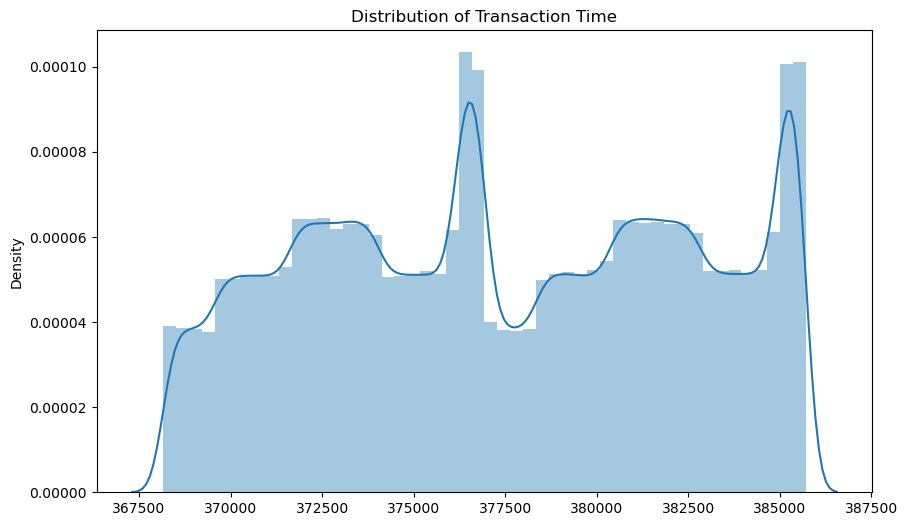

In [239]:
plt.title('Distribution of Transaction Time')
sns.distplot(df_combine['unix_time'].values/(60*60))
plt.show()

Observation:
- The coverage of Distribution of unix Time in hours is shown using the plots

### 5.3. Cost Benefit Analysis

#### 5.3.1. Average number of transactions per month

In [240]:
df_combine.shape

(1852394, 40)

In [241]:
Average_number_of_transactions_per_month= df_combine.shape[0]/24
print(f"Average Number of Transactions per Month - {Average_number_of_transactions_per_month:.2f}")

Average Number of Transactions per Month - 77183.08


#### 5.3.2. Average number of fraudulent transaction per month

In [242]:
fraudulent_transactions= df_combine[df_combine["is_fraud"]==1]

In [243]:
fraudulent_transactions.shape

(9651, 40)

In [244]:
Average_number_of_fraud_transactions_per_month= fraudulent_transactions.shape[0]/24
print(f"Average Number of Fraud Transactions per Month - {Average_number_of_fraud_transactions_per_month}")

Average Number of Fraud Transactions per Month - 402.125


#### 5.3.3. Average amount per fraud transaction

In [245]:
fraudulent_transactions.shape

(9651, 40)

In [246]:
amount_total=fraudulent_transactions['amt'].sum()
amount_total

5121413.290000001

In [247]:
Average_amount_per_fraud_transaction= amount_total/fraudulent_transactions.shape[0]
print(f"Average Amount per Fraud Transaction - {Average_amount_per_fraud_transaction:.2f}")

Average Amount per Fraud Transaction - 530.66


#### Answers to the Cost Benefit Analysis (Part 1) Questions:
      Questions                                           Answer
1. Average number of transactions per month     :        77183.08
2. Average number of fraudulent transaction per month  :  402.125
3. Average amount per fraud transaction          :       530.66

In [248]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 40 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   trans_date_trans_time        datetime64[ns]
 1   cc_num                       int64         
 2   merchant                     object        
 3   category                     object        
 4   amt                          float64       
 5   gender                       object        
 6   street                       object        
 7   city                         object        
 8   state                        object        
 9   zip                          int64         
 10  lat                          float64       
 11  long                         float64       
 12  city_pop                     int64         
 13  job                          object        
 14  dob                          datetime64[ns]
 15  trans_num                    object        
 16  

## Step 6: Preparing the Data for Modelling

In [249]:
df_combine.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_Date', 'trans_Time', 'state_bin', 'age', 'age_bin',
       'trans_Year', 'trans_year_month', 'trans_Month', 'trans_Hour',
       'trans_Day', 'trans_weekday', 'dist', 'prev_merch_lat',
       'prev_merch_long', 'time_since_prev_transaction',
       'distance_between_merchants', 'hist_trans_30d', 'hist_trans_24h',
       'hist_trans_avg_amt_30d', 'hist_trans_avg_amt_24h'],
      dtype='object')

In [250]:
df_combine.shape

(1852394, 40)

**Lets us now check the correlations between the variables using heatmap**

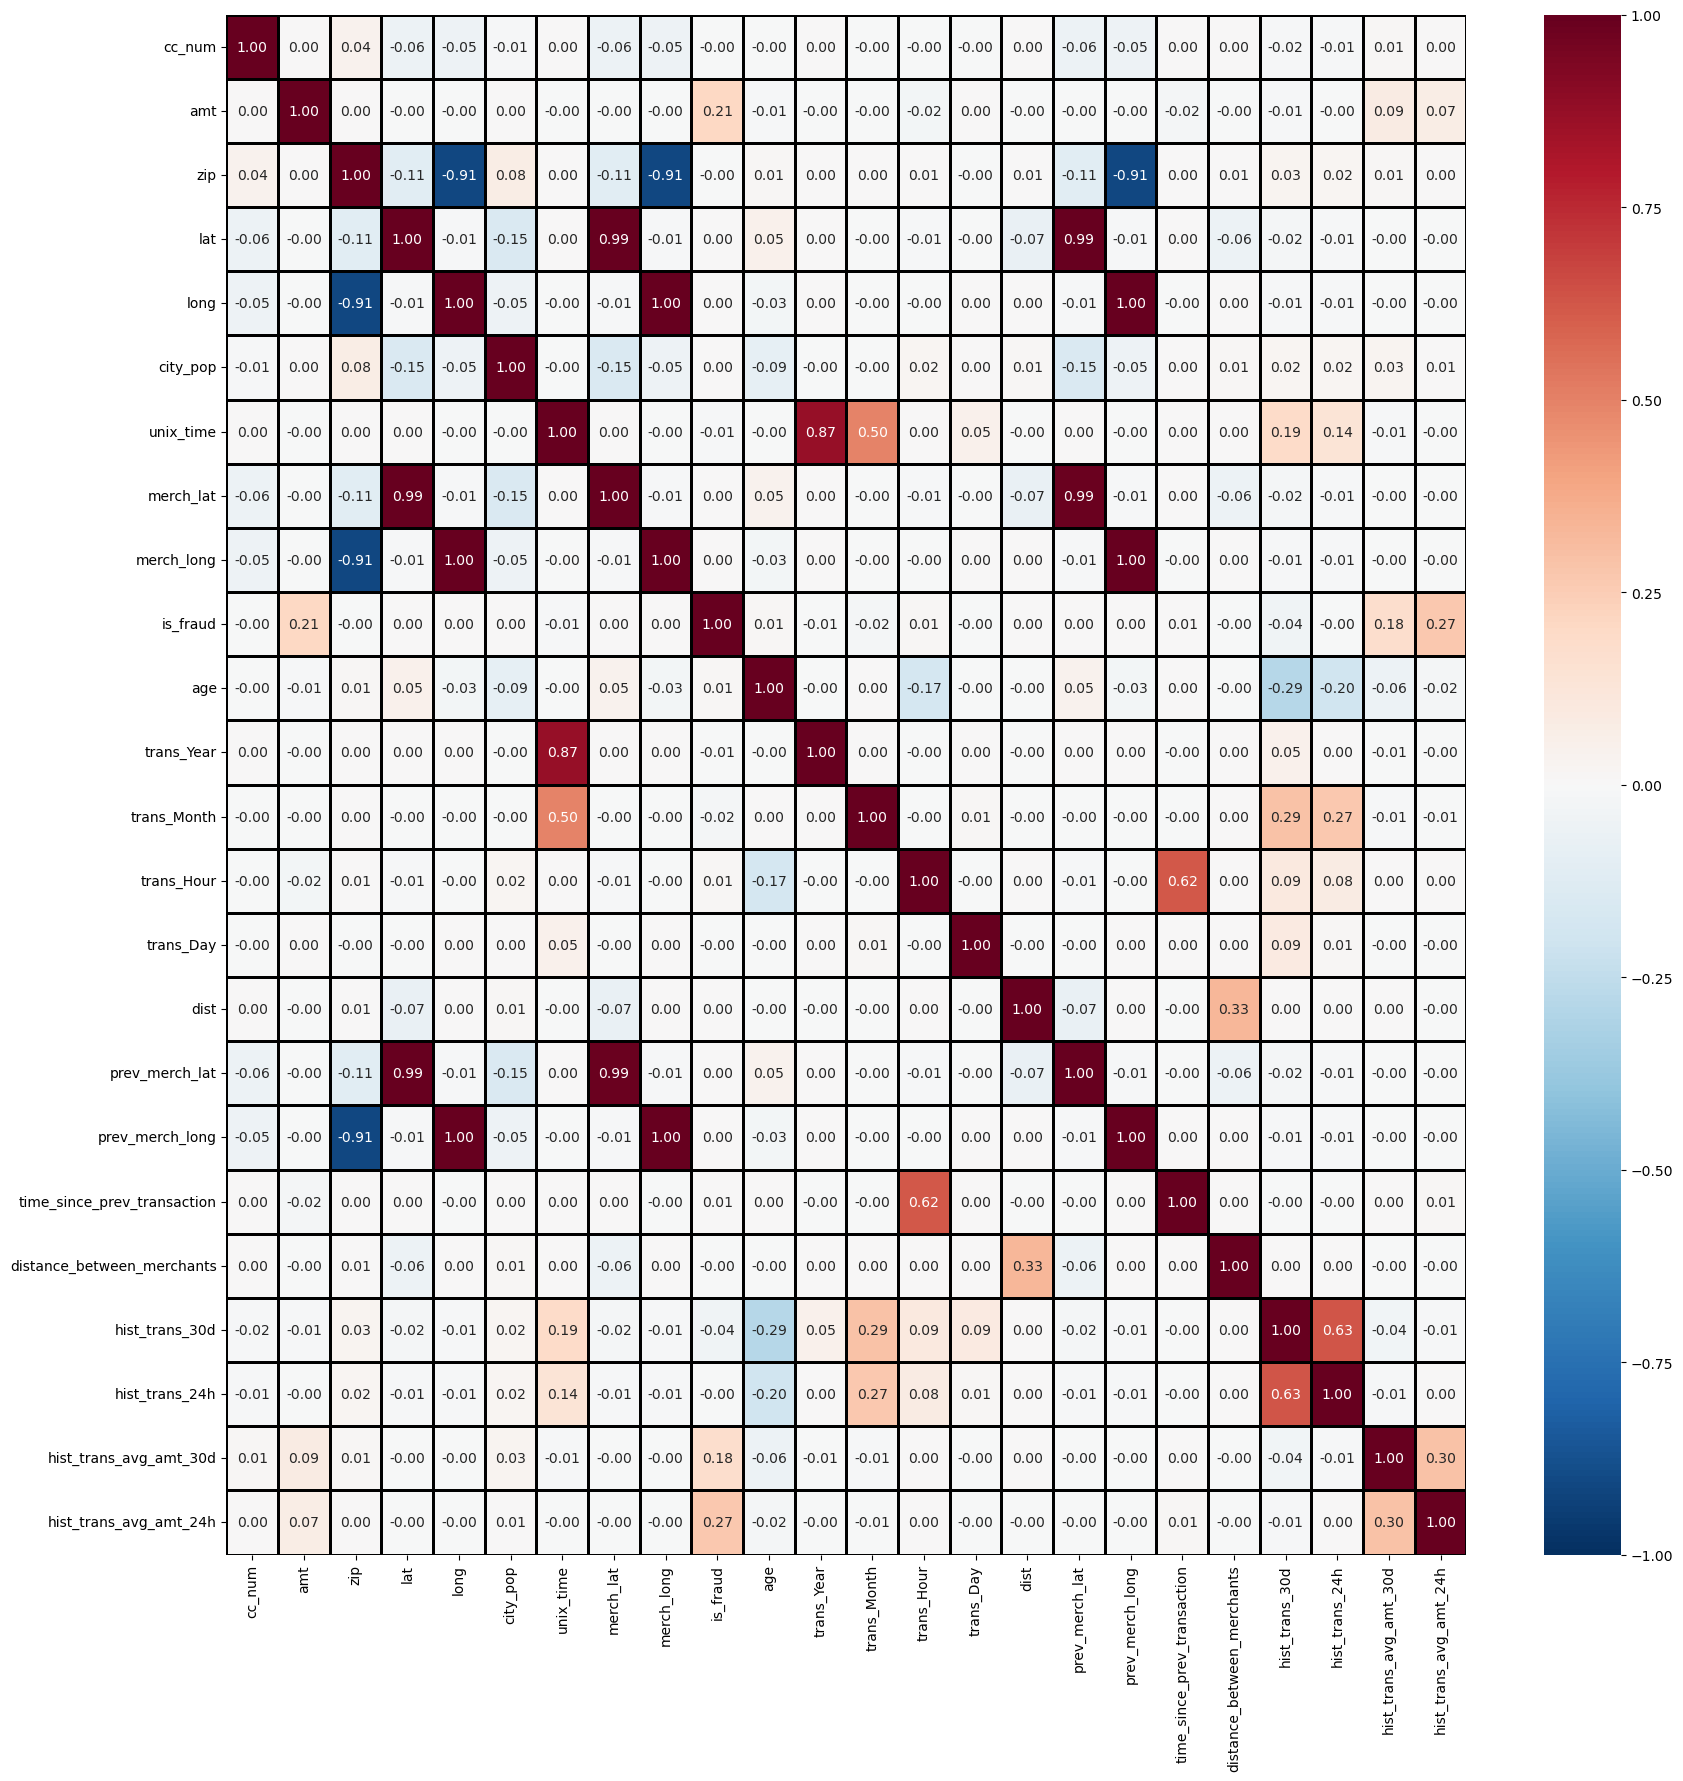

In [251]:
df_num1 = df_combine.select_dtypes(include=['number'])
plt.figure(figsize=(20,20))
sns.heatmap(df_num1.corr(), annot= True, fmt='.2f', vmin=-1, vmax=1, center= 0, linewidths=1, linecolor='black', cmap= 'RdBu_r')
plt.show()

Observation:
- The variables whose correlation more than 0.7 is taken as high correlated value and will drop them

In [252]:
df_combine= df_combine.drop(['prev_merch_lat','prev_merch_long','merch_lat','merch_long','zip'],axis=1)
df_combine= df_combine.drop(['age_bin','trans_Date','unix_time', 'trans_Day','trans_year_month'],axis=1)
df_combine= df_combine.drop(['trans_Time','trans_date_trans_time','dob', 'state_bin'],axis=1)

df_combine.shape

(1852394, 26)

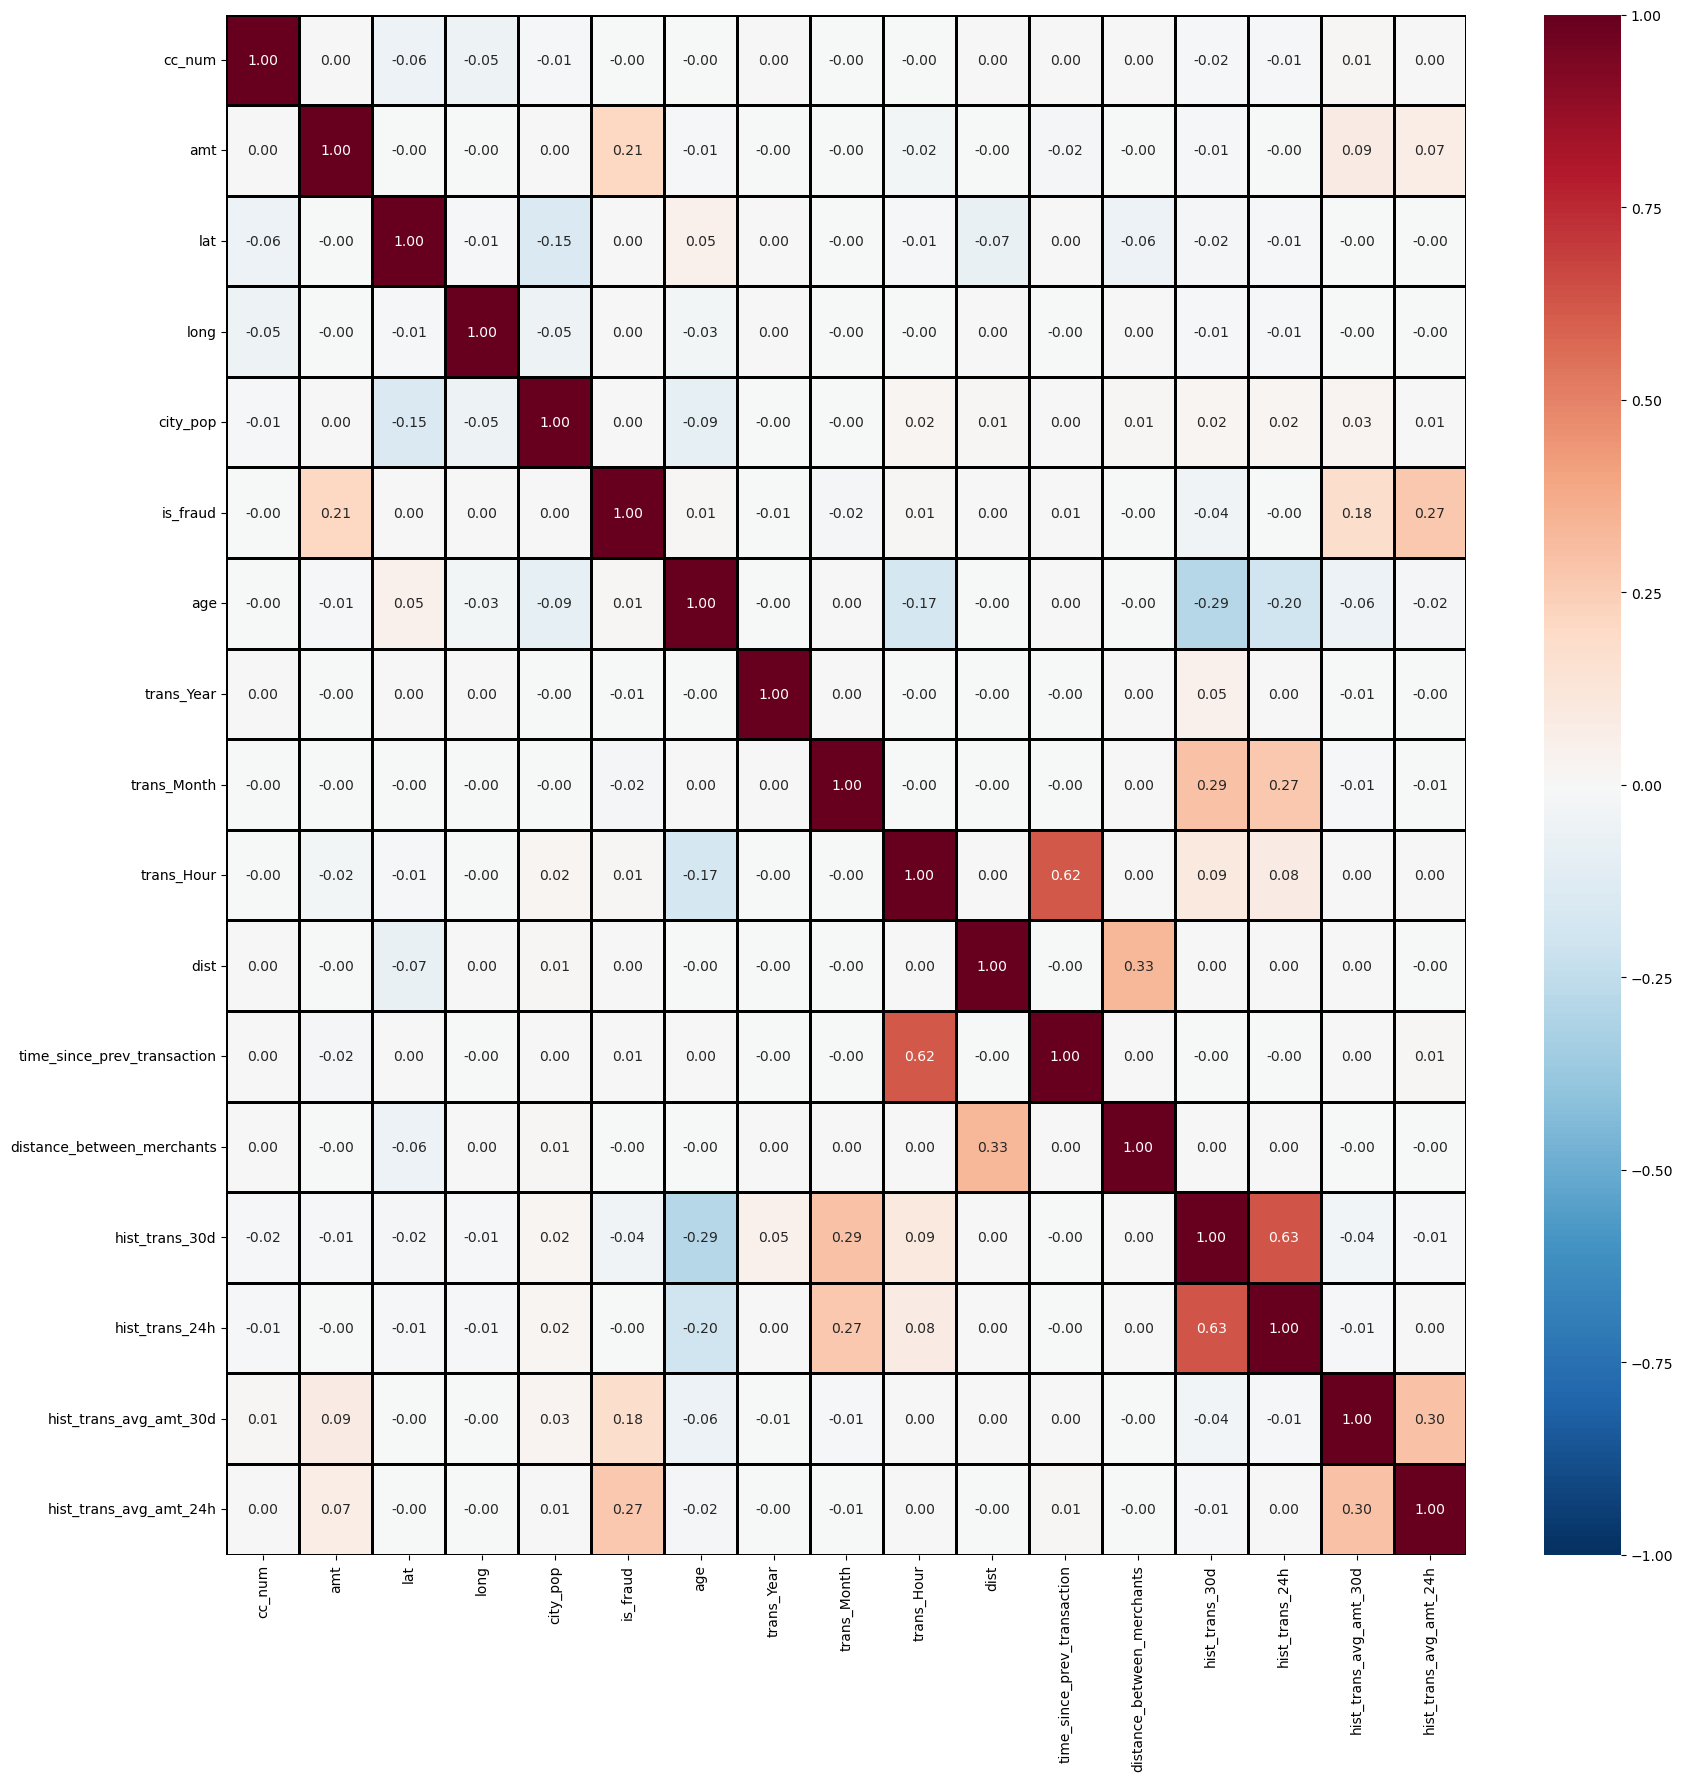

In [253]:
df_num2 = df_combine.select_dtypes(include=['number'])
plt.figure(figsize=(20,20))
sns.heatmap(df_num2.corr(), annot= True, fmt='.2f', vmin=-1, vmax=1, center= 0, linewidths=1, linecolor='black', cmap= 'RdBu_r')
plt.show()

In [254]:
df_combine.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'lat', 'long', 'city_pop', 'job', 'trans_num', 'is_fraud',
       'age', 'trans_Year', 'trans_Month', 'trans_Hour', 'trans_weekday',
       'dist', 'time_since_prev_transaction', 'distance_between_merchants',
       'hist_trans_30d', 'hist_trans_24h', 'hist_trans_avg_amt_30d',
       'hist_trans_avg_amt_24h'],
      dtype='object')

In [255]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 26 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   cc_num                       int64  
 1   merchant                     object 
 2   category                     object 
 3   amt                          float64
 4   gender                       object 
 5   street                       object 
 6   city                         object 
 7   state                        object 
 8   lat                          float64
 9   long                         float64
 10  city_pop                     int64  
 11  job                          object 
 12  trans_num                    object 
 13  is_fraud                     int64  
 14  age                          int64  
 15  trans_Year                   int32  
 16  trans_Month                  int32  
 17  trans_Hour                   int32  
 18  trans_weekday                object 
 19  

**Let us now create Dummy variables for further analysis**

In [256]:
# Creating a dummy variable for 'Category' variable and dropping the first one.
Catg_dummy = pd.get_dummies(df_combine['category'], drop_first=True, prefix='catg', dtype=int)

# Creating a dummy variable for 'Gender' variable and dropping the first one.
gender_dummy = pd.get_dummies(df_combine['gender'], drop_first=True, prefix='gender', dtype=int)

# Creating a dummy variable for 'Weekday' variable and dropping the first one.
week_dummy = pd.get_dummies(df_combine['trans_weekday'], drop_first=True, prefix='weekday', dtype=int)

# Creating a dummy variable for 'Month' variable and dropping the first one.
month_dummy = pd.get_dummies(df_combine['trans_Month'], drop_first=True, prefix='month', dtype=int)

# Creating a dummy variable for 'Year' variable and dropping the first one.
year_dummy = pd.get_dummies(df_combine['trans_Year'], drop_first=True, prefix='year', dtype=int)

# Adding the results to the master dataframe
df_combine = pd.concat([df_combine, Catg_dummy, gender_dummy, week_dummy, month_dummy, year_dummy], axis=1)

# We have created dummies for the variable, so we can drop them
df_combine= df_combine.drop(['category', 'gender', 'trans_weekday', 'trans_Month', 'trans_Year'], axis=1)
df_combine.shape

(1852394, 53)

In [257]:
df_combine.head()

cc_num                            merchant     amt  \
0  2703186189652095          fraud_Rippin, Kub and Mann    4.97   
1      630423337322     fraud_Heller, Gutmann and Zieme  107.23   
2    38859492057661                fraud_Lind-Buckridge  220.11   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell   45.00   
4   375534208663984                 fraud_Keeling-Crist   41.96   

                         street            city state      lat      long  \
0                561 Perry Cove  Moravian Falls    NC  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient    WA  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City    ID  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder    MT  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill    VA  38.4207  -79.4629   

   city_pop           job                         trans_num  is_fraud  age  \
0      3495  Psychologist  0b242abb623afc578575680df30655b9         0   36   
1       149       Teacher  1f76529f8574734946361c461b024d99         0   46   
2      4154       Officer  a1a22d70485983eac12b5b88dad1cf95         0   62   
3      1939        Others  6b849c168bdad6f867558c3793159a81         0   57   
4        99     Therapist  a41d7549acf90789359a9aa5346dcb46         0   38   

   trans_Hour    dist  time_since_prev_transaction  \
0           0   78.60                          0.0   
1           0   30.21                          0.0   
2           0  108.21                          0.0   
3           0   95.67                          0.0   
4           0   77.56                          0.0   

   distance_between_merchants  hist_trans_30d  hist_trans_24h  \
0                         0.0           109.0             6.0   
1                         0.0            53.0             1.0   
2                         0.0             8.0             5.0   
3                         0.0           181.0             5.0   
4                         0.0           218.0             6.0   

   hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  catg_food_dining  \
0               70.974587               95.641667                 0   
1               50.883962               12.110000                 0   
2              377.925000              445.778000                 0   
3               59.307403               42.454000                 0   
4               67.148991               78.120000                 0   

   catg_gas_transport  catg_grocery_net  catg_grocery_pos  \
0                   0                 0                 0   
1                   0                 0                 1   
2                   0                 0                 0   
3                   1                 0                 0   
4                   0                 0                 0   

   catg_health_fitness  catg_home  catg_kids_pets  catg_misc_net  \
0                    0          0               0              1   
1                    0          0               0              0   
2                    0          0               0              0   
3                    0          0               0              0   
4                    0          0               0              0   

   catg_misc_pos  catg_personal_care  catg_shopping_net  catg_shopping_pos  \
0              0                   0                  0                  0   
1              0                   0                  0                  0   
2              0                   0                  0                  0   
3              0                   0                  0                  0   
4              1                   0                  0                  0   

   catg_travel  gender_M  weekday_Monday  weekday_Saturday  weekday_Sunday  \
0            0         0               0                 0               0   
1            0         0               0                 0               0   
2            0         1               0                 0    

Observation:
- Curse of Dimensionality - As we can see that we have lots of variables with more unique values. We can see that city had 906 distinct values which would make the higher number of features. For a feature with 3 levels we might be ok, but for a feature like "city" are introducing 900+ column into a original data set. By doing this we make the dataset triple the size of the dataset, and this spells trouble for machine learning due to "the curse of dimensionality".
- Label encoding is simply converting each value in a column to a number. We can see that categorical variables in our dataset has numbers. Therefore it might already been converted to label encoding. For e.g. we have '0', '1', '2' representing different classes of some car related concepts like 'FWD', 'RWD', '4WD' for drive types. It is a nice way to represent information that is not in numeric format - since most ML algorthims prefer number over string.

**Label Enconding**

In [258]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encoding labels of following columns.
df_combine['state']= label_encoder.fit_transform(df_combine['state'])
df_combine['job']= label_encoder.fit_transform(df_combine['job'])
df_combine['merchant']= label_encoder.fit_transform(df_combine['merchant'])
df_combine['city']= label_encoder.fit_transform(df_combine['city'])
df_combine['street']= label_encoder.fit_transform(df_combine['street'])

In [259]:
df_combine.head()

cc_num  merchant     amt  street  city  state      lat      long  \
0  2703186189652095       514    4.97     576   532     27  36.0788  -81.1781   
1      630423337322       241  107.23     439   619     47  48.8878 -118.2105   
2    38859492057661       390  220.11     610   474     13  42.1808 -112.2620   
3  3534093764340240       360   45.00     945    84     26  46.2306 -112.1138   
4   375534208663984       297   41.96     422   217     45  38.4207  -79.4629   

   city_pop  job                         trans_num  is_fraud  age  trans_Hour  \
0      3495   70  0b242abb623afc578575680df30655b9         0   36           0   
1       149   82  1f76529f8574734946361c461b024d99         0   46           0   
2      4154   60  a1a22d70485983eac12b5b88dad1cf95         0   62           0   
3      1939   62  6b849c168bdad6f867558c3793159a81         0   57           0   
4        99   86  a41d7549acf90789359a9aa5346dcb46         0   38           0   

     dist  time_since_prev_transaction  distance_between_merchants  \
0   78.60                          0.0                         0.0   
1   30.21                          0.0                         0.0   
2  108.21                          0.0                         0.0   
3   95.67                          0.0                         0.0   
4   77.56                          0.0                         0.0   

   hist_trans_30d  hist_trans_24h  hist_trans_avg_amt_30d  \
0           109.0             6.0               70.974587   
1            53.0             1.0               50.883962   
2             8.0             5.0              377.925000   
3           181.0             5.0               59.307403   
4           218.0             6.0               67.148991   

   hist_trans_avg_amt_24h  catg_food_dining  catg_gas_transport  \
0               95.641667                 0                   0   
1               12.110000                 0                   0   
2              445.778000                 0                   0   
3               42.454000                 0                   1   
4               78.120000                 0                   0   

   catg_grocery_net  catg_grocery_pos  catg_health_fitness  catg_home  \
0                 0                 0                    0          0   
1                 0                 1                    0          0   
2                 0                 0                    0          0   
3                 0                 0                    0          0   
4                 0                 0                    0          0   

   catg_kids_pets  catg_misc_net  catg_misc_pos  catg_personal_care  \
0               0              1              0                   0   
1               0              0              0                   0   
2               0              0              0                   0   
3               0              0              0                   0   
4               0              0              1                   0   

   catg_shopping_net  catg_shopping_pos  catg_travel  gender_M  \
0                  0                  0            0         0   
1                  0                  0            0         0   
2                  0                  0            0         1   
3                  0                  0            0         1   
4                  0                  0            0         1   

   weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  \
0               0                 0               0                 0   
1               0                 0               0                 0   
2               0                 0               0                 0   
3               0                 0               0                 0   
4               0                 0               0                 0   

   weekday_Tuesday  weekday_Wednesday  month_2  month_3  month_4  month_5  \
0                1                  0        0        0        0     

In [260]:
df_combine.columns

Index(['cc_num', 'merchant', 'amt', 'street', 'city', 'state', 'lat', 'long',
       'city_pop', 'job', 'trans_num', 'is_fraud', 'age', 'trans_Hour', 'dist',
       'time_since_prev_transaction', 'distance_between_merchants',
       'hist_trans_30d', 'hist_trans_24h', 'hist_trans_avg_amt_30d',
       'hist_trans_avg_amt_24h', 'catg_food_dining', 'catg_gas_transport',
       'catg_grocery_net', 'catg_grocery_pos', 'catg_health_fitness',
       'catg_home', 'catg_kids_pets', 'catg_misc_net', 'catg_misc_pos',
       'catg_personal_care', 'catg_shopping_net', 'catg_shopping_pos',
       'catg_travel', 'gender_M', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'year_2020'],
      dtype='object')

In [261]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 53 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   cc_num                       int64  
 1   merchant                     int64  
 2   amt                          float64
 3   street                       int64  
 4   city                         int64  
 5   state                        int64  
 6   lat                          float64
 7   long                         float64
 8   city_pop                     int64  
 9   job                          int64  
 10  trans_num                    object 
 11  is_fraud                     int64  
 12  age                          int64  
 13  trans_Hour                   int32  
 14  dist                         float64
 15  time_since_prev_transaction  float64
 16  distance_between_merchants   float64
 17  hist_trans_30d               float64
 18  hist_trans_24h               float64
 19  

#### 6.1. Splitting the Dataset into X & y

In [262]:
# Putting feature variable to X
X = df_combine.drop(['is_fraud','cc_num', 'trans_num'],axis=1)

# Putting response variable to y
y = df_combine['is_fraud']

In [263]:
X.shape, y.shape

((1852394, 50), (1852394,))

In [264]:
X.head()

merchant     amt  street  city  state      lat      long  city_pop  job  \
0       514    4.97     576   532     27  36.0788  -81.1781      3495   70   
1       241  107.23     439   619     47  48.8878 -118.2105       149   82   
2       390  220.11     610   474     13  42.1808 -112.2620      4154   60   
3       360   45.00     945    84     26  46.2306 -112.1138      1939   62   
4       297   41.96     422   217     45  38.4207  -79.4629        99   86   

   age  trans_Hour    dist  time_since_prev_transaction  \
0   36           0   78.60                          0.0   
1   46           0   30.21                          0.0   
2   62           0  108.21                          0.0   
3   57           0   95.67                          0.0   
4   38           0   77.56                          0.0   

   distance_between_merchants  hist_trans_30d  hist_trans_24h  \
0                         0.0           109.0             6.0   
1                         0.0            53.0             1.0   
2                         0.0             8.0             5.0   
3                         0.0           181.0             5.0   
4                         0.0           218.0             6.0   

   hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  catg_food_dining  \
0               70.974587               95.641667                 0   
1               50.883962               12.110000                 0   
2              377.925000              445.778000                 0   
3               59.307403               42.454000                 0   
4               67.148991               78.120000                 0   

   catg_gas_transport  catg_grocery_net  catg_grocery_pos  \
0                   0                 0                 0   
1                   0                 0                 1   
2                   0                 0                 0   
3                   1                 0                 0   
4                   0                 0                 0   

   catg_health_fitness  catg_home  catg_kids_pets  catg_misc_net  \
0                    0          0               0              1   
1                    0          0               0              0   
2                    0          0               0              0   
3                    0          0               0              0   
4                    0          0               0              0   

   catg_misc_pos  catg_personal_care  catg_shopping_net  catg_shopping_pos  \
0              0                   0                  0                  0   
1              0                   0                  0                  0   
2              0                   0                  0                  0   
3              0                   0                  0                  0   
4              1                   0                  0                  0   

   catg_travel  gender_M  weekday_Monday  weekday_Saturday  weekday_Sunday  \
0            0         0               0                 0               0   
1            0         0               0                 0               0   
2            0         1               0                 0               0   
3            0         1               0                 0               0   
4            0         1               0                 0               0   

   weekday_Thursday  weekday_Tuesday  weekday_Wednesday  month_2  month_3  \
0                 0                1                  0        0        0   
1                 0                1                  0        0        0   
2                 0                1                  0        0        0   
3                 0                1                  0        0        0   
4                 0                1                  0        0        0   

   month_4  month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
0        0        0        0        0        0        0         0         0   
1        0        0       

#### 6.2. Test-Train Split

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify = y,random_state=100)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (1296675, 50)
y_train:  (1296675,)
X_test:  (555719, 50)
y_test:  (555719,)


In [266]:
X_train.head()

merchant     amt  street  city  state      lat     long  city_pop  \
1489446       415  108.23     952   811     18  30.5668 -90.4820      8512   
887864        155   60.29     782   580     14  39.3036 -89.2853      3458   
115189        384    9.81     866   421     34  43.2363 -78.3138       275   
108605         30   27.15     613   730     23  44.9913 -92.9487    753116   
67953         222  234.47     164   352     35  41.2419 -81.7453      7646   

         job  age  trans_Hour   dist  time_since_prev_transaction  \
1489446   12   73           1  38.49                        -12.0   
887864    79   39          15  60.15                          4.0   
115189    82   60           9  56.59                          9.0   
108605    60   53          15  64.12                          7.0   
67953     51   36           5  65.38                          4.0   

         distance_between_merchants  hist_trans_30d  hist_trans_24h  \
1489446                      121.45            73.0             1.0   
887864                        43.18            57.0             2.0   
115189                        35.49            25.0             4.0   
108605                        52.96            88.0             8.0   
67953                         80.18           128.0             3.0   

         hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  catg_food_dining  \
1489446               61.003288                 96.2200                 0   
887864                76.484561                 34.3900                 0   
115189                76.306000                 58.4050                 0   
108605                77.165227                 77.5325                 0   
67953                 76.399766                 67.3400                 0   

         catg_gas_transport  catg_grocery_net  catg_grocery_pos  \
1489446                   0                 0                 1   
887864                    0                 0                 0   
115189                    0                 0                 0   
108605                    0                 0                 0   
67953                     0                 0                 0   

         catg_health_fitness  catg_home  catg_kids_pets  catg_misc_net  \
1489446                    0          0               0              0   
887864                     0          1               0              0   
115189                     0          0               0              0   
108605                     0          0               0              0   
67953                      0          0               0              0   

         catg_misc_pos  catg_personal_care  catg_shopping_net  \
1489446              0                   0                  0   
887864               0                   0                  0   
115189               1                   0                  0   
108605               0                   1                  0   
67953                1                   0                  0   

         catg_shopping_pos  catg_travel  gender_M  weekday_Monday  \
1489446                  0            0         1               0   
887864                   0            0         0               1   
115189                   0            0         1               0   
108605                   0            0         0               0   
67953                    0            0         0               0   

         weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
1489446                 0               0                 0                0   
887864                  0               0                 0                0   
115189                  0               0                 0                0   
108605                  0               1                 0                0   
67953                   0               1                 0                0   

         weekday_Wednesday  month_2  month_3  month_4  month_5  month_6  \
1489446                  

In [267]:
X_test.head()

merchant     amt  street  city  state      lat      long  city_pop  \
84212           8    6.19     432   120     35  40.8027  -81.3739    192805   
679039        571   72.98     517   328     43  30.2816  -99.2410      2395   
1552913       210  101.37     188   877     29  41.4193  -99.3844        73   
1146122       548   62.08     818    76      4  39.8127 -120.6405      1725   
1813821       408  116.45     959   649      1  34.3470  -87.7154      5778   

         job  age  trans_Hour    dist  time_since_prev_transaction  \
84212     79   61           3   43.67                        -15.0   
679039    64   31          17   52.00                          1.0   
1552913   23   89          21  108.91                          6.0   
1146122   30   57          10   91.91                          9.0   
1813821   29   72          21   42.21                          6.0   

         distance_between_merchants  hist_trans_30d  hist_trans_24h  \
84212                         29.54            42.0             6.0   
679039                       122.64            91.0             2.0   
1552913                      135.25           106.0             5.0   
1146122                       85.48            58.0             1.0   
1813821                       15.67            86.0             5.0   

         hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  catg_food_dining  \
84212                 82.359524                 110.050                 0   
679039                91.371099                  79.450                 0   
1552913               60.554151                  33.952                 0   
1146122               56.308966                 155.470                 0   
1813821               66.977442                  19.818                 0   

         catg_gas_transport  catg_grocery_net  catg_grocery_pos  \
84212                     0                 0                 0   
679039                    0                 0                 0   
1552913                   0                 0                 0   
1146122                   1                 0                 0   
1813821                   0                 0                 0   

         catg_health_fitness  catg_home  catg_kids_pets  catg_misc_net  \
84212                      0          0               0              0   
679039                     1          0               0              0   
1552913                    0          0               0              0   
1146122                    0          0               0              0   
1813821                    0          0               0              0   

         catg_misc_pos  catg_personal_care  catg_shopping_net  \
84212                0                   0                  1   
679039               0                   0                  0   
1552913              0                   0                  0   
1146122              0                   0                  0   
1813821              0                   1                  0   

         catg_shopping_pos  catg_travel  gender_M  weekday_Monday  \
84212                    0            0         1               0   
679039                   0            0         1               0   
1552913                  0            0         0               0   
1146122                  0            0         0               0   
1813821                  0            0         0               0   

         weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
84212                   0               0                 0                1   
679039                  0               0                 0                0   
1552913                 0               0                 0                1   
1146122                 0               0                 0                0   
1813821                 0               0                 0                1   

         weekday_Wednesday  month_2  month_3  month_4  month_5  month_6  \
84212        

**Checking for Class imbalance in Train & Test**

In [268]:
y_train.value_counts(normalize=True)

is_fraud
0    0.99479
1    0.00521
Name: proportion, dtype: float64

In [269]:
y_test.value_counts(normalize=True)

is_fraud
0    0.994791
1    0.005209
Name: proportion, dtype: float64

#### 6.3. Checking for Class imbalance in Train & Test and treating it
SMOTE - Synthetic Minority Oversampling Technique Creates new "Synthetic" observations.
- Process: -
  - Identify the feature vector and its nearest neighbour
  - Take the difference between the two
  - Multiply the difference with a random number between 0 and 1
  - Identify a new point on the line segment by adding the random number to feature vector
  - Repeat the process for identified feature vectors

In [270]:
import collections
from collections import Counter
print("Before SMOTE, counts of label '0'&'1': {} \n".format(sorted(Counter(y_train).items())))

# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
print("After SMOTE, counts of label '0'&'1': {}".format(sorted(Counter(y_resampled_smt).items())))
print(len(X_resampled_smt))

Before SMOTE, counts of label '0'&'1': [(0, 1289919), (1, 6756)] 

After SMOTE, counts of label '0'&'1': [(0, 1289919), (1, 1289919)]
2579838


**ADASYN**

In [271]:
# ADASYN
print("Before ADASYN, counts of label '0'&'1': {} \n".format(sorted(Counter(y_train).items())))
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
print("After ADASYN, counts of label '0'&'1': {}".format(sorted(Counter(y_resampled_ada).items())))
print(len(X_resampled_ada))

Before ADASYN, counts of label '0'&'1': [(0, 1289919), (1, 6756)] 

After ADASYN, counts of label '0'&'1': [(0, 1289919), (1, 1290879)]
2580798


## Step 7: Modeling

- Here, instead of Accuracy we are very much interested in the recall score, because that is the metric that will help us try to capture the most fraudulent transactions.
- Increase of Recall comes at a price of Precision. In this case predicting a transaction fradulant which actually is not is not a big concern.
- Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive).
- Recall shall be the model metric we use to select our best model `when there is a high cost associated with False Negative.`
- In fraud detection, if a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be
very bad for the bank.

### 7.1. Model 1: Decision Tree

**Default Hyperparameters for SMOTE data**

In [272]:
# Lets import decision tree libraries
from sklearn.tree import DecisionTreeClassifier

# Lets create a decision tree with the default hyper parameters for SMOTE data
dt_smt_default = DecisionTreeClassifier(random_state=42)

**Fitting the decision tree with default hyperparameters**

In [273]:
# Lets fit the decision tree with default hyperparameters
dt_smt_default.fit(X_resampled_smt, y_resampled_smt)

DecisionTreeClassifier(random_state=42)

In [274]:
y_train_pred_dt_smt = dt_smt_default.predict(X_resampled_smt)
y_test_pred_dt_smt = dt_smt_default.predict(X_test)

In [275]:
print(classification_report(y_resampled_smt, y_train_pred_dt_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



**Making predictions on the test set**

Accuracy:  99.6%
F1 score:  66.4%
Recall:  84.7%
Precision:  54.6%
ROC for the test dataset: 92.2%

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.55      0.85      0.66      2895

    accuracy                           1.00    555719
   macro avg       0.77      0.92      0.83    555719
weighted avg       1.00      1.00      1.00    555719



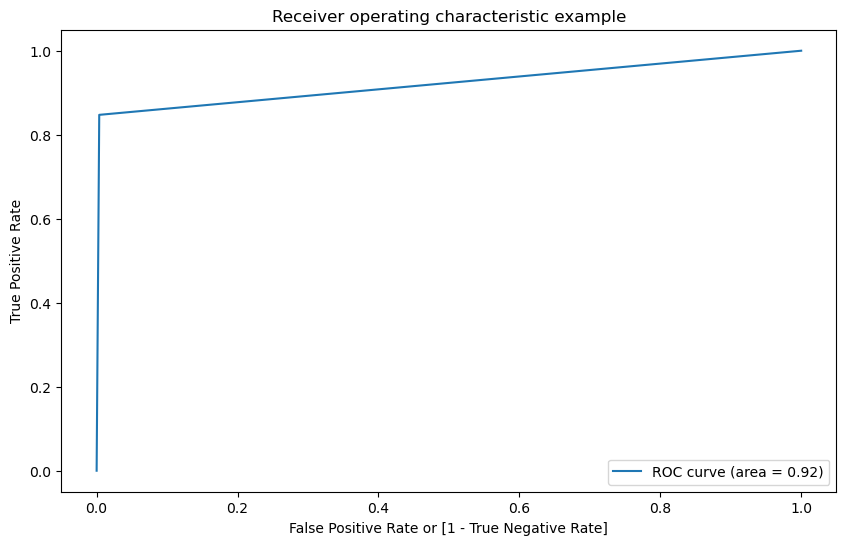


 Confussion Matrix:
 [[550781   2043]
 [   442   2453]]


In [276]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_smt)))
pred_probs_test = dt_smt_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_dt_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_smt))

- AUC score defines the goodness of the model. AUC can be classed as follows,
  - 0.90 - 1.00 = excellent
  - 0.80 - 0.90 = good
  - 0.70 - 0.80 = fair
  - 0.60 - 0.70 = poor
  - 0.50 - 0.60 = fail
- Observation:
  - We got a value of 0.92, our model seems to be doing execellent on the test dataset.

In [277]:
confusion_dt_smt = metrics.confusion_matrix( y_test, y_test_pred_dt_smt)

TN = confusion_dt_smt[0,0] # true positive
TP = confusion_dt_smt[1,1] # true negatives
FP = confusion_dt_smt[0,1] # false positives
FN = confusion_dt_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  84.7%
Specificity:  99.6%
False postive rate: 0.4%
Positive predictive value: 54.6%
Negative predictive value: 99.9%


**Default Hyperparameters for ADASYN data**

In [278]:
# Lets import decision tree libraries
from sklearn.tree import DecisionTreeClassifier

# Lets create a decision tree with the default hyper parameters for ADASYN Data
dt_ada_default = DecisionTreeClassifier(random_state=42)

**Fitting the decision tree with default hyperparameters**

In [279]:
# Lets fit the decision tree with default hyperparameters
dt_ada_default.fit(X_resampled_ada, y_resampled_ada)

DecisionTreeClassifier(random_state=42)

In [280]:
y_train_pred_dt_ada = dt_ada_default.predict(X_resampled_ada)
y_test_pred_dt_ada = dt_ada_default.predict(X_test)

In [281]:
print(classification_report(y_resampled_ada, y_train_pred_dt_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1290879

    accuracy                           1.00   2580798
   macro avg       1.00      1.00      1.00   2580798
weighted avg       1.00      1.00      1.00   2580798



**Making predictions on the test set**

Accuracy:  99.6%
F1 score:  67.0%
Recall:  83.6%
Precision:  55.9%
ROC for the test dataset: 91.6%

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.56      0.84      0.67      2895

    accuracy                           1.00    555719
   macro avg       0.78      0.92      0.83    555719
weighted avg       1.00      1.00      1.00    555719



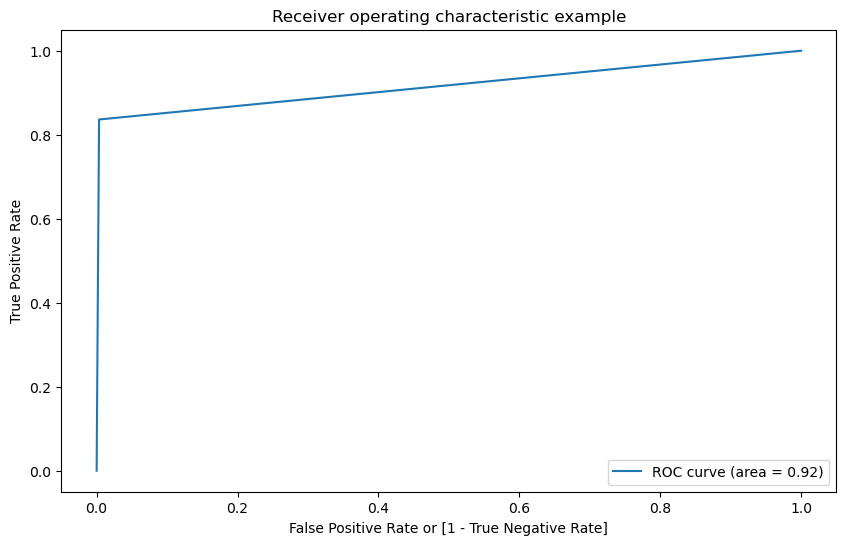


 Confussion Matrix:
 [[550916   1908]
 [   474   2421]]


In [282]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_ada)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_ada)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_ada)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_ada)))
pred_probs_test = dt_ada_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_dt_ada))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_ada))

Observation:
- We got a value of 0.92, our model seems to be doing excellent on the test dataset.

In [283]:
confusion_dt_ada = confusion_matrix( y_test, y_test_pred_dt_ada)

TN = confusion_dt_ada[0,0] # true positive
TP = confusion_dt_ada[1,1] # true negatives
FP = confusion_dt_ada[0,1] # false positives
FN = confusion_dt_ada[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  83.6%
Specificity:  99.7%
False postive rate: 0.3%
Positive predictive value: 55.9%
Negative predictive value: 99.9%


**Observation: From Decision Tree (Default Hyperparameters)**

###   Clasification Report for Decision Tree on Test data on default Hyperparameter
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|--------  
            SMOTE data      54.6  |    84.7     |   66.4     |   99.6     |    92.2  |   99.6       |         0.4  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|---------
            ADASYN data     55.9  |    83.6     |   67.0     |   99.6     |    91.6  |   99.7       |         0.3  |   99.9

**Hyper-parameter tuning**
- We can see from the Decision Tree for SMOTE data as the recall in SMOTE is 84.7 which is higher than ADASYN and also precision and F1, Roc values are also higher in SMOTE , so for hypertunning we have choosen SMOTE data for further analysis.

In [284]:
dt = DecisionTreeClassifier(random_state=42)

In [285]:
params = {
    'max_depth': [5,10,20],
    'min_samples_leaf': [5,10,20],
    'min_samples_split': [5,10,20],
     }

In [286]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           verbose=1,
                            cv=4,
                            n_jobs=-1,
                            scoring="recall")

In [287]:
%%time
grid_search.fit(X_resampled_ada, y_resampled_ada)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
CPU times: user 55.7 s, sys: 1.84 s, total: 57.5 s
Wall time: 15min 43s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20]},
             scoring='recall', verbose=1)

In [288]:
score_dt = pd.DataFrame(grid_search.cv_results_)
score_dt.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      34.887077      1.582801         0.929304        0.144500   
1      34.628079      1.603365         0.986637        0.111544   
2      29.434630      0.753116         0.725812        0.053191   
3      29.831259      0.921147         0.961529        0.397668   
4      27.962030      0.717253         0.778639        0.085741   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                      5                       5   
1               5                      5                      10   
2               5                      5                      20   
3               5                     10                       5   
4               5                     10                      10   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 5, 'min_s...           0.931346   
1  {'max_depth': 5, 'min_samples_leaf': 5, 'min_s...           0.931346   
2  {'max_depth': 5, 'min_samples_leaf': 5, 'min_s...           0.931346   
3  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...           0.931346   
4  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...           0.931346   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.908518           0.925898           0.933915         0.924919   
1           0.908518           0.925898           0.933915         0.924919   
2           0.908518           0.925898           0.933915         0.924919   
3           0.908518           0.925898           0.933915         0.924919   
4           0.908518           0.925898           0.933915         0.924919   

   std_test_score  rank_test_score  
0        0.009902               19  
1        0.009902               19  
2        0.009902               19  
3        0.009902               19  
4        0.009902               19

In [289]:
grid_search.best_score_

0.982149371918423

**Grid_search.best_estimator_ :**
- When the grid search is called with various params, it chooses the one with the highest score based on the given scorer function.
- Best estimator gives the information of the params that resulted in the highest score or in simple term Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.
- Since we have selected recall for our scoring, So Grid search best estimator will provide us the best estimator which will give us the information of the params that resulted in the highest `Recall` score.
- We have selected recall for scoring as our buisness requirement is to identify almost all customers who are likely to churn. High recall means model will correctly identify almost all customers who are likely to churn.

In [290]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

Observation:
- Based on the Grid Search Hyperparameter tuning method, we identified the best parameters for the Decision Tree from Grid search best estimator as -  max_depth=20, min_samples_leaf=5, min_samples_split=5, random_state=42.
- From these parameters helps us to determines (max_depth) helps us to limit the max number of levels in each decision tree to 20, (min_samples_leaf) helps us to find min number of data points allowed in a leaf node to 5, (min_samples_split) helps us to find minimum number of data points a node must contain in order to consider splitting i.e. to 5   
- By applying these parameters and tuning the model, we will able to improve the metrics that we received from the default parametes of Decision Tree.

In [291]:
y_train_pred_dt_hp_ada = dt_best.predict(X_resampled_ada)
y_test_pred_dt_hp_ada = dt_best.predict(X_test)

In [292]:
print(classification_report(y_resampled_ada, y_train_pred_dt_hp_ada))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1289919
           1       0.99      1.00      0.99   1290879

    accuracy                           0.99   2580798
   macro avg       0.99      0.99      0.99   2580798
weighted avg       0.99      0.99      0.99   2580798



**Making predictions on the test set**

Accuracy:  99.1%
F1 score:  51.2%
Recall:  87.4%
Precision:  36.3%
ROC for the test dataset: 94.7%

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    552824
           1       0.36      0.87      0.51      2895

    accuracy                           0.99    555719
   macro avg       0.68      0.93      0.75    555719
weighted avg       1.00      0.99      0.99    555719



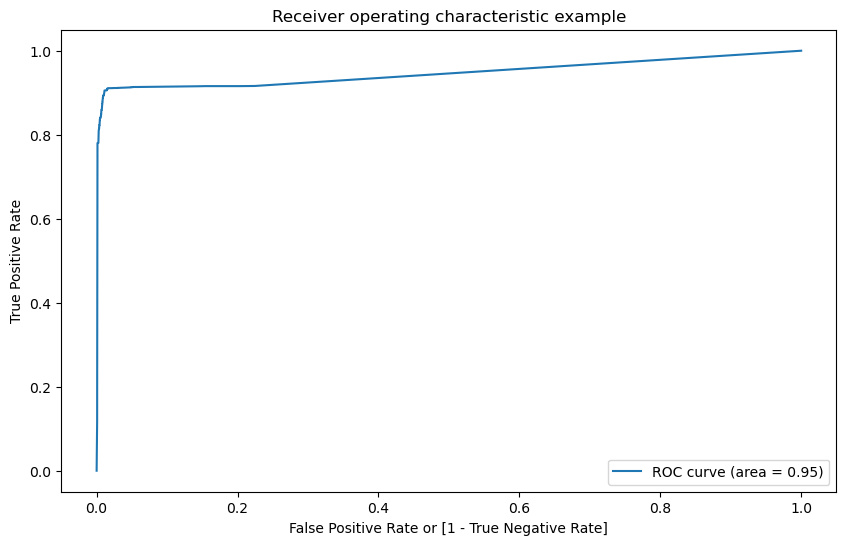


 Confussion Matrix:
 [[548377   4447]
 [   366   2529]]


In [293]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_hp_ada)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_hp_ada)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_hp_ada)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_hp_ada)))
pred_probs_test = dt_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_dt_hp_ada))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_hp_ada))

Observation:
- Since we got a value of 0.95, our model seems to be doing execellent on the test dataset.

In [294]:
confusion_dt_hp_smt = metrics.confusion_matrix( y_test, y_test_pred_dt_hp_ada)

TN = confusion_dt_hp_smt[0,0] # true positive
TP = confusion_dt_hp_smt[1,1] # true negatives
FP = confusion_dt_hp_smt[0,1] # false positives
FN = confusion_dt_hp_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  87.4%
Specificity:  99.2%
False postive rate: 0.8%
Positive predictive value: 36.3%
Negative predictive value: 99.9%


In [295]:
dt_best.feature_importances_

array([2.25312295e-03, 3.00987546e-01, 2.00415759e-03, 3.07739601e-03,
       1.59084144e-03, 2.29959077e-03, 2.43925531e-03, 7.88263838e-03,
       2.35025301e-03, 4.93097765e-03, 2.24469249e-02, 8.58389792e-04,
       8.05438217e-03, 1.14379741e-03, 7.07881281e-03, 1.84139927e-02,
       2.95182464e-03, 5.06818382e-01, 5.36506003e-03, 8.31060667e-03,
       4.79497157e-03, 1.23961171e-02, 2.81566174e-03, 3.72658814e-03,
       3.26697488e-03, 1.01511938e-02, 1.30484126e-02, 2.60923531e-03,
       9.89125721e-03, 1.17202860e-02, 7.13426676e-03, 2.06244186e-03,
       3.70450659e-04, 2.99746412e-04, 8.08922517e-04, 1.60885930e-04,
       2.00925999e-04, 1.88191718e-04, 2.76399595e-04, 5.20699481e-05,
       1.43270178e-04, 1.75359913e-04, 1.76353533e-04, 1.71880616e-04,
       2.91937393e-04, 5.10898619e-04, 1.94222408e-04, 1.56727650e-04,
       2.48421008e-04, 6.97976723e-04])

In [296]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_ada.columns,
    "Imp": dt_best.feature_importances_
})

In [297]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

Varname       Imp
17  hist_trans_avg_amt_24h  0.506818
1                      amt  0.300988
10              trans_Hour  0.022447
15          hist_trans_24h  0.018414
26           catg_misc_pos  0.013048
21        catg_grocery_pos  0.012396
29       catg_shopping_pos  0.011720
25           catg_misc_net  0.010151
28       catg_shopping_net  0.009891
19      catg_gas_transport  0.008311

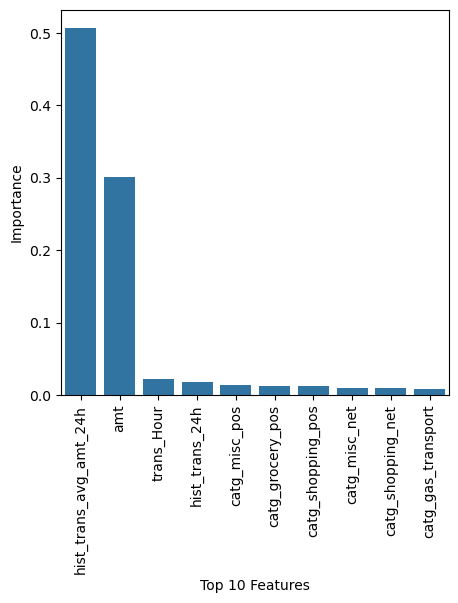

In [298]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

**Decision Tree (Hyperparameter Tuning using ADASYN data)**

###   Clasification Report for Decision Tree on Test data on SMOTE Hyperparameter Tunning
                     
                  precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
     Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    |predictive value
     -------------------------|-------------|------------|------------|----------|--------------|--------------|----------------  
        ADASYN data      36.3  |    87.4     |   51.2     |   99.1    |    94.7  |   99.2       |    0.8       |  99.9
    --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------


## 7.2. Model 2: Random Forest

**Default Hyperparameters for SMOTE data**

In [299]:
# Lets import Random Forest libraries
from sklearn.ensemble import RandomForestClassifier

# Lets create a Random Forest with the default hyper parameters for SMOTE Data
rf_smt_default = RandomForestClassifier(random_state=100, oob_score=True)

**Fitting the Random Forest with default hyperparameters**

In [300]:
# Lets fit the Random Forest with default hyperparameters
rf_smt_default.fit(X_resampled_smt, y_resampled_smt)

RandomForestClassifier(oob_score=True, random_state=100)

In [301]:
rf_smt_default.oob_score_

0.9995100467548738

In [302]:
y_train_pred_rf_smt = rf_smt_default.predict(X_resampled_smt)
y_test_pred_rf_smt = rf_smt_default.predict(X_test)

In [303]:
print(classification_report(y_resampled_smt, y_train_pred_rf_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



**Making predictions on the test set**

Accuracy:  99.8%
F1 score:  84.2%
Recall:  79.7%
Precision:  89.3%
ROC for the test dataset: 99.5%

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.89      0.80      0.84      2895

    accuracy                           1.00    555719
   macro avg       0.95      0.90      0.92    555719
weighted avg       1.00      1.00      1.00    555719



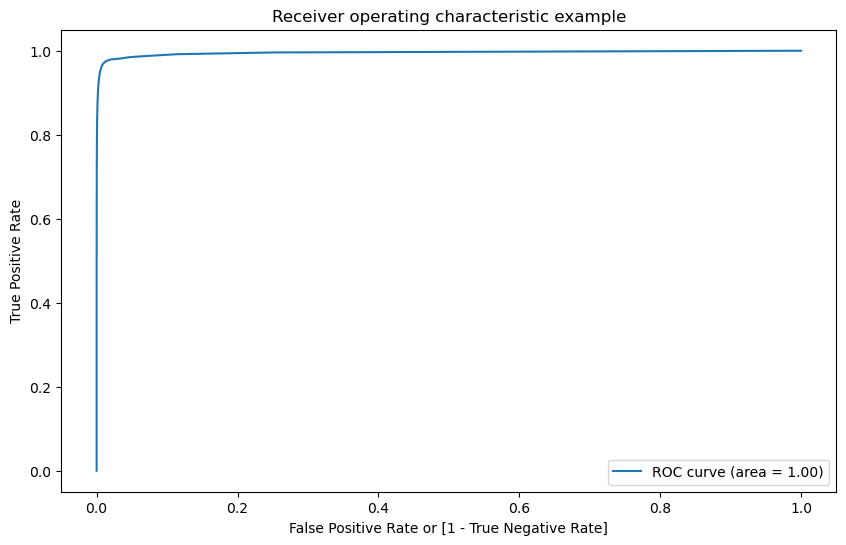


 Confussion Matrix:
 [[552547    277]
 [   587   2308]]


In [304]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_smt)))
pred_probs_test = rf_smt_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_rf_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_smt))

Observation:
- Since we got a value of 0.99, our model seems to be doing excellent on the test dataset.

In [305]:
confusion_rf_smt = confusion_matrix( y_test, y_test_pred_rf_smt)

TN = confusion_rf_smt[0,0] # true positive
TP = confusion_rf_smt[1,1] # true negatives
FP = confusion_rf_smt[0,1] # false positives
FN = confusion_rf_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  79.7%
Specificity:  99.9%
False postive rate: 0.1%
Positive predictive value: 89.3%
Negative predictive value: 99.9%


**Default Hyperparameters for ADASYN data**

In [306]:
# Lets import Random Forest libraries
from sklearn.ensemble import RandomForestClassifier

# Lets create a Random Forest with the default hyper parameters for ADASYN Data
rf_ada_default = RandomForestClassifier(random_state=100, oob_score=True)

**Fitting the Random Forest with default hyperparameters**

In [307]:
# Lets fit the Random Forest with default hyperparameters
rf_ada_default.fit(X_resampled_ada, y_resampled_ada)

RandomForestClassifier(oob_score=True, random_state=100)

In [308]:
rf_ada_default.oob_score_

0.9994904676770519

In [309]:
y_train_pred_rf_ada = rf_ada_default.predict(X_resampled_ada)
y_test_pred_rf_ada = rf_ada_default.predict(X_test)

In [310]:
print(classification_report(y_resampled_ada, y_train_pred_rf_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1290879

    accuracy                           1.00   2580798
   macro avg       1.00      1.00      1.00   2580798
weighted avg       1.00      1.00      1.00   2580798



**Making predictions on the test set**

Accuracy:  99.8%
F1 score:  83.9%
Recall:  78.3%
Precision:  90.5%
ROC for the test dataset: 99.6%

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.90      0.78      0.84      2895

    accuracy                           1.00    555719
   macro avg       0.95      0.89      0.92    555719
weighted avg       1.00      1.00      1.00    555719



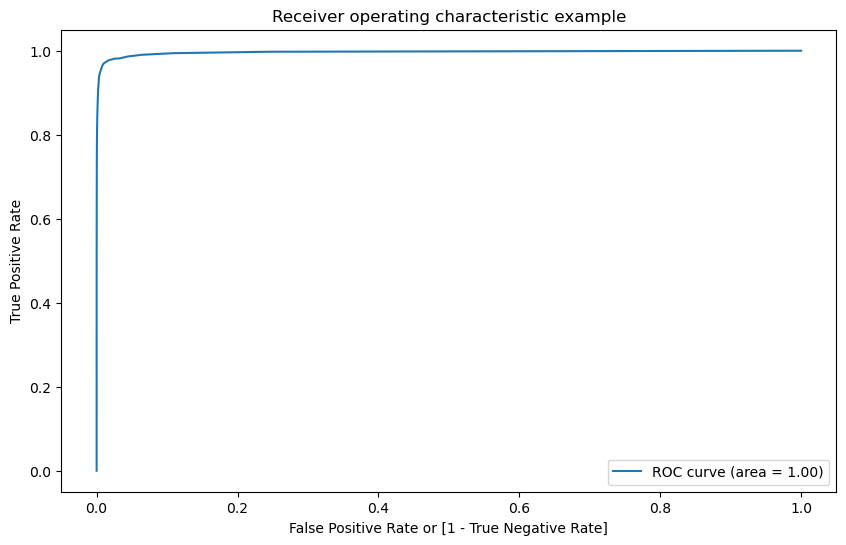


 Confussion Matrix:
 [[552585    239]
 [   628   2267]]


In [311]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_ada)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_ada)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_ada)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_ada)))
pred_probs_test = rf_ada_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_rf_ada))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_ada))

Observation:
- Since we got a value of 0.99, our model seems to be doing excellent on the test dataset.

In [312]:
confusion_rf_ada = confusion_matrix( y_test, y_test_pred_rf_ada)

TN = confusion_rf_ada[0,0] # true positive
TP = confusion_rf_ada[1,1] # true negatives
FP = confusion_rf_ada[0,1] # false positives
FN = confusion_rf_ada[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  78.3%
Specificity:  100.0%
False postive rate: 0.0%
Positive predictive value: 90.5%
Negative predictive value: 99.9%


**Observation: From Random Forest (Default Hyperparameters)**

###   Clasification Report for Random forest on Test data on default Hyperparameter

                   precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
    (Positive predictive value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
      -------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------  
         SMOTE data      89.3  |    79.7     |   84.2     |   99.8     |    99.5  |   99.9       |         0.1  |    99.9
       ------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
         ADASYN data     90.5  |    78.3     |   83.9     |   99.8     |    99.6  |   100        |         0.0  |      99.9

**Hyper-parameter tuning**

**For the Random Forest for SMOTE data**

In [313]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [314]:
params = {
    'max_depth': [10,20],
    'min_samples_leaf': [5,10],
    'n_estimators': [5,10],
    'min_samples_split': [5,10],
     }

In [315]:
from sklearn.model_selection import RandomizedSearchCV
Randomized_search = RandomizedSearchCV(estimator=rf,
                           param_distributions=params,
                           verbose=1,
                            cv=4,
                            return_train_score=True,
                            n_jobs=-1,
                            n_iter=50,
                            scoring="recall")

In [316]:
%%time
Randomized_search.fit(X_resampled_smt, y_resampled_smt)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
CPU times: user 1min 47s, sys: 6.51 s, total: 1min 53s
Wall time: 1h 32min 42s


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [5, 10]},
                   return_train_score=True, scoring='recall', verbose=1)

In [317]:
score_rf = pd.DataFrame(Randomized_search.cv_results_)
score_rf.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     333.119485      0.356952         1.158375        0.191036   
1     339.256589      0.086839         2.264671        0.083287   
2     347.310908      0.433129         1.225075        0.097357   
3     355.412038      0.307551         2.693446        0.256202   
4     346.300937      0.655975         1.342353        0.229083   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                  5                       5                      5   
1                 10                       5                      5   
2                  5                      10                      5   
3                 10                      10                      5   
4                  5                       5                     10   

  param_max_depth                                             params  \
0              10  {'n_estimators': 5, 'min_samples_split': 5, 'm...   
1              10  {'n_estimators': 10, 'min_samples_split': 5, '...   
2              10  {'n_estimators': 5, 'min_samples_split': 10, '...   
3              10  {'n_estimators': 10, 'min_samples_split': 10, ...   
4              10  {'n_estimators': 5, 'min_samples_split': 5, 'm...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.956642           0.957821           0.954481           0.951349   
1           0.956633           0.956996           0.955414           0.954307   
2           0.956642           0.957821           0.954481           0.951349   
3           0.956633           0.956996           0.955414           0.954307   
4           0.958004           0.950778           0.952893           0.960661   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.955073        0.002461               15            0.957997   
1         0.955838        0.001060               11            0.957805   
2         0.955073        0.002461               15            0.957997   
3         0.955838        0.001060               11            0.957805   
4         0.955584        0.003936               13            0.959167   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.958231            0.954259            0.950796   
1            0.957240            0.955652            0.953613   
2            0.958231            0.954259            0.950796   
3            0.957240            0.955652            0.953613   
4            0.951012            0.952709            0.960230   

   mean_train_score  std_train_score  
0          0.955321         0.003051  
1          0.956077         0.001627  
2          0.955321         0.003051  
3          0.956077         0.001627  
4          0.955780         0.003983

In [318]:
Randomized_search.best_score_

0.9935344779578181

In [319]:
rf_best = Randomized_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=10, n_jobs=-1, random_state=42)

In [320]:
y_train_pred_rf_hp_smt = rf_best.predict(X_resampled_smt)
y_test_pred_rf_hp_smt = rf_best.predict(X_test)

In [321]:
print(classification_report(y_resampled_smt, y_train_pred_rf_hp_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



**Making predictions on the test set**

Accuracy:  99.6%
F1 score:  68.2%
Recall:  84.7%
Precision:  57.1%
ROC for the test dataset: 99.0%

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.57      0.85      0.68      2895

    accuracy                           1.00    555719
   macro avg       0.79      0.92      0.84    555719
weighted avg       1.00      1.00      1.00    555719



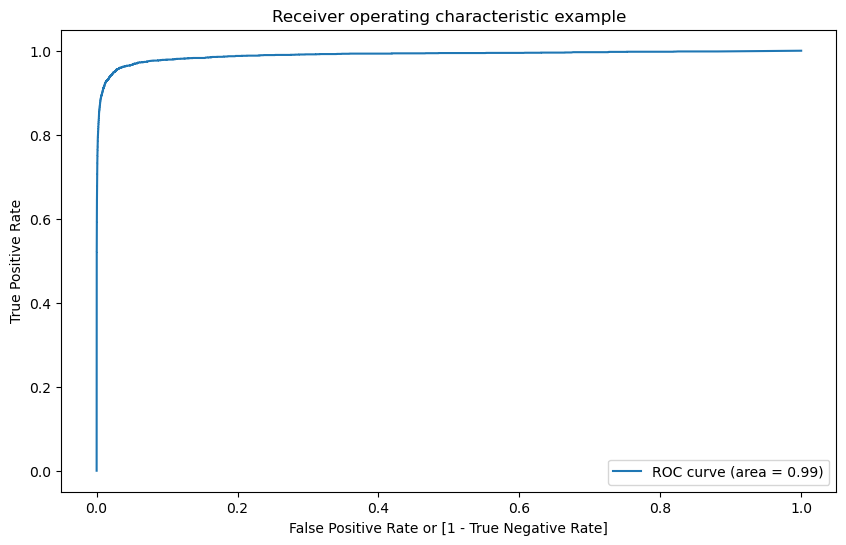


 Confussion Matrix:
 [[550983   1841]
 [   442   2453]]


In [322]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_hp_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_hp_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_hp_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_hp_smt)))
pred_probs_test = rf_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_rf_hp_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_hp_smt))

Observation:
- Since we got a value of 0.99, our model seems to be doing excellent on the test dataset.

In [323]:
confusion_rf_hp_smt = confusion_matrix( y_test, y_test_pred_rf_hp_smt)

TN = confusion_rf_hp_smt[0,0] # true positive
TP = confusion_rf_hp_smt[1,1] # true negatives
FP = confusion_rf_hp_smt[0,1] # false positives
FN = confusion_rf_hp_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  84.7%
Specificity:  99.7%
False postive rate: 0.3%
Positive predictive value: 57.1%
Negative predictive value: 99.9%


In [324]:
rf_best.feature_importances_

array([2.15907848e-03, 2.84792460e-01, 3.78993316e-03, 4.09462011e-03,
       2.87549271e-03, 3.94864021e-03, 3.91728108e-03, 6.79034979e-03,
       3.21597251e-03, 4.53632541e-03, 5.18001601e-02, 1.66473616e-03,
       1.33503338e-02, 2.06800739e-03, 4.29747940e-02, 5.39342788e-02,
       6.14762788e-02, 3.12261600e-01, 4.47174748e-03, 2.67749317e-03,
       2.36180515e-03, 6.65833630e-03, 3.77706830e-03, 1.88069510e-02,
       1.12926296e-02, 2.54438802e-03, 6.72548943e-03, 3.56292990e-03,
       2.69327280e-03, 4.78746217e-03, 4.40990987e-03, 2.17372226e-03,
       1.53552791e-02, 4.48540962e-03, 8.59023597e-03, 2.69847584e-03,
       8.02178596e-03, 2.51470037e-03, 3.52171930e-04, 2.49037847e-04,
       4.99573847e-04, 3.18246797e-04, 9.62794621e-04, 9.42230633e-04,
       4.39302424e-04, 3.83158392e-04, 3.75055954e-04, 3.23498392e-04,
       1.06747110e-02, 6.22078311e-03])

In [325]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": rf_best.feature_importances_
})

In [326]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

Varname       Imp
17       hist_trans_avg_amt_24h  0.312262
1                           amt  0.284792
16       hist_trans_avg_amt_30d  0.061476
15               hist_trans_24h  0.053934
10                   trans_Hour  0.051800
14               hist_trans_30d  0.042975
23                    catg_home  0.018807
32               weekday_Monday  0.015355
12  time_since_prev_transaction  0.013350
24               catg_kids_pets  0.011293

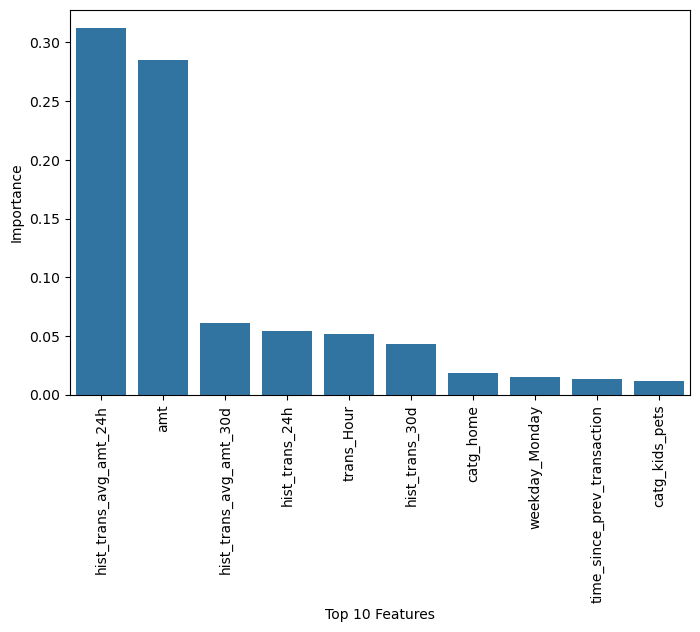

In [327]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

**Random Forest (Hyperparameters Tuning)**

###   Clasification Report for Random Forest on Test data on SMOTE Hyperparameter Tunning
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
            SMOTE data      57.1  |    84.7     |   68.2     |   99.6     |    99.0  |   99.7       |         0.3  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------

### 7.3. Model 3: Xgboost

**Default Hyperparameters for SMOTE data**

In [328]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
# Lets Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [329]:
# fit model on training data with default hyperparameters
model_xgb = XGBClassifier(random_state=100)

# Fitting the model on Train SMOTE data
model_xgb.fit(X_resampled_smt, y_resampled_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [330]:
y_train_pred_xgb = model_xgb.predict(X_resampled_smt)
y_test_pred_xgb = model_xgb.predict(X_test)

In [331]:
print(classification_report(y_resampled_smt, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



**Making predictions on the test set**

Accuracy:  99.8%
F1 score:  86.3%
Recall:  90.7%
Precision:  82.3%
ROC for the test dataset: 99.8%

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.82      0.91      0.86      2895

    accuracy                           1.00    555719
   macro avg       0.91      0.95      0.93    555719
weighted avg       1.00      1.00      1.00    555719



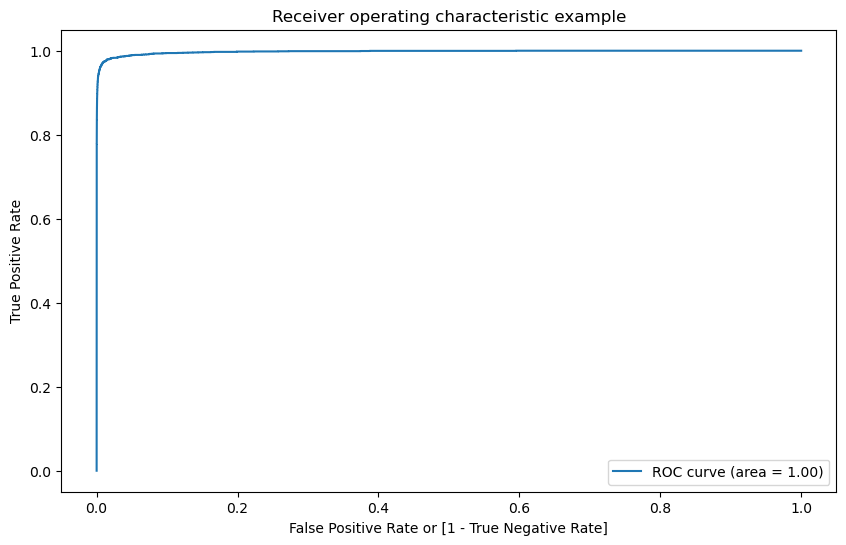


 Confussion Matrix:
 [[552258    566]
 [   269   2626]]


In [332]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb)))
pred_probs_test = model_xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_xgb))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb))

Observation:
- Since we got a value of 1, our model seems to be doing excellent on the test dataset.

In [333]:
confusion_xgb = confusion_matrix( y_test, y_test_pred_xgb)

TN = confusion_xgb[0,0] # true positive
TP = confusion_xgb[1,1] # true negatives
FP = confusion_xgb[0,1] # false positives
FN = confusion_xgb[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  90.7%
Specificity:  99.9%
False postive rate: 0.1%
Positive predictive value: 82.3%
Negative predictive value: 100.0%


**Default Hyperparameters for ADASYN data**

In [334]:
# Fitting the model on Train ADASYN data
model_xgb.fit(X_resampled_ada, y_resampled_ada)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [335]:
y_train_pred_xgb = model_xgb.predict(X_resampled_ada)
y_test_pred_xgb = model_xgb.predict(X_test)

In [336]:
print(classification_report(y_resampled_ada, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1290879

    accuracy                           1.00   2580798
   macro avg       1.00      1.00      1.00   2580798
weighted avg       1.00      1.00      1.00   2580798



**Making predictions on the test set**

Accuracy:  99.8%
F1 score:  84.6%
Recall:  89.9%
Precision:  79.8%
ROC for the test dataset: 99.7%

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.80      0.90      0.85      2895

    accuracy                           1.00    555719
   macro avg       0.90      0.95      0.92    555719
weighted avg       1.00      1.00      1.00    555719



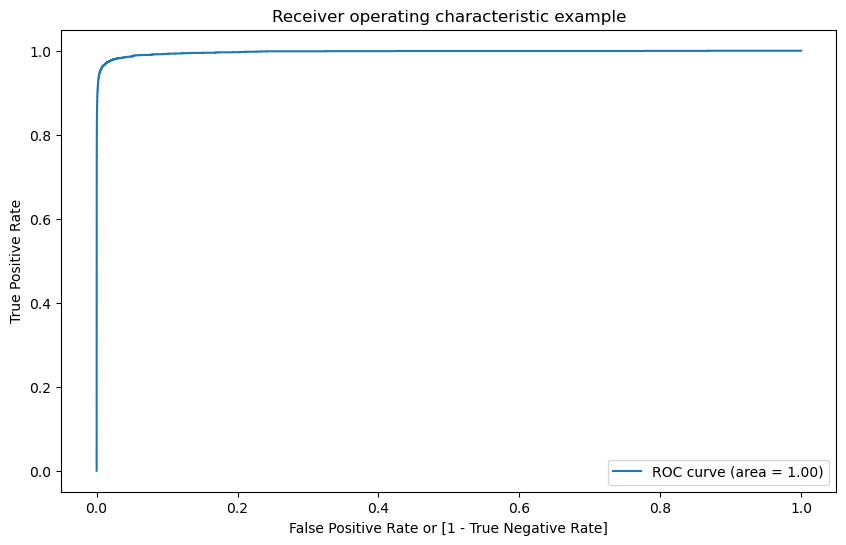


 Confussion Matrix:
 [[552164    660]
 [   291   2604]]


In [337]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb)))
pred_probs_test = model_xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_xgb))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb))

In [338]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_xgb).ravel()

In [339]:
print("tn",tn)
print("fp",fp)
print("fn",fn)
print("tp",tp)

tn 552164
fp 660
fn 291
tp 2604


Observation
- Since we got a value of 0.93, our model seems to be doing excellent on the test dataset.

In [340]:
confusion_xgb = confusion_matrix( y_test, y_test_pred_xgb)

TN = confusion_xgb[0,0] # true positive
TP = confusion_xgb[1,1] # true negatives
FP = confusion_xgb[0,1] # false positives
FN = confusion_xgb[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  89.9%
Specificity:  99.9%
False postive rate: 0.1%
Positive predictive value: 79.8%
Negative predictive value: 99.9%


###   Clasification Report for XGBoost on Test data on default Hyperparameter

                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
       (Positive predictive value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------------  
            SMOTE data      82.3  |    90.7     |   86.3     |   99.8     |    99.8  |   99.9       |         0.1  |    100.0
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
            ADASYN data     79.8  |    89.9     |   84.6     |   99.8     |    99.7  |   99.9       |         0.1  |     99.9

**Hyper-parameter tuning**

**The xgboost for SMOTE data(as SMOTE deafult XBGoost ig giving better results than ADASYN XGBoost)**

Let's now try tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

In [341]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9],
             'max_depth':[2, 5, 10],
             'n_estimators':[50,100]}


# specify model
xgb_model = XGBClassifier(objective='binary:logistic', random_state=100)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'recall',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)



In [342]:
# fit the model
model_cv.fit(X_resampled_smt, y_resampled_smt)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=100, ...),
             param_grid={'learning_rate': [0.2, 0.6], 'max_depth': [2, 5, 10],
                         'n_estimators': [50, 100],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='recall', verbose=1)

In [343]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.691492      0.091516         0.415500        0.026647   
1        3.593317      0.012448         0.395035        0.007658   
2        3.410469      0.150979         0.398597        0.042950   
3        5.249662      0.642280         0.443001        0.040695   
4        4.908573      0.052317         0.430468        0.037661   
5        4.673969      0.077582         0.415577        0.010194   
6        4.402601      0.334026         0.454245        0.039851   
7        4.087807      0.157082         0.455140        0.035580   
8        4.079324      0.024526         0.447019        0.039976   
9        6.560473      0.691143         0.531432        0.049583   
10       6.024203      0.028771         0.531064        0.043930   
11       6.170050      0.351115         0.550494        0.036115   
12       5.504752      0.097322         0.605422        0.038764   
13       5.417198      0.148758         0.596017        0.017629   
14       5.431388      0.167400         0.581607        0.060395   
15       8.520393      0.075601         0.825055        0.045505   
16       8.683364      0.077476         0.827776        0.039456   
17       8.397222      0.265309         0.793942        0.005411   
18       3.508667      0.147873         0.390208        0.052424   
19       3.489480      0.111945         0.409758        0.045868   
20       3.498456      0.050191         0.399855        0.037619   
21       4.650331      0.072546         0.391229        0.008774   
22       4.786579      0.150043         0.415647        0.043957   
23       4.686389      0.212134         0.414807        0.037547   
24       4.065714      0.072237         0.441858        0.034371   
25       4.081619      0.170417         0.405356        0.005522   
26       3.945382      0.144101         0.430134        0.043405   
27       6.031139      0.179105         0.516428        0.037375   
28       6.044171      0.035301         0.546929        0.036342   
29       5.984768      0.094771         0.509759        0.004976   
30       5.410975      0.074672         0.600052        0.036327   
31       5.374234      0.116661         0.598338        0.043721   
32       5.451361      0.106969         0.598343        0.032643   
33       8.682282      0.334975         0.861371        0.010326   
34       8.739032      0.207038         0.870166        0.042650   
35       8.430747      0.123486         0.868680        0.044266   

   param_learning_rate param_max_depth param_n_estimators param_subsample  \
0                  0.2               2                 50             0.3   
1                  0.2               2                 50             0.6   
2                  0.2               2                 50             0.9   
3                  0.2               2                100             0.3   
4                  0.2               2                100             0.6   
5                  0.2               2                100             0.9   
6                  0.2               5                 50             0.3   
7                  0.2               5                 50             0.6   
8                  0.2               5                 50             0.9   
9                  0.2               5                100             0.3   
10                 0.2               5                100             0.6   
11                 0.2               5                100             0.9   
12                 0.2              10                 50             0.3   
13                 0.2              10                 50             0.6   
14                 0.2              10                 50             0.9   
15                 0.2              10                100             0.3   
16                 0.2              10                100             0.6   
17                 0.2              10                100             0.9   
18                 0.6  

In [344]:
cv_results[cv_results['rank_test_score']==1]


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
17       8.397222      0.265309         0.793942        0.005411   

   param_learning_rate param_max_depth param_n_estimators param_subsample  \
17                 0.2              10                100             0.9   

                                               params  split0_test_score  \
17  {'learning_rate': 0.2, 'max_depth': 10, 'n_est...           0.998958   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
17           0.999977            0.99996         0.999632        0.000476   

    rank_test_score  split0_train_score  split1_train_score  \
17                1            0.999991            0.999969   

    split2_train_score  mean_train_score  std_train_score  
17            0.999976          0.999978         0.000009

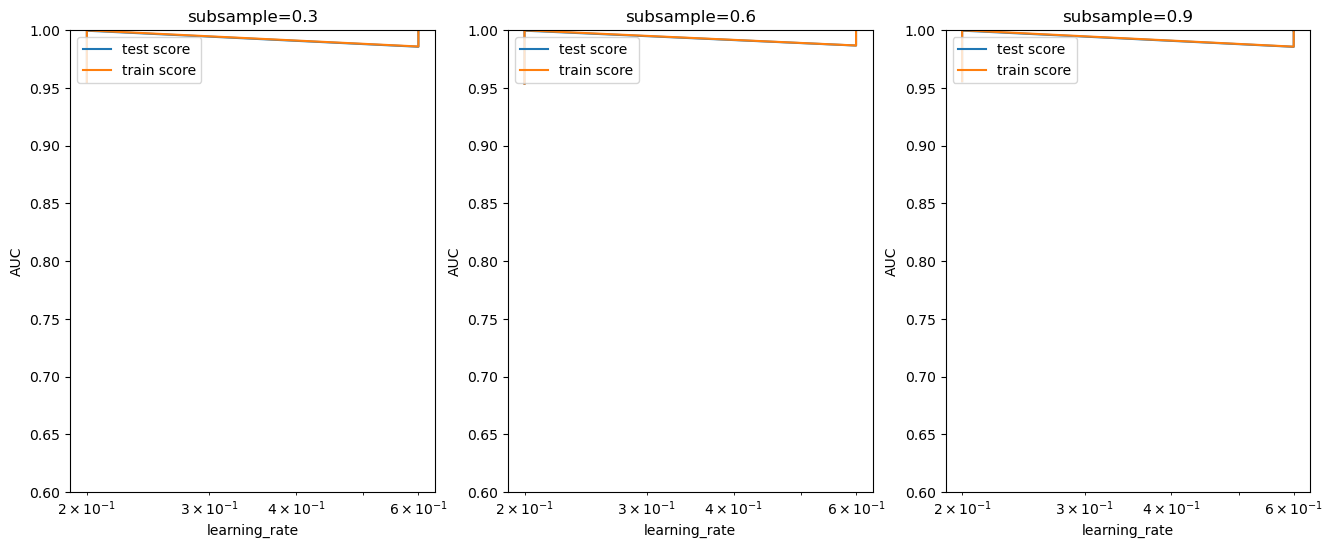

In [345]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.9 and learning_rate of about 0.2 seems optimal. Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters).

Let's build a final model with the chosen hyperparameters.

In [346]:
model_cv.best_score_

0.9996317598236789

In [347]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 10,
          'n_estimators':100,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model_xgb_new = XGBClassifier(params = params)
model_xgb_new.fit(X_resampled_smt, y_resampled_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 10,
                      'n_estimators': 100, 'objective': 'binary:logistic',
                      'subsample': 0.9}, ...)

In [348]:
y_train_pred_xgb_hp = model_xgb_new.predict(X_resampled_smt)
y_test_pred_xgb_hp = model_xgb_new.predict(X_test)

In [349]:
print(classification_report(y_resampled_smt, y_train_pred_xgb_hp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



**Making predictions on the test set**

Accuracy:  99.8%
F1 score:  86.3%
Recall:  90.7%
Precision:  82.3%
ROC for the test dataset: 99.8%

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.82      0.91      0.86      2895

    accuracy                           1.00    555719
   macro avg       0.91      0.95      0.93    555719
weighted avg       1.00      1.00      1.00    555719



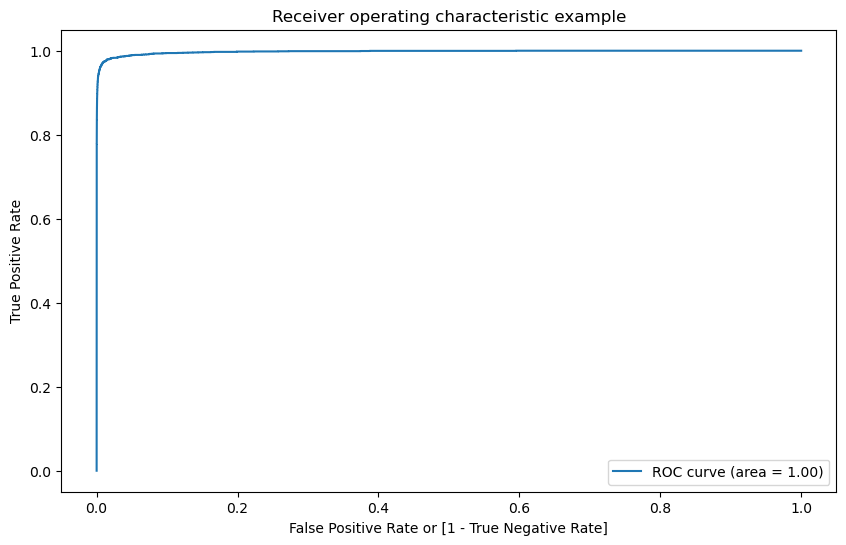


 Confussion Matrix:
 [[552258    566]
 [   269   2626]]


In [350]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb_hp)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb_hp)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb_hp)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb_hp)))
pred_probs_test = model_xgb_new.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_xgb_hp))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb_hp))

Observation:
- Since we got a value of 0.93, our model seems to be doing excellent on the test dataset.

In [351]:
confusion_xgb_hp = confusion_matrix( y_test, y_test_pred_xgb_hp)

TN = confusion_xgb_hp[0,0] # true positive
TP = confusion_xgb_hp[1,1] # true negatives
FP = confusion_xgb_hp[0,1] # false positives
FN = confusion_xgb_hp[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  90.7%
Specificity:  99.9%
False postive rate: 0.1%
Positive predictive value: 82.3%
Negative predictive value: 100.0%


Finally, let's also look at the feature importances.

In [352]:
model_xgb_new.feature_importances_

array([0.00125572, 0.0485384 , 0.00083555, 0.00142702, 0.00126911,
       0.00168503, 0.00148022, 0.00190961, 0.00129791, 0.00188516,
       0.00938204, 0.00082463, 0.00815891, 0.00062427, 0.00279071,
       0.01832816, 0.00118262, 0.18669452, 0.02470753, 0.05084519,
       0.02538627, 0.03653631, 0.02168838, 0.03892985, 0.02437641,
       0.02852184, 0.02975284, 0.02486598, 0.02911441, 0.03686074,
       0.02402015, 0.00526178, 0.03369072, 0.04739517, 0.03997117,
       0.04722185, 0.03716456, 0.02555933, 0.00426229, 0.00396796,
       0.00475079, 0.0059303 , 0.00463939, 0.0084378 , 0.00364869,
       0.00276933, 0.00700267, 0.00600619, 0.01864835, 0.00849632],
      dtype=float32)

In [353]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": model_xgb_new.feature_importances_
})

In [354]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

Varname       Imp
17  hist_trans_avg_amt_24h  0.186695
19      catg_gas_transport  0.050845
1                      amt  0.048538
33        weekday_Saturday  0.047395
35        weekday_Thursday  0.047222
34          weekday_Sunday  0.039971
23               catg_home  0.038930
36         weekday_Tuesday  0.037165
29       catg_shopping_pos  0.036861
21        catg_grocery_pos  0.036536

**Hyper-parameter tuning of xgboost for ADASYN data**

###   Clasification Report for XGBoost on Test data on SMOTE Hyperparameter Tunning
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|--------  
           SMOTE  data      82.3  |    90.7     |   86.3     |   99.8     |    99.8  |   99.9       |         0.1  |  100.0
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|---------
          

###   Clasification Report for XGBoost on Test data on default Hyperparameter

                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
       (Positive predictive value)|(sensitivity)|            |            |          |              |  rate (%)    |predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------------  
            SMOTE data      82.3  |    90.7     |   86.3     |   99.8     |    99.8  |   99.9       |         0.1  |    100.0
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
            ADASYN data     79.8  |    89.9     |   84.6     |   99.8     |    99.7  |   99.9       |         0.1  |     99.9

### 7.4. Conclusion of the Modeling

### Compilation of models For Test data (Target 1)

###   Clasification Report for Decision Tree on Test data on default Hyperparameter
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|--------  
            SMOTE data      54.6  |    84.7     |   66.4     |   99.6     |    92.2  |   99.6       |         0.4  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|---------
            ADASYN data     55.9  |    83.6     |   67.0     |   99.6     |    91.6  |   99.7       |         0.3  |   99.9
    
###   Clasification Report for Decision Tree on Test data on SMOTE Hyperparameter Tunning
                     
                  precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
     Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    |predictive value
     -------------------------|-------------|------------|------------|----------|--------------|--------------|----------------  
        SMOTE data      36.3  |    87.4    |   51.2      |   99.1     |    94.7  |   99.2       |         0.8  |  99.9
    --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###   2. Clasification Report for Random forest on Test data on default Hyperparameter

                   precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
    (Positive predictive value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
      -------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------  
         SMOTE data      89.3  |    79.7     |   84.2     |   99.8     |    99.5  |   99.9       |         0.1  |    99.9
       ------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
         ADASYN data     90.5  |    78.3     |   83.9     |   99.8     |    99.6  |   100        |         0.0  |      99.9


###   Clasification Report for Random Forest on Test data on SMOTE Hyperparameter Tunning
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
            SMOTE data      57.1  |    84.7     |   68.2     |   99.6     |    99.0  |   99.7       |         0.3  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------       
### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###   3. Clasification Report for XGBoost on Test data on default Hyperparameter

                  precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
                   (pp  value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive V
     -------------------------|-------------|------------|------------|----------|--------------|--------------|--------  
        SMOTE data      82.3  |    90.7     |   86.3     |   99.8     |    99.8  |   99.9       |         0.1  |     100.0
    --------------------------|-------------|------------|------------|----------|--------------|--------------|---------------
        ADASYN data     79.8  |    89.9     |   84.6     |   99.8     |    99.7  |   99.9       |         0.1  |      99.9

###   Clasification Report for XGBoost on Test data on SMOTE Hyperparameter Tunning
                     
           precision(%)      |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |-ve (%)
         +ve predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive               -------------------------|-------------|------------|------------|----------|--------------|--------------|------------
      SMOTE  data      82.3  |    90.7     |   86.3     |   99.8     |    99.8  |   99.9       |         0.1  |  100.0
          -------------------|-------------|------------|------------|----------|--------------|--------------|-------
          

### From the above Compilation of models, it is clear that XGBoost (default hyperparameter tuning using SMOTE data and Tuned using SMOTE data both )is the best model from 3 models i.e
    
     Model 1: Decision Tree  (Default Hyperparameters)
             Decision Tree  (Hyperparameter Tuning)
     Model 2: Random Forest (Default Hyperparameters)
             Random Forest (Hyperparameters Tuning)
     Model 3: XGBoost (Default Hyperparameters)
             XGBoost (Hyperparameters Tuning)


    
### Model Consideration:-
    
- Based on the accuracy, ROC and recall of different models, we will XGBoost on default hyperparameter tuning using ADASYN data as our final model.
- The test accuracy is 99.8%, recall is 90% and ROC is 99.7% .
- The recall for is_fraud is 90%, which is highest among all other models. <b>Since our buisness objective is more important to fraud transactions than the no_fraud transactions accurately. High recall means model will correctly identify almost all customers who are likely to churn.</b>
- Hence `XGBoost on default hyperparameter on ADASYN data ` model is chosen based on its performance on `Recall metric`.

## Step 8: Final Conclusion on basis of Best Model (XGBoost)

In [355]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

Varname       Imp
17  hist_trans_avg_amt_24h  0.186695
19      catg_gas_transport  0.050845
1                      amt  0.048538
33        weekday_Saturday  0.047395
35        weekday_Thursday  0.047222
34          weekday_Sunday  0.039971
23               catg_home  0.038930
36         weekday_Tuesday  0.037165
29       catg_shopping_pos  0.036861
21        catg_grocery_pos  0.036536

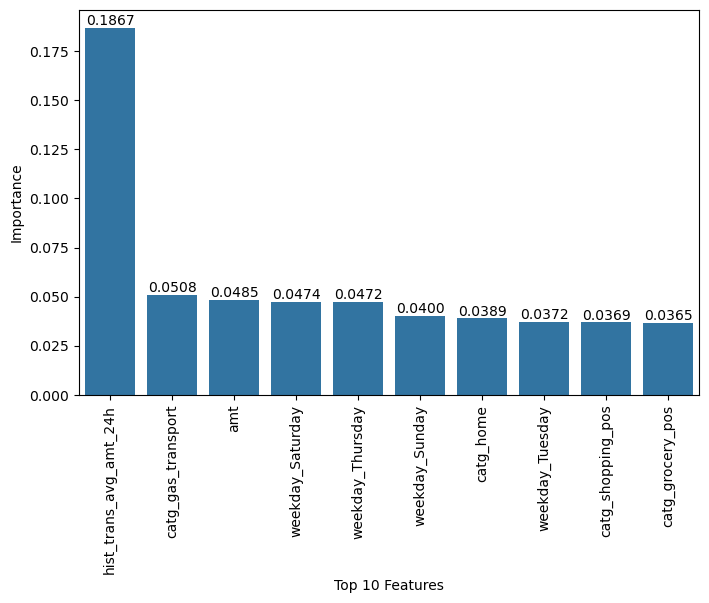

In [356]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
for container in ax.containers:
    ax.bar_label(container, fmt = '%.4f', label_type='edge')
plt.xticks(rotation=90)
plt.show()

#### FINALIZED MODEL: STATS of XGBoost Hyper-parameter tunnig using SMOTE data

| Metrics     | test    |
| ----------- | ------  |
|RECALL       |  90.7   |
|PRECISION    |  82.3   |
|ACCURACY     |  99.8   |
|F1- SCORE    |  86.3   |
|SPECIFICITY  |  99.9   |

Based on our XGBoost (Hyperparameters Tuning using SMOTE data) model, some features are identified which contribute most to a customer getting churned.
   
    hist_trans_avg_amt_24h----------0.1867
    weekday_Thursday----------------0.0508
    amt-----------------------------0.0485
    weekday_Saturday----------------0.0474
    catg_home-----------------------0.0472
    catg_shopping_pos---------------0.0400
    weekday_Monday------------------0.0389
    catg_grocery_pos----------------0.0372
    catg_health_fitness-------------0.0369
    catg_gas_transport--------------0.0365

### 8.1. XGBoost hyper-parameter tunning using SMOTE data on train data set

In [357]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 20,
          'n_estimators':50,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgboost_best = XGBClassifier(params = params)
xgboost_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 50,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

In [358]:
pred_train = xgboost_best.predict(X_train)

In [359]:
print('\n Confussion Matrix:\n', confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))


 Confussion Matrix:
 [[1289914       5]
 [     69    6687]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      0.99      0.99      6756

    accuracy                           1.00   1296675
   macro avg       1.00      0.99      1.00   1296675
weighted avg       1.00      1.00      1.00   1296675



### 8.2. Cost Benefit Anlayis based on model (PART 2)

### `XGBoost on default hyperparameter on SMOTE data  on test data`
<div class="alert alert-block alert-success">
    
    Confussion Matrix of XGBoost on default hyperparameter on SMOTE data:
     Confussion Matrix:
     [[552258     566]
     [   269    2626]]

In [360]:
print ('\n Confussion Matrix :\n',confusion_matrix(y_test, y_test_pred_xgb_hp))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_xgb_hp).ravel()

print("True Negative:",tn)
print("False Positive:",fp)
print("False Negative:",fn)
print("True Positive:",tp)


 Confussion Matrix :
 [[552258    566]
 [   269   2626]]
True Negative: 552258
False Positive: 566
False Negative: 269
True Positive: 2626


### `XGBoost on default hyperparameter on SMOTE data  on train data`
<div class="alert alert-block alert-success">
    
    Confussion Matrix of XGBoost on default hyperparameter on SMOTE data:
     Confussion Matrix:
     [[1289914     5]
     [     69    6687]]


In [361]:
train_confusion_xgb_hp= confusion_matrix(y_train, pred_train)

TN = train_confusion_xgb_hp[0,0] # true negatives
TP = train_confusion_xgb_hp[1,1] # true positives
FP = train_confusion_xgb_hp[0,1] # false positives
FN = train_confusion_xgb_hp[1,0] # false negatives

print('True_Negatives for train data:', TN)
print('True_Positives for train data:', TP)
print('False_Positives for train data:', FP)
print('False_Negatives for train data:', FN)

True_Negatives for train data: 1289914
True_Positives for train data: 6687
False_Positives for train data: 5
False_Negatives for train data: 69


In [362]:
# Average number of transactions per month detected as fraudulent by the model (TF)= TP+FP/24

(2626+556+6687+5)/24

411.4166666666667

In [363]:
# Total cost of providing customer support per month for fraudulent transactions detected by the model(TF*$1.5)

411.4166666666667*1.5

617.125

In [364]:
# Average number of transactions per month that are fraudulent but not detected by the model (FN)

(269+69)/24

14.083333333333334

In [365]:
# Cost incurred due to fraudulent transactions left undetected by the model (FN*c). c=530.66

14.083333333333334*530.66

7473.461666666666

In [366]:
# Cost incurred per month after the model is built and deployed (4+6)

617.125+7473.461666666666

8090.586666666666

In [367]:
# Final savings = Cost incurred before - Cost incurred after(1-7)	204161.28
213391.6525-8090.586666666666

205301.06583333333

In [368]:
# Cost incurred per month before the model was deployed (b*c)

402.125*530.66

213391.6525

###                           Cost Benefit Analysis(Part 2)
                          Questions                                                                          Answer
    1. Cost incurred per month before the model was deployed (2*3 of part1)----------------------------------213391.6525
    2. Average number of transactions per month detected as fraudulent by the model (TF)---------------------411.0
    3. Cost of providing customer executive support per fraudulent transaction detected by the model---------1.5
    4. Total cost of providing customer support per month for fraudulent transactions
        detected by the model(TF*$1.5) ----------------------------------------------------------------------617.125  
    5. Average number of transactions per month that are fraudulent but not detected by the model (FN)-------14.0
    6. Cost incurred due to fraudulent transactions left undetected by the model (FN*3rd of part 1)----------7473.4616
    7. Cost incurred per month after the model is built and deployed (4+6)-----------------------------------8090.5866
    8. Final savings = Cost incurred before - Cost incurred after(1-7)---------------------------------------205301.0658


## Step 9: Conclusion , Business Insights and Recommendation of strategies to manage fraud transaction based on our observations.

### Conclusion :   
    
           Before Cost incurred/month by the bank== $ 213391.6525
             
           Now Cost incurred/month by bank after my modelling ==$ 8090.5866 only
             
### Actual Saving done by bank after my modelling == $ 205301.0658 and hence 95.67% of darastic decrease in amount paid by the bank to the customer for their loss by fraud transactions after modelling rather than earlier (before modelling).

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Business Insights and Recommendation of strategies:

1. The fraudulent transaction probability of a transaction increases with increase in `hist_trans_avg_amt_24h` values. Based upon past spending pattern we have derived`hist_trans_avg_amt_24h` which is actually average amount spent through transactions in last 24 hours by the credit card holder's. So if comparable amount spent in last 24hrs v/s past spent data gets increased then its ideal for Bank to sent an SMS ALERT! to customer confirming about the transactions.
    
2. The fraudulent transaction probability of a transaction increases with increase in `weekday_Thursday`, `weekday_Saturday` and `weekday_Monday` values. As per the pattern model shows that major fraud transactions are noticed in `weekday_Thursday`, `weekday_Saturday` and `weekday_Monday`. So banks need to be extra cautious and high alert on this specific days to avoid fradulent transactions

3. The fraudulent transaction probability of a customer increases with increase in `amt` values. At any point in time if bank notices the nature of amount spent is higher then regular spending pattern in such cases bank should noticed the same at early stage by sending neccessary alerts to customers.
   
4. The fraudulent transaction probability of a customer increases with increase in `catg_home`, `catg_shopping_pos`, `catg_grocery_pos`, `catg_health_fitness`, `catg_gas_transport` values. Model predicted that major fraud transactions are occurred in the catg_home, catg_shopping_pos, catg_grocery_pos, catg_health_fitness`, `catg_gas_transports as these are the platform where any customer would spend large transactional amount so as fraudsters also follows the same trend. In such case its always recommended to bank to keep an eye on the track record of spend amount through FLASH SMS ALERT mentioning the detailed transaction history to respective credit card holders.    
      
5. The fraud transactions are majorly done during odd hours of the day i.e. between 22 - 3 Hr so banks needs to ensure to send an SMS ALERT during such odd hours.